In [ ]:
# !pip install dataframe_image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (12,12)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Cleaned.csv')

In [4]:
df.columns

Index(['Profession', 'Country', 'Region', 'Education', 'Sex', 'Age', 'AgeBin',
       'Maritial', '1.1_HeardCovid', '1.2_Television/Radio',
       '1.2_Newspaper/Magazines', '1.2_SocialMedia',
       '1.2_Colleagues/Workplace', '1.2_Neighbors', '1.3_CovidKnowledgeLevel',
       '1.4_ContactRespiratoryDrop', '1.4_Touching', '1.4_UseSameObject',
       '1.4_Sex', '1.4_PersonToPerson', '1.4_CloseContact', '1.4_TouchingCoin',
       '1.4_CovidFloatOnAir', '1.5_Fever', '1.5_Tiredness', '1.5_Cough',
       '1.5_ShortnessBreath', '1.5_AchesPain', '1.5_NasalCongestion',
       '1.5_RunningNose', '1.5_SoreThroat', '1.5_Diarrhea', '1.6_Mask',
       '1.7_IncubationPeriod', '1.8_Vaccine', '1.9_LockDown', '1.9_Isolation',
       '1.9_Quarantine', '1.10_Over60Yr', '1.10_PrexistingCond',
       '1.10_WorkEnvo', '1.10_RiskZone', '2.1_LockDown', '2.2_HomeQuarantine',
       '2.3_Isolation', '2.4_PersonalHygiene', '2.5_MediaRole', '2.6_Over60Yr',
       '2.6_PreExisting', '2.6_Working', '2.6_RiskZone',

In [5]:
df['3.10_TimeSpentOnCovidNews'].value_counts()


1    1372
2     631
3     504
4     303
5     221
Name: 3.10_TimeSpentOnCovidNews, dtype: int64

In [6]:
df.AgeBin.value_counts().sum()

3031

In [7]:
#Ref  https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/older-adults.html
bins = pd.IntervalIndex.from_tuples([(0,30),(30,40),(40,50),(50,64),(64,np.inf)])
df['AgeBin'] = pd.cut(df.Age,bins)
df.AgeBin.value_counts()

(0.0, 30.0]     1820
(30.0, 40.0]     588
(40.0, 50.0]     312
(50.0, 64.0]     277
(64.0, inf]       34
Name: AgeBin, dtype: int64

In [11]:
countries = df.Country.value_counts().index[:8].tolist()
countries

['China',
 'Mexico',
 'Bangladesh',
 'United States',
 'Pakistan',
 'Malaysia',
 'Japan',
 'Zambia']

<h1> RAW Stuffs </h1>

In [8]:
#Create Necessary Dirs
import os
import dataframe_image as dfi
criterion = ['Access_Of_Information', 'KnowledgeScore', 'OpinionScoring',
       'Susceptiblity', 'BehaveScore', 'PsychologicalHeath', 'LearntCovid']
field = ['Sex','Profession','AgeBin']
for c in criterion:
    for f in field:
        os.makedirs(os.path.join('Graph',c,f))

FileExistsError: [Errno 17] File exists: 'Graph/Access_Of_Information/Sex'

In [21]:
from scipy import stats
def chi_squared_test(df,country,column1,column2,prob=0.95):
#     print(column2,df[column2])
    contingency_table = pd.crosstab(df[column1],df[column2])
#     print(column1,column2,contingency_table)
    stat,p,dof,expected = stats.chi2_contingency(contingency_table)
    critical = stats.chi2.ppf(prob,dof)
    contingency_table.plot.bar(stacked=False)
    plt.title(country,fontsize=100)
    plt.tight_layout()
    plt.savefig(f'Graph/{column2}/{column1}/{column2}_{column1}_{country}.png',dpi=80)
    return country, stat,critical

In [22]:
import matplotlib 
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

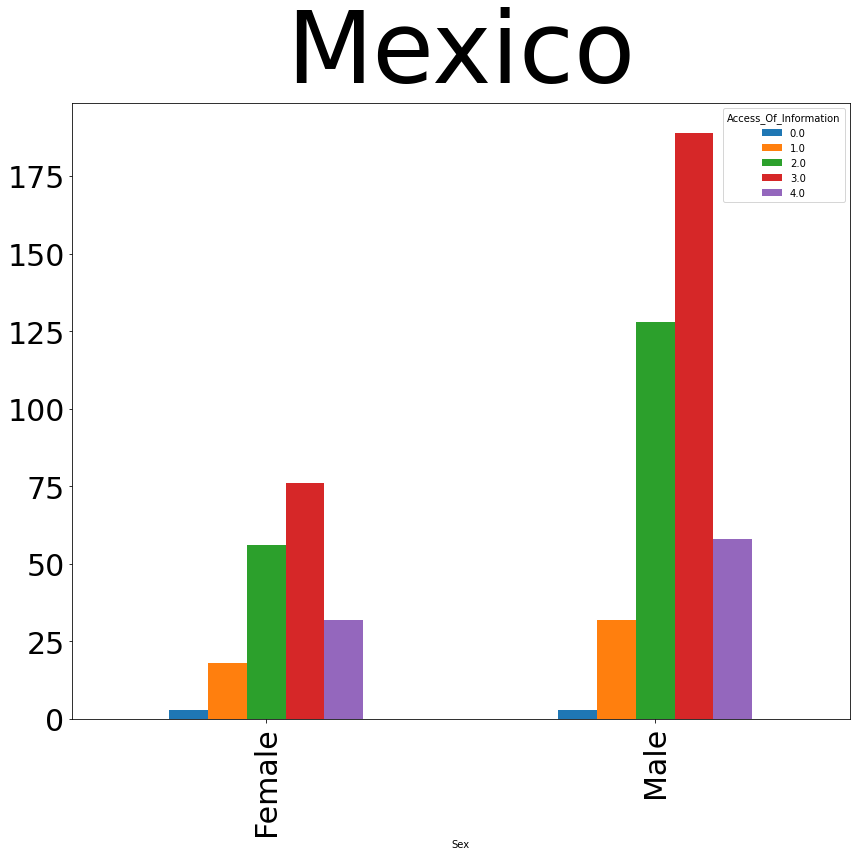

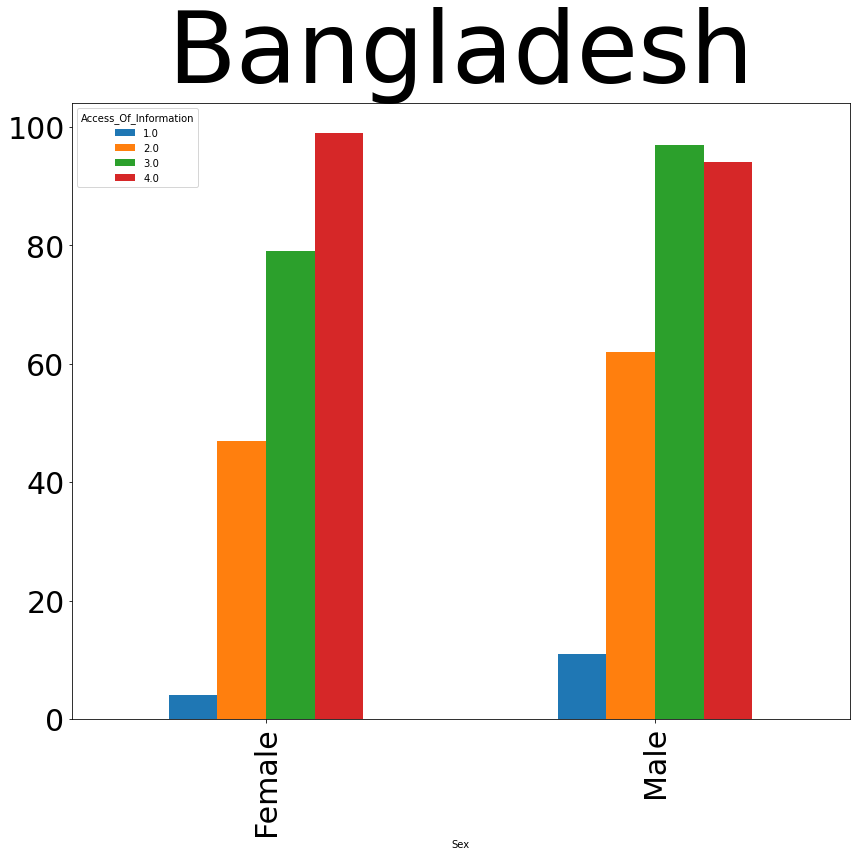

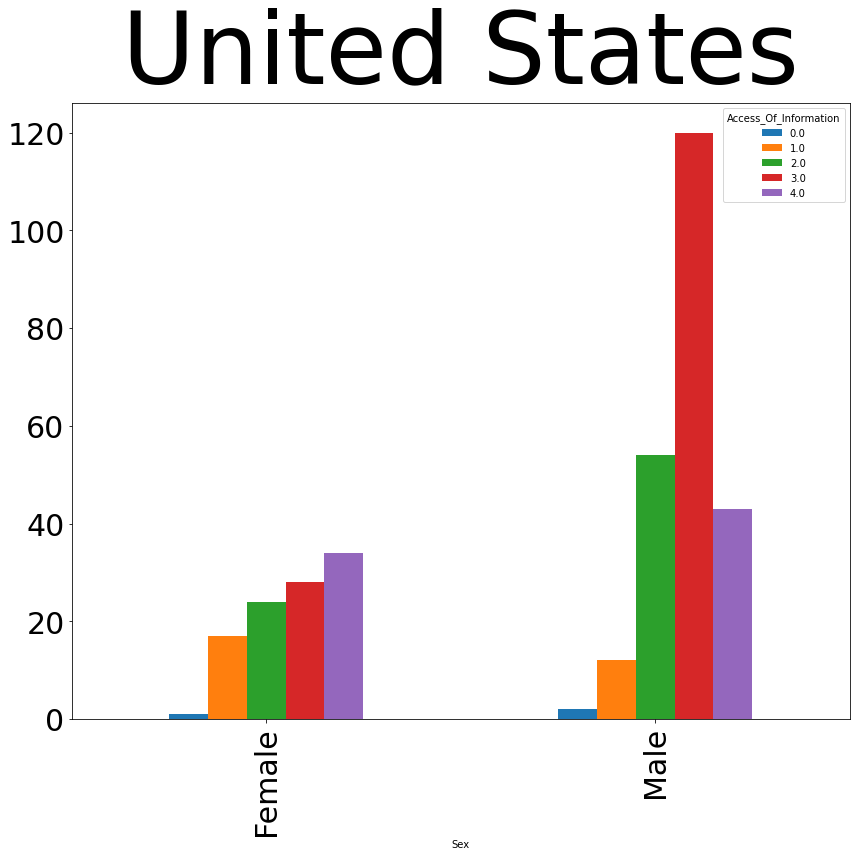

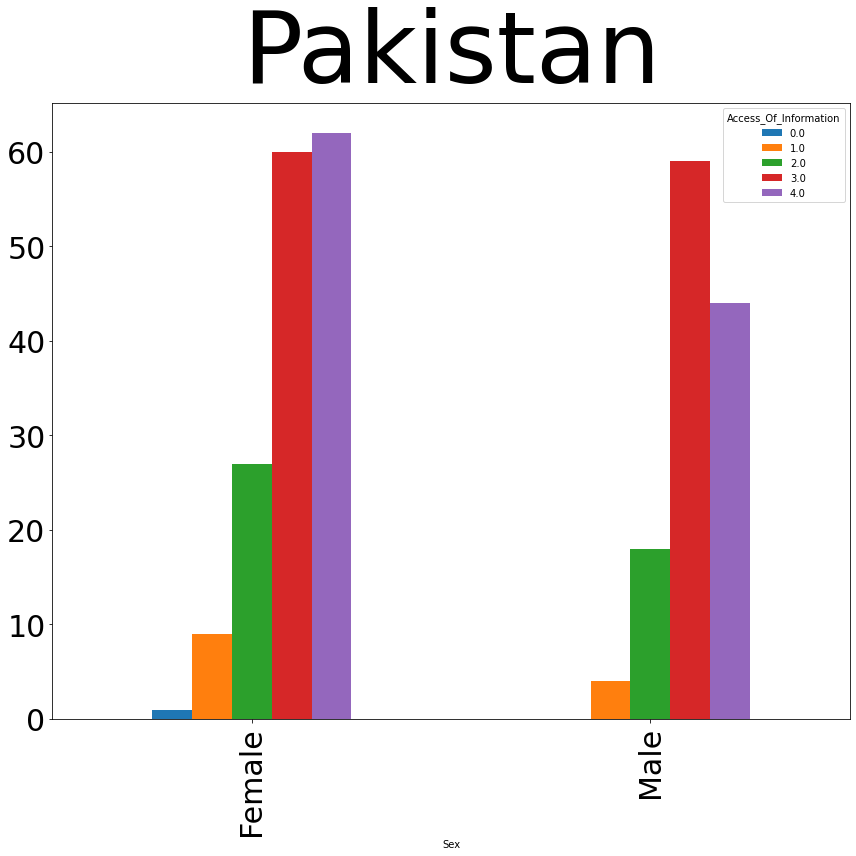

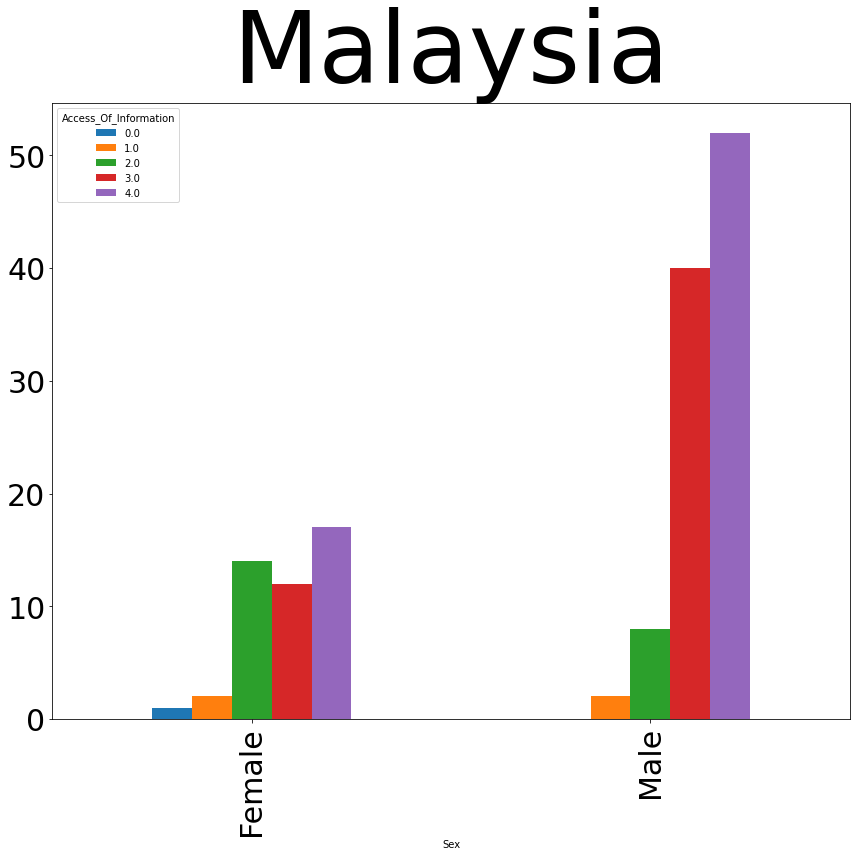

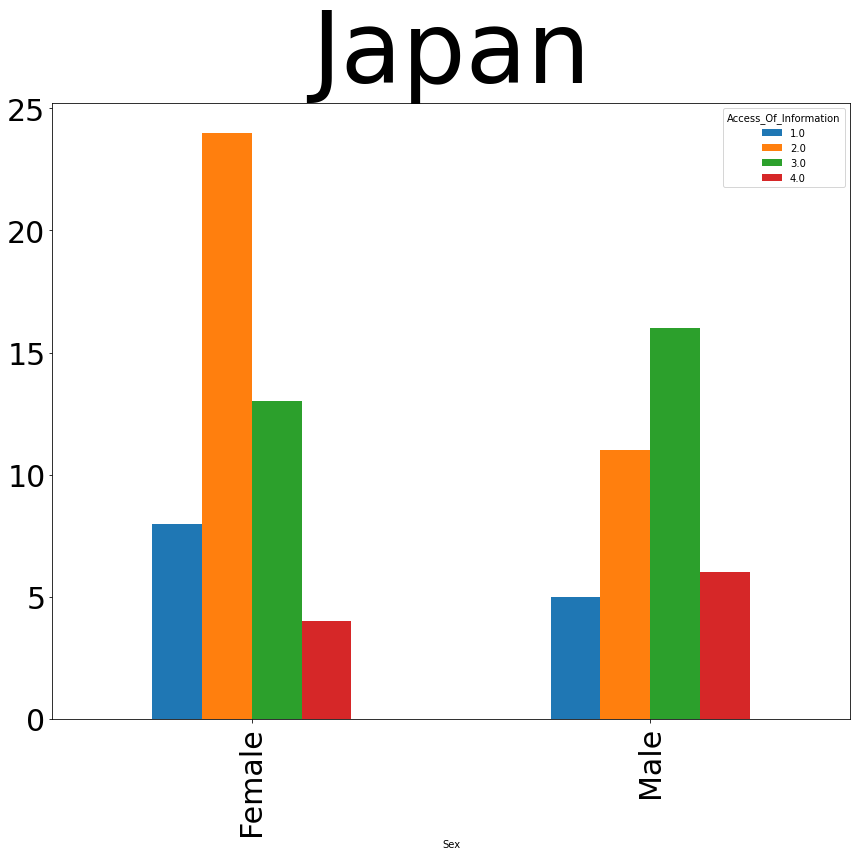

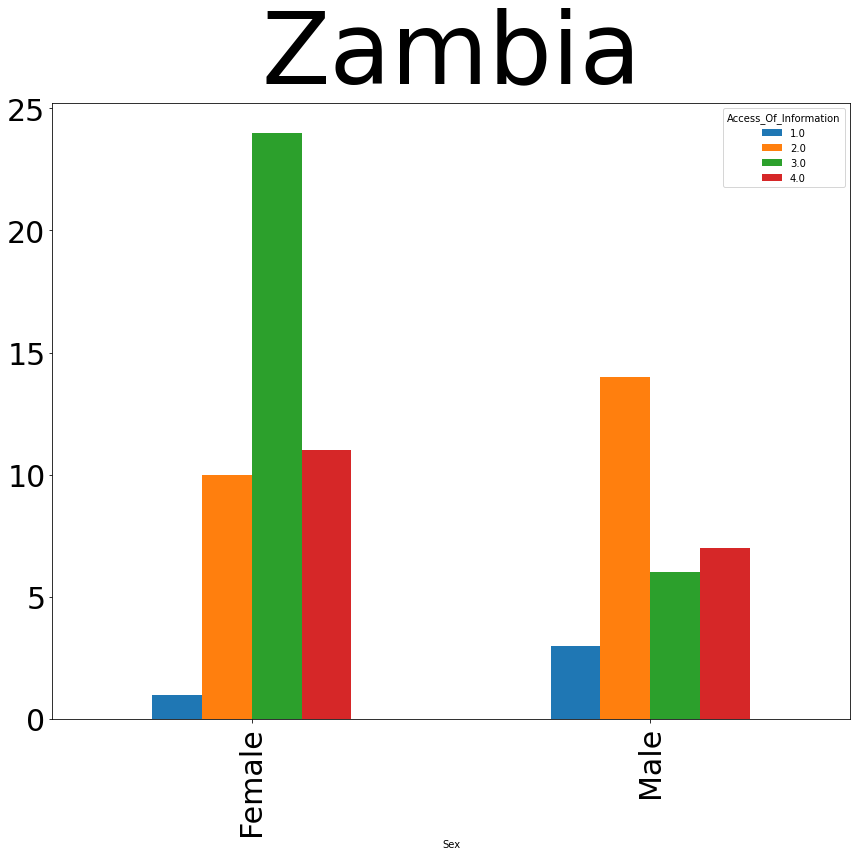

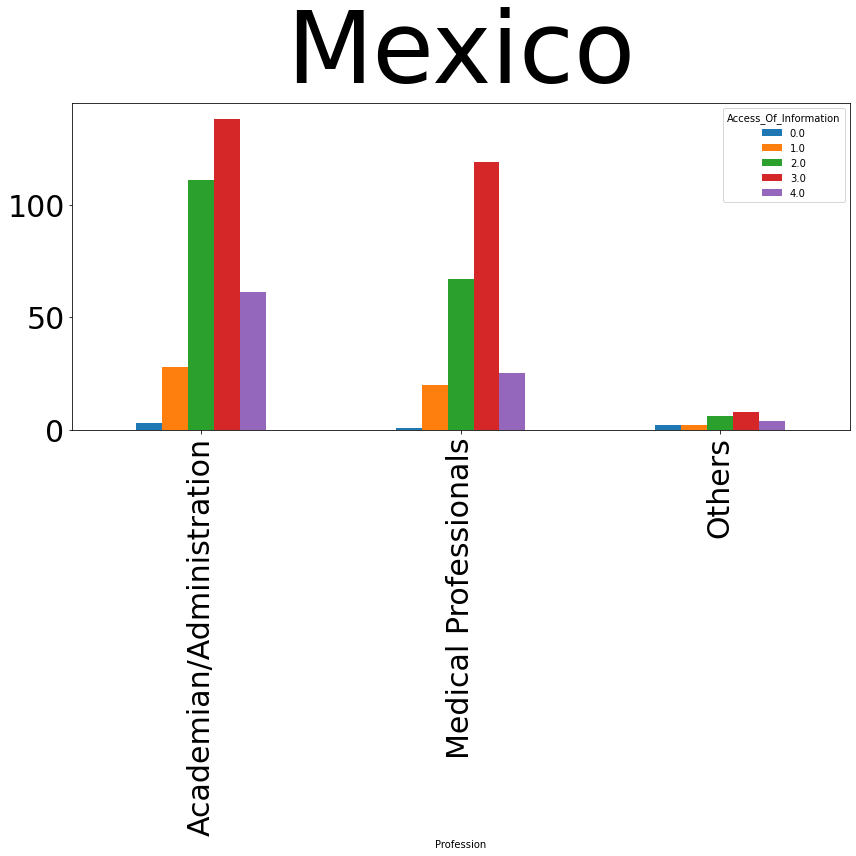

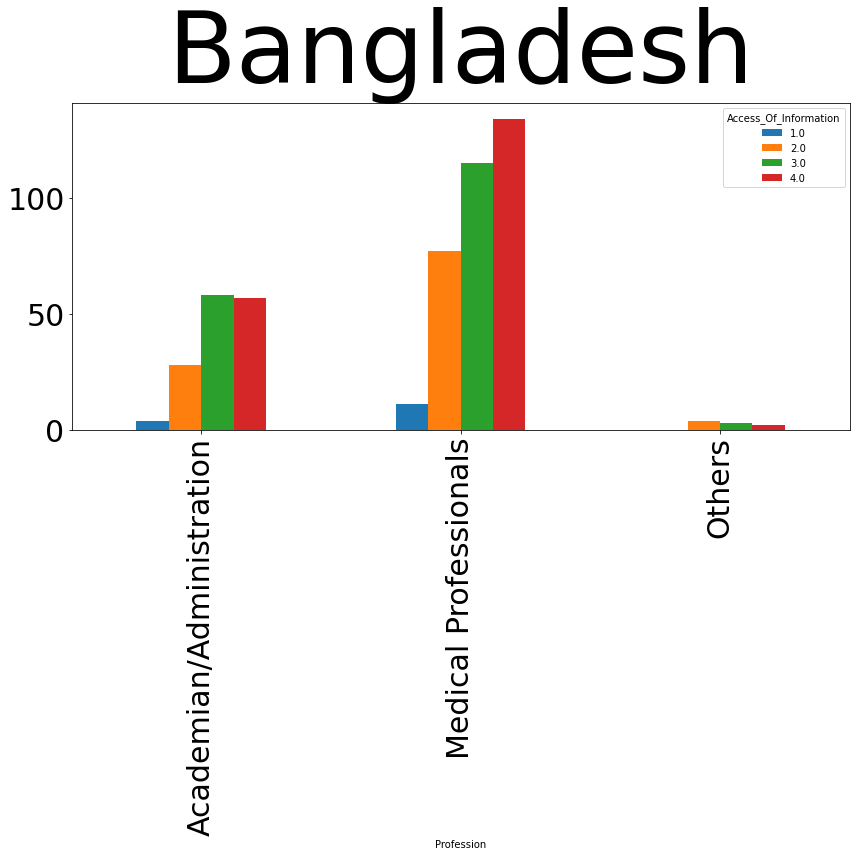

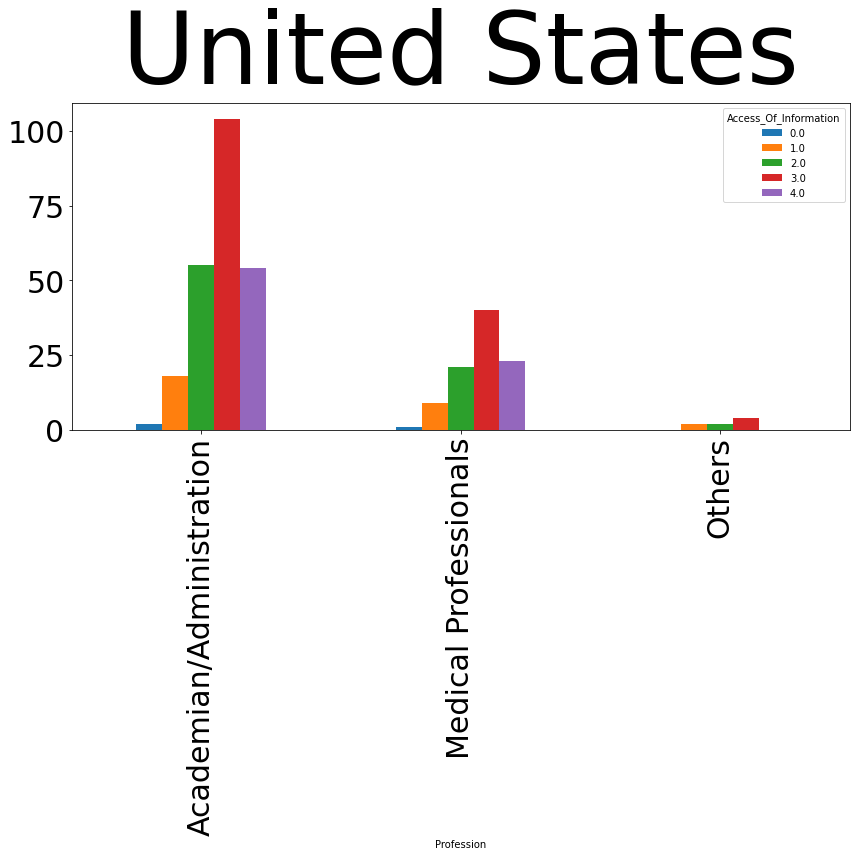

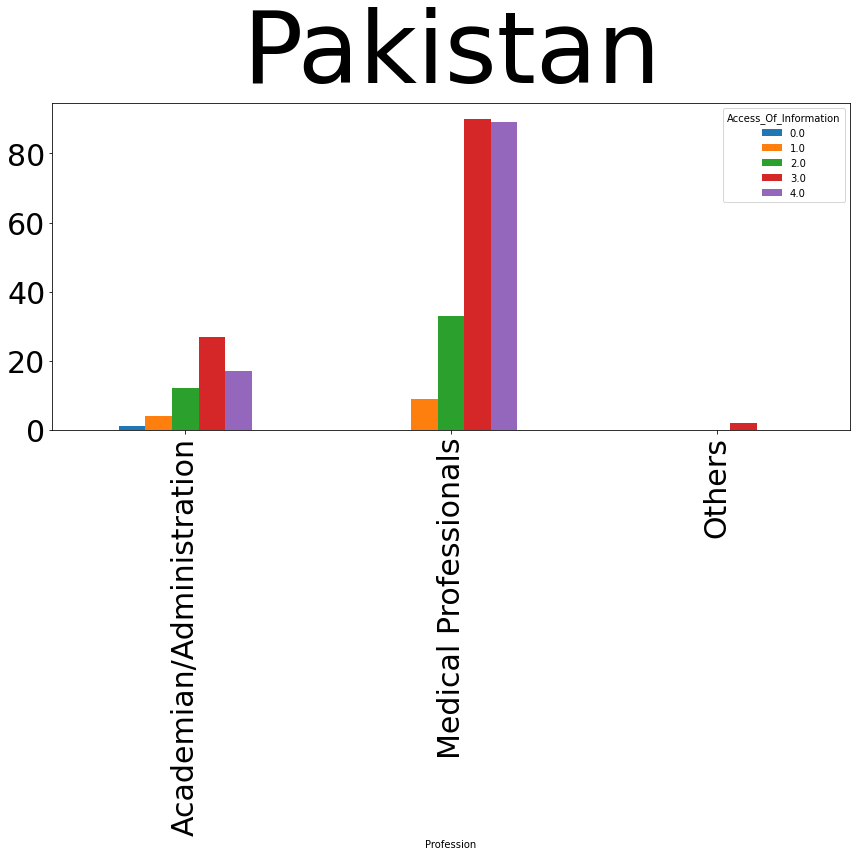

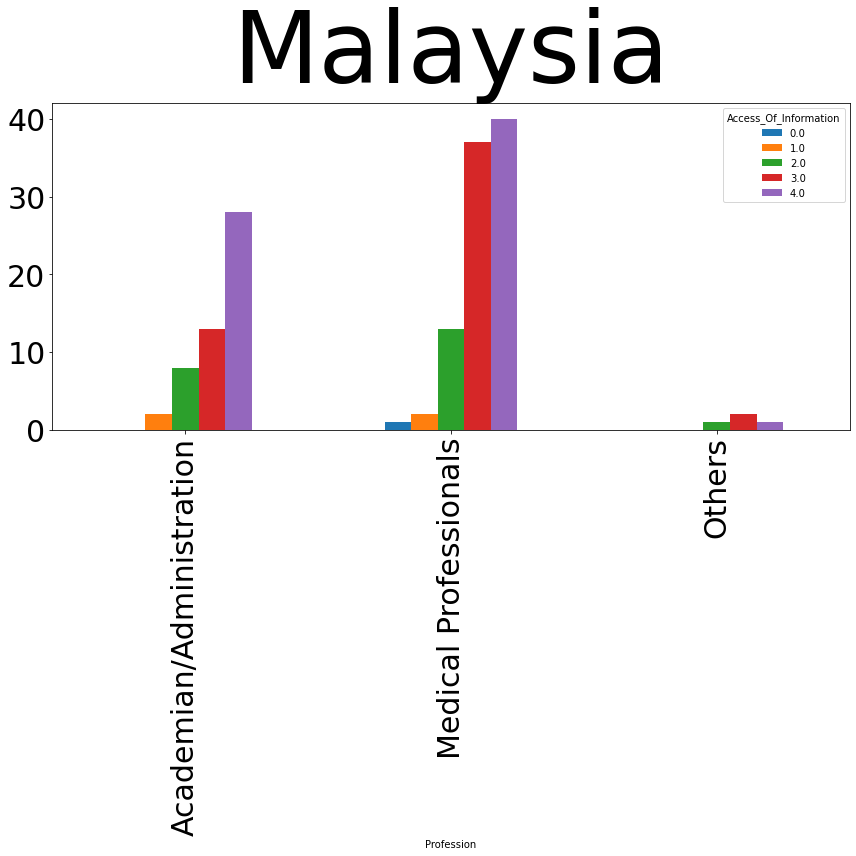

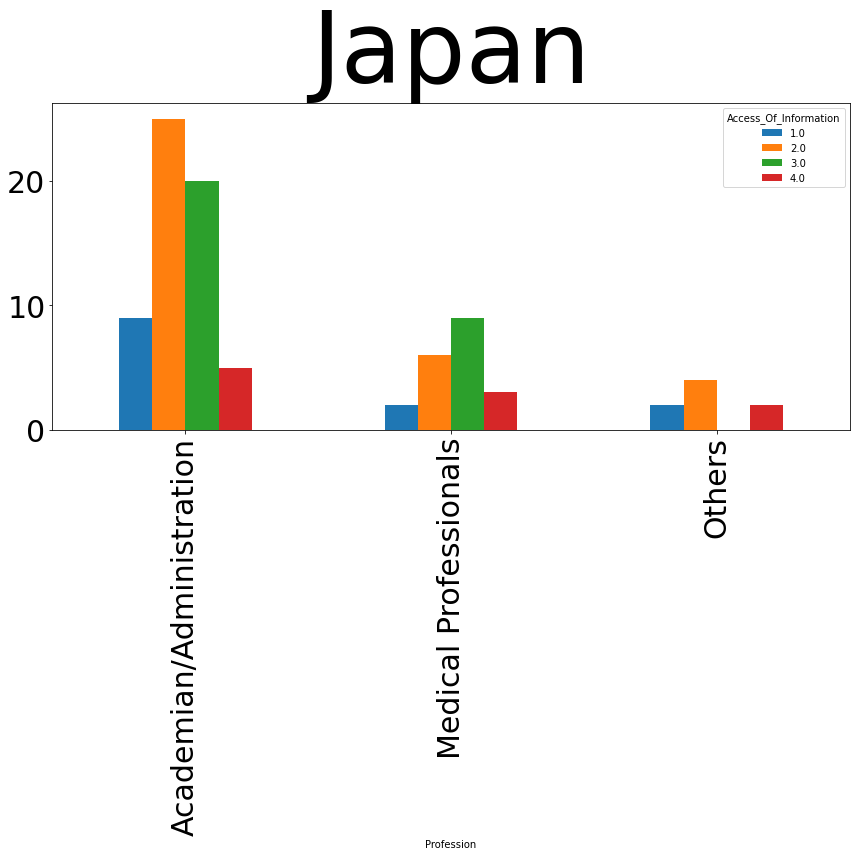

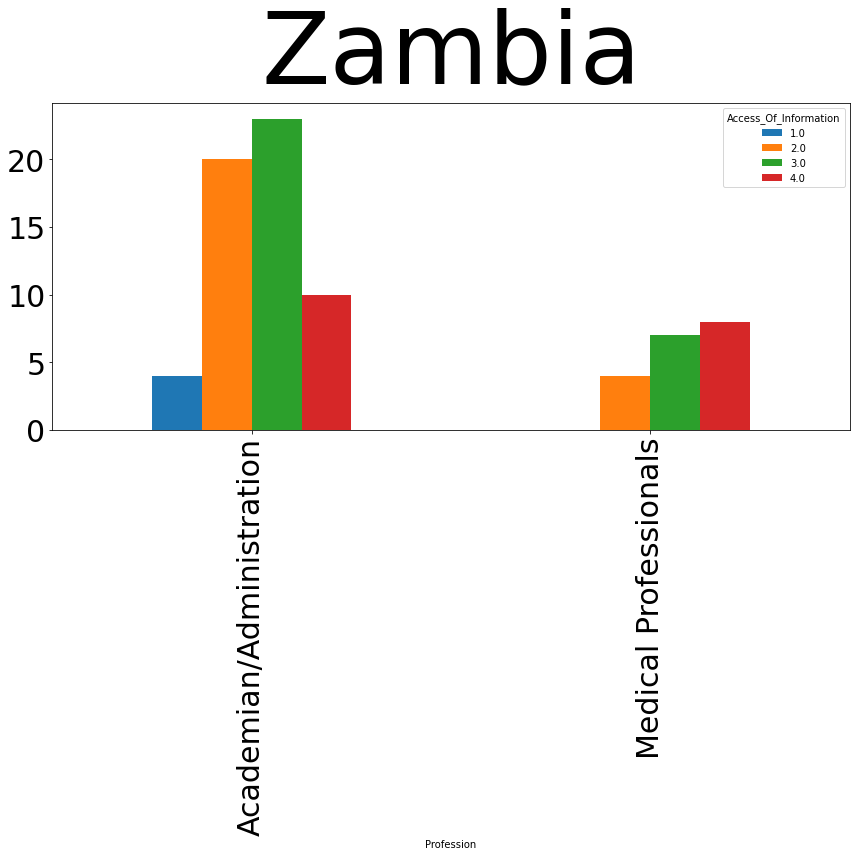

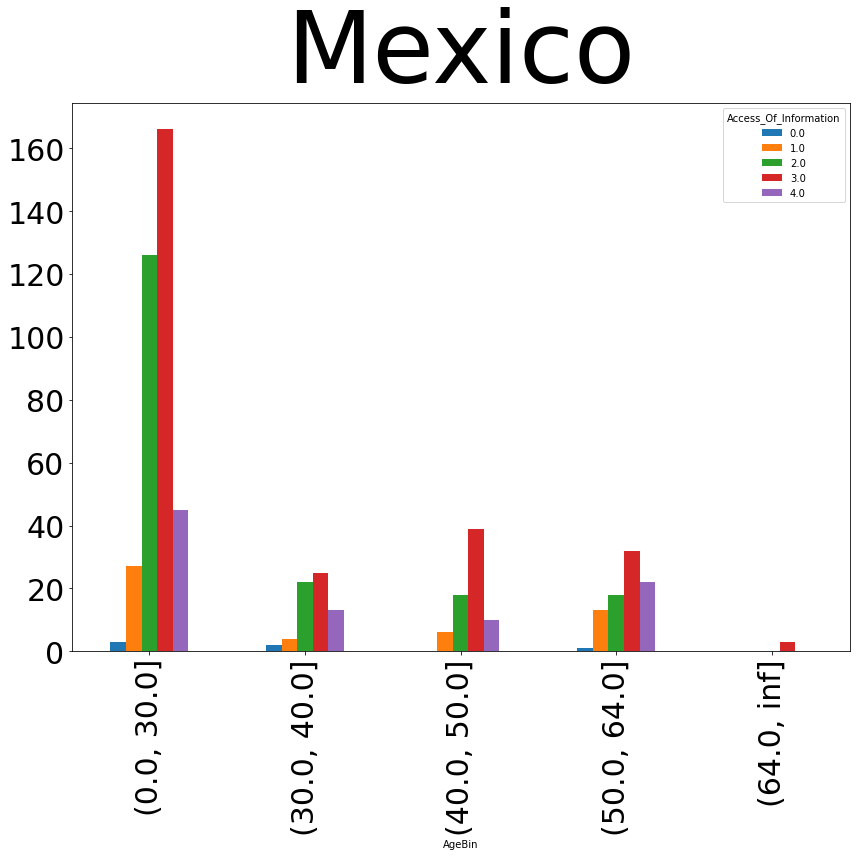

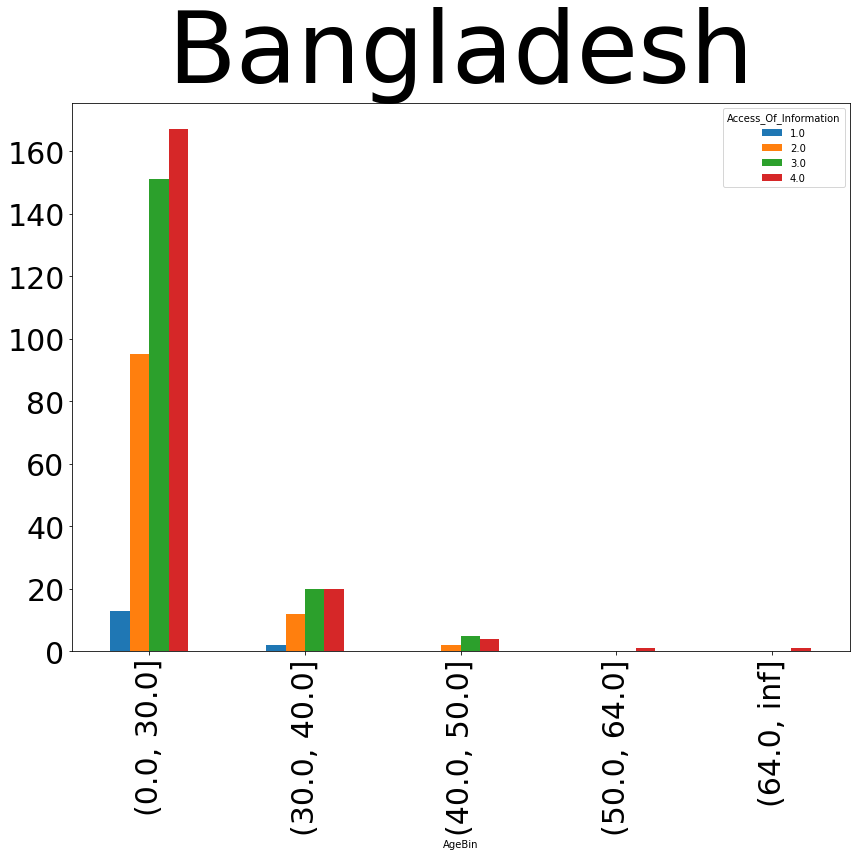

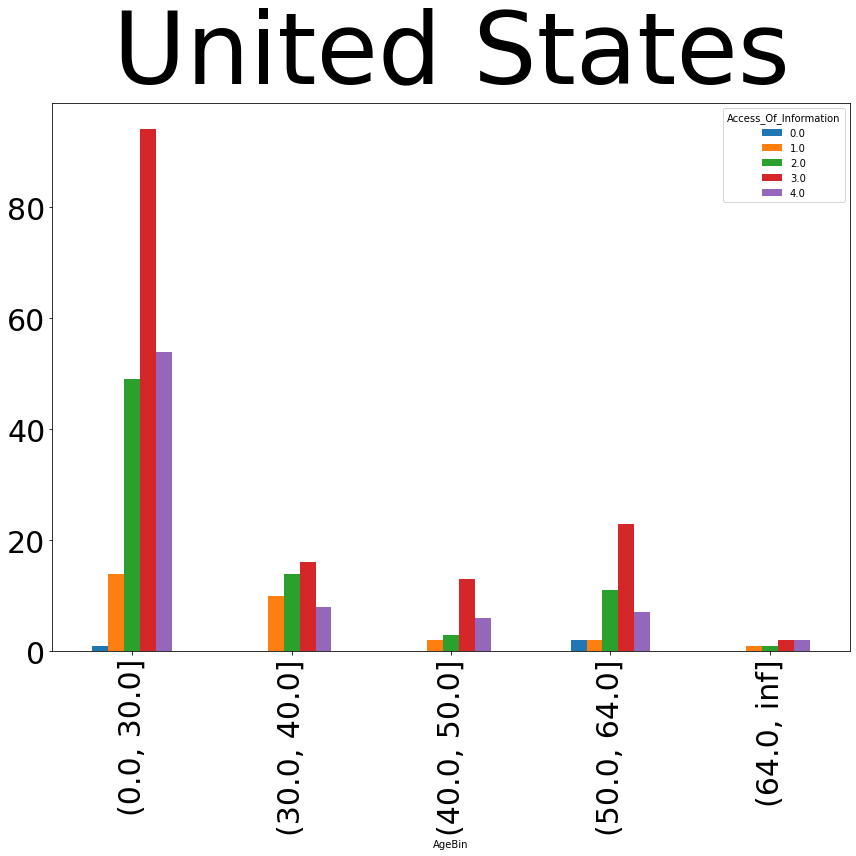

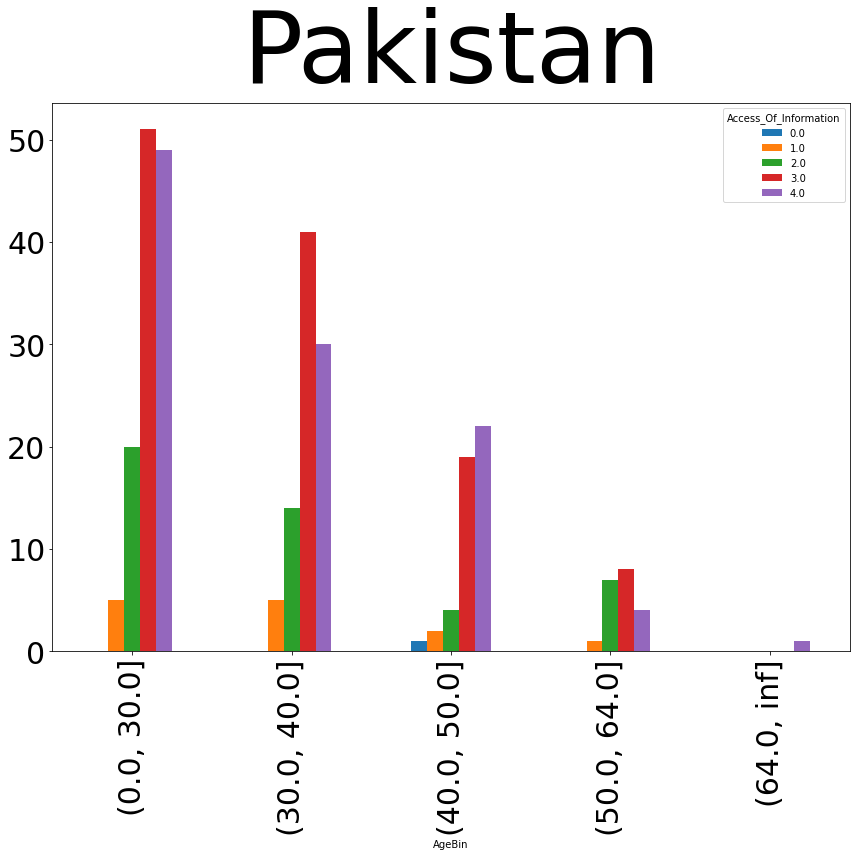

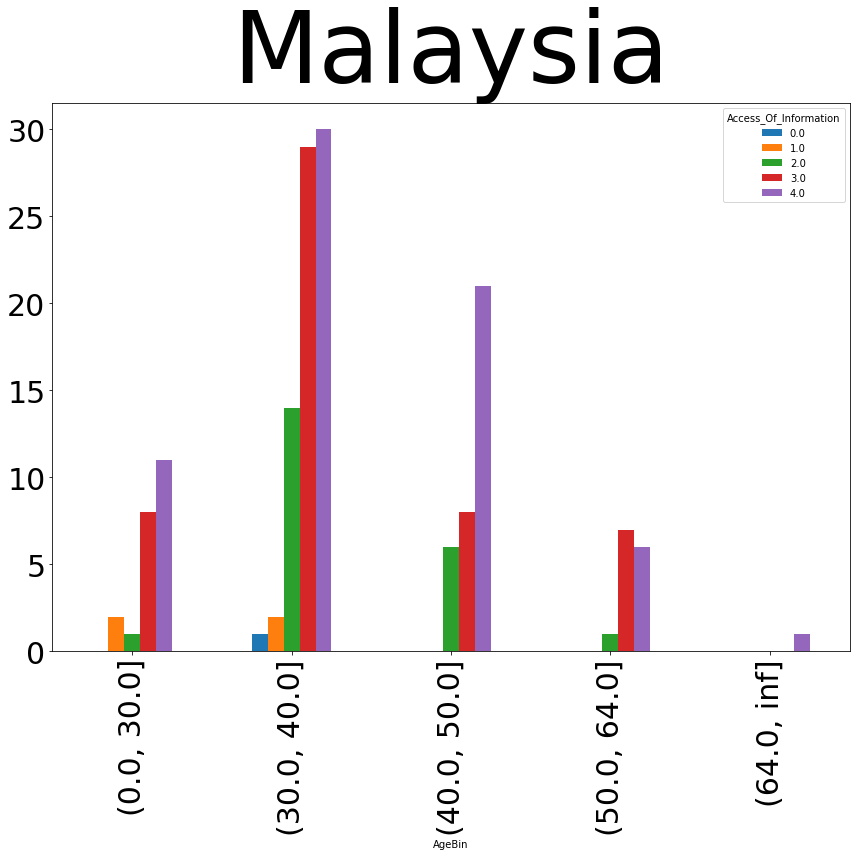

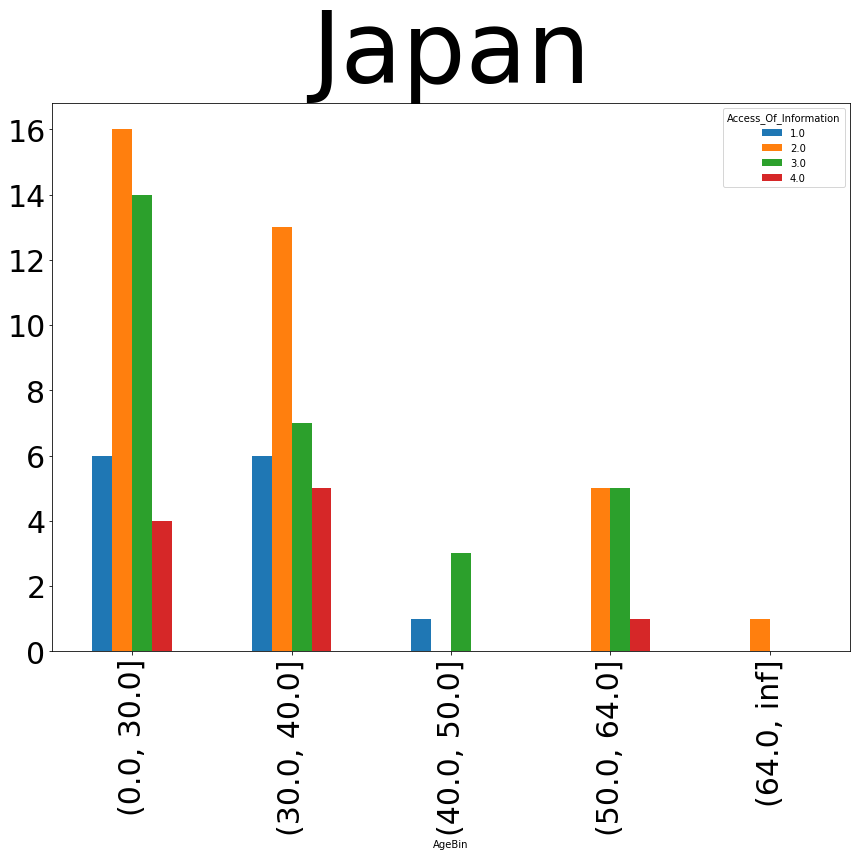

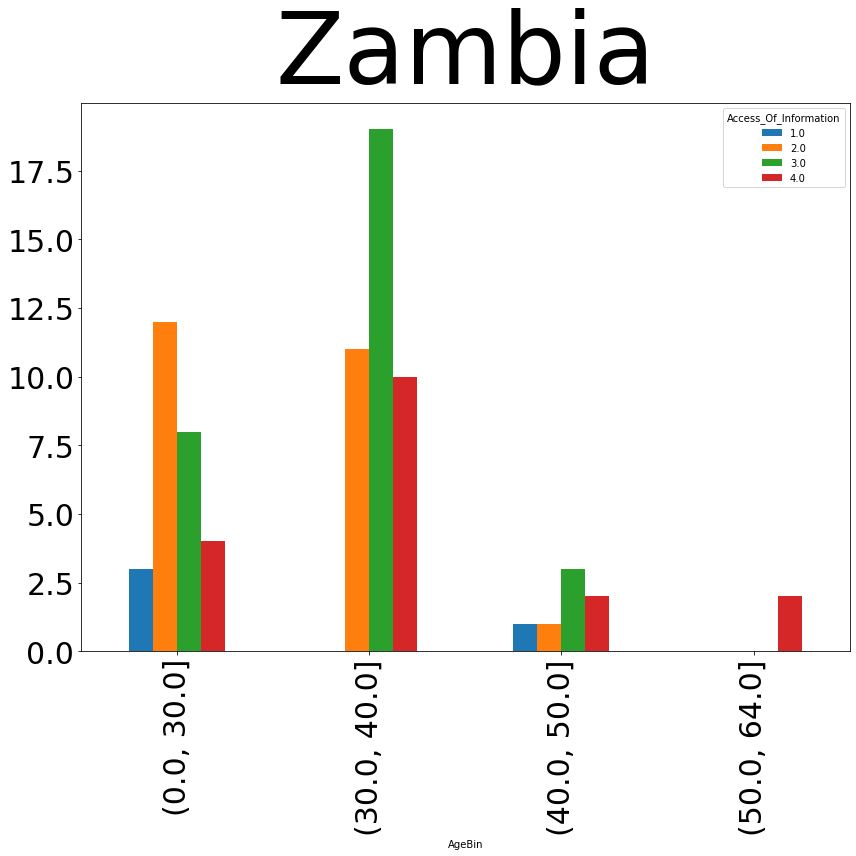

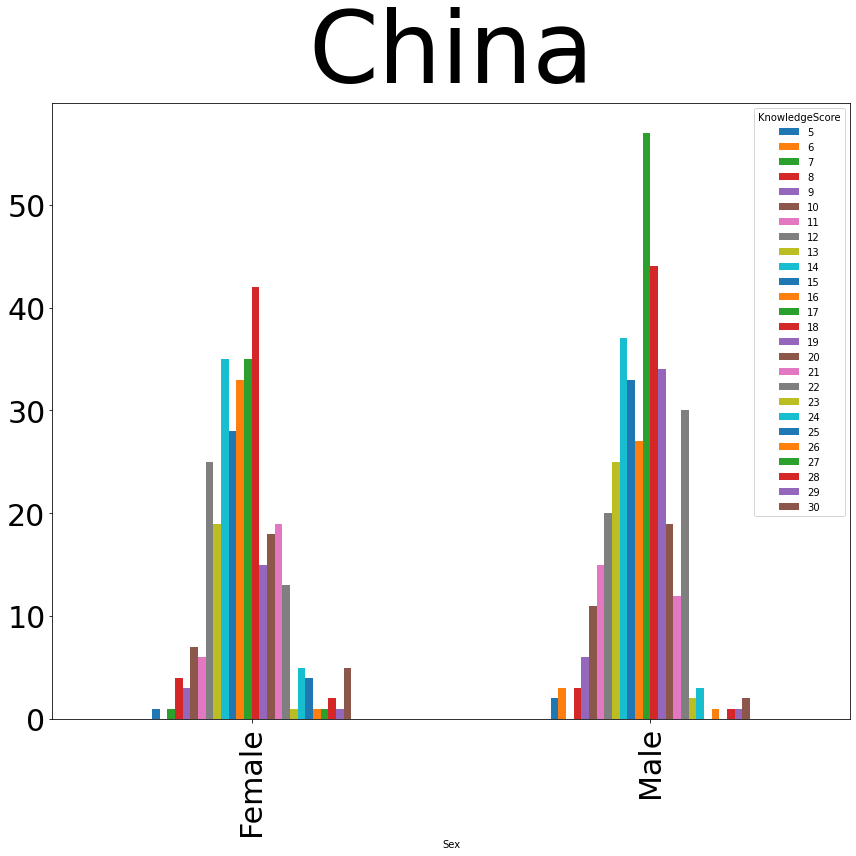

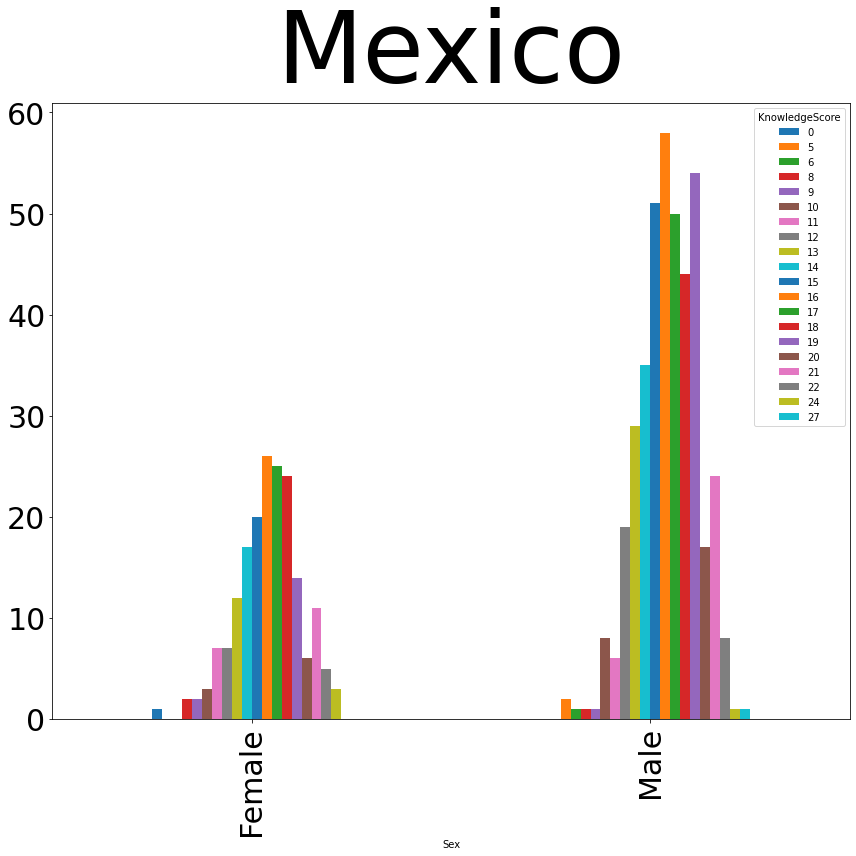

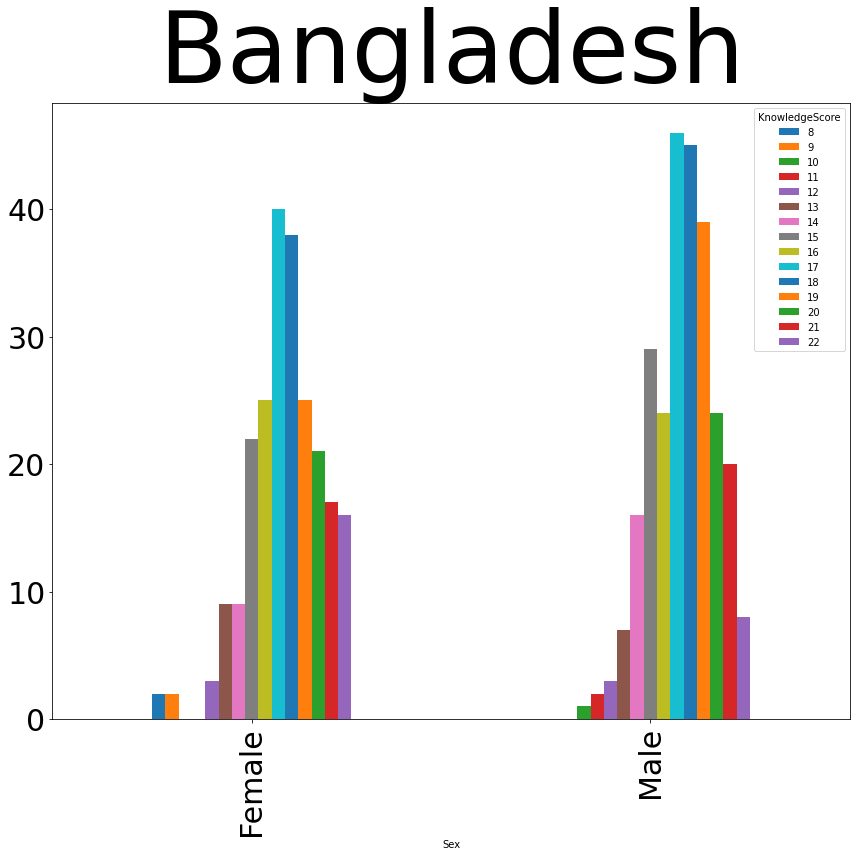

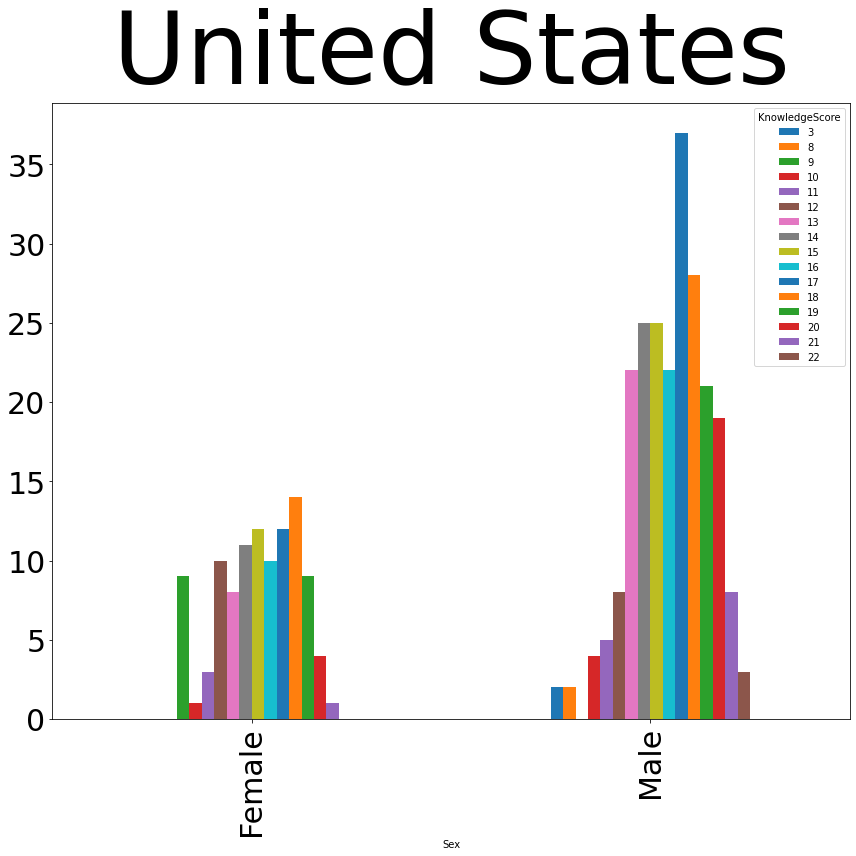

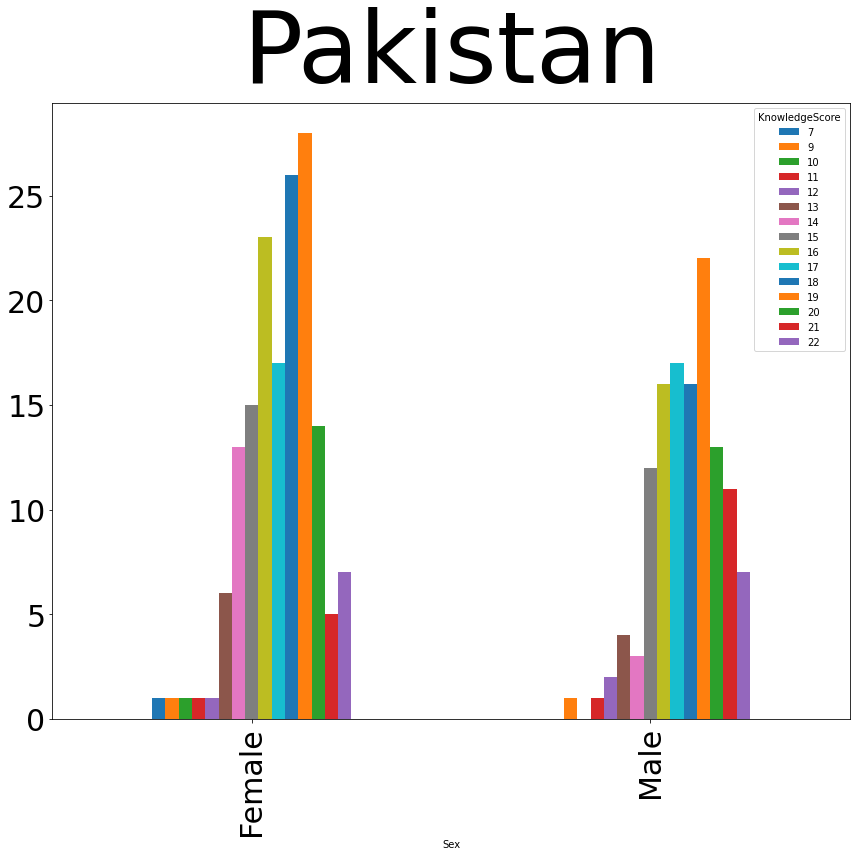

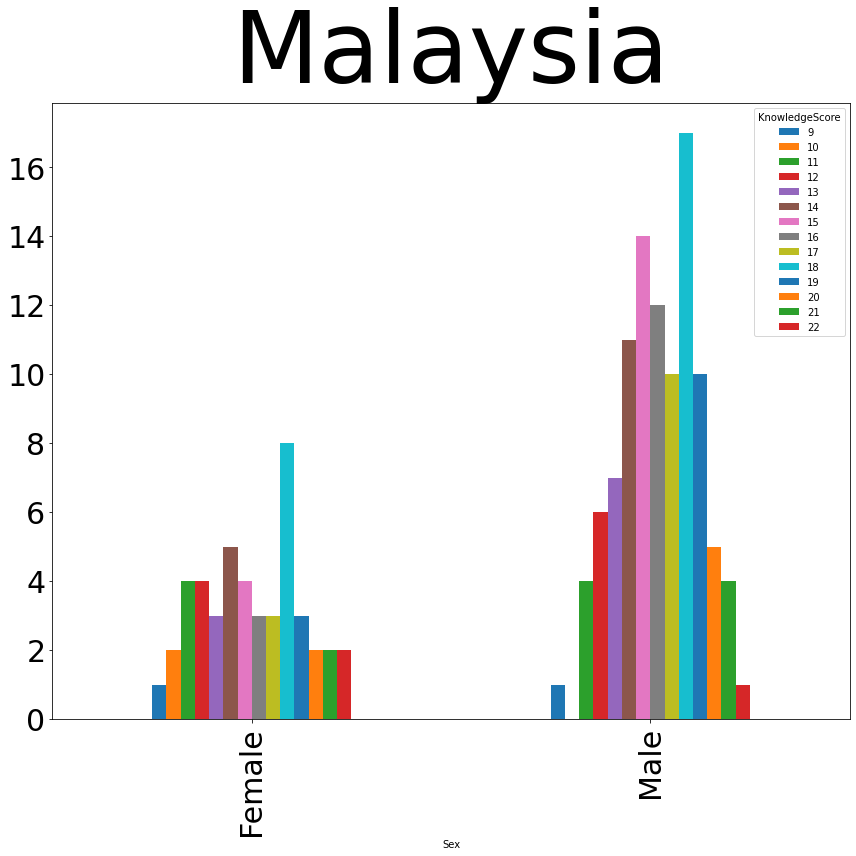

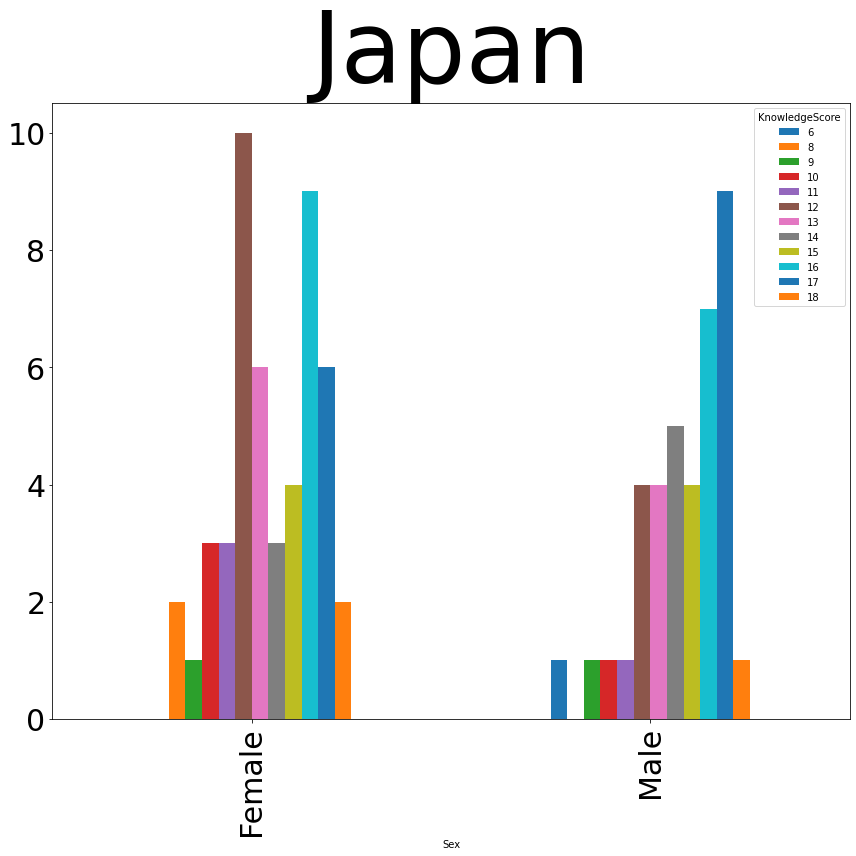

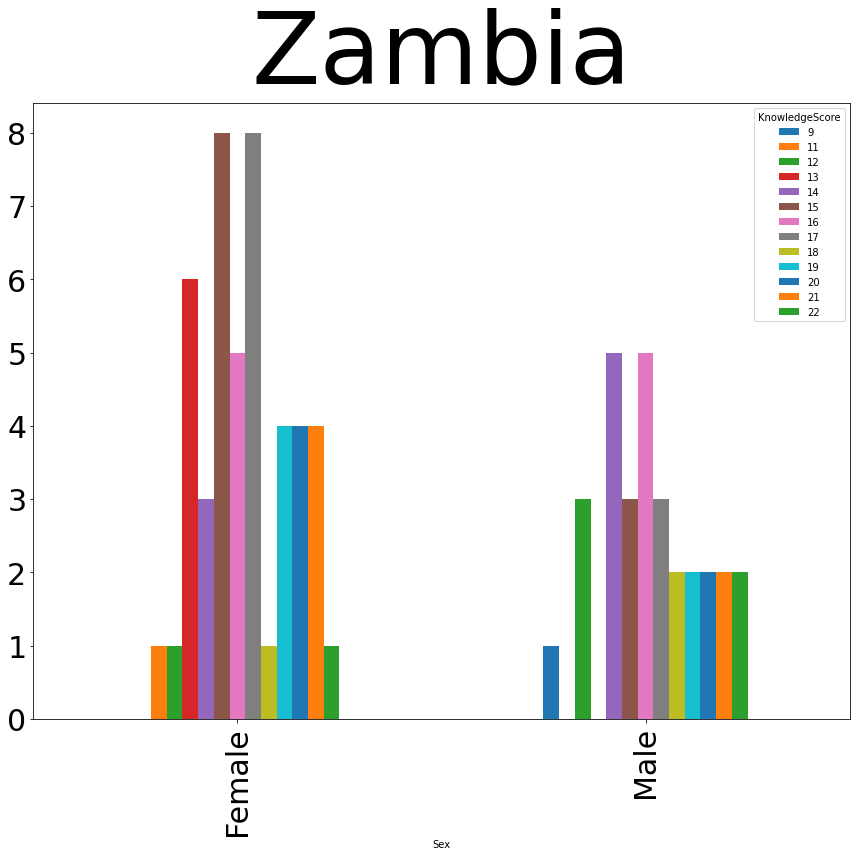

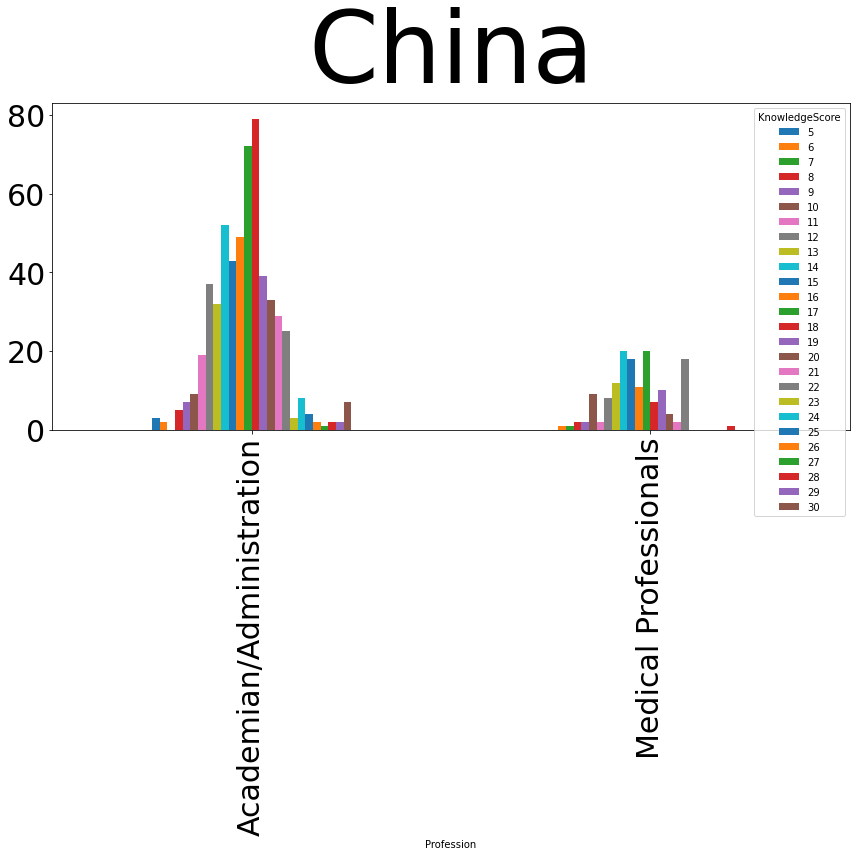

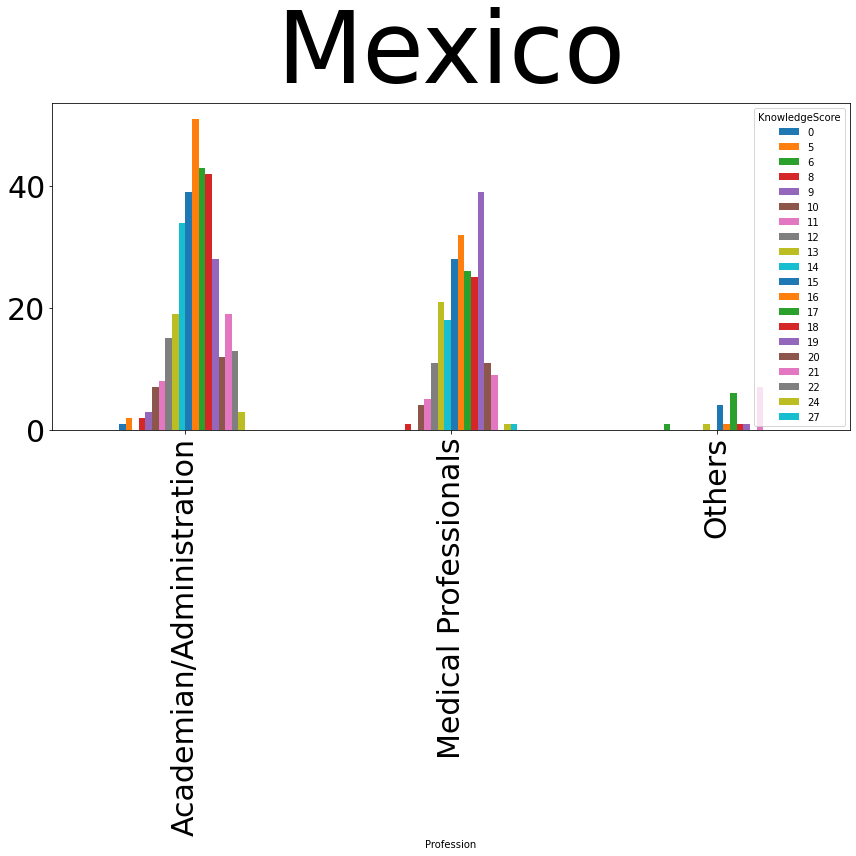

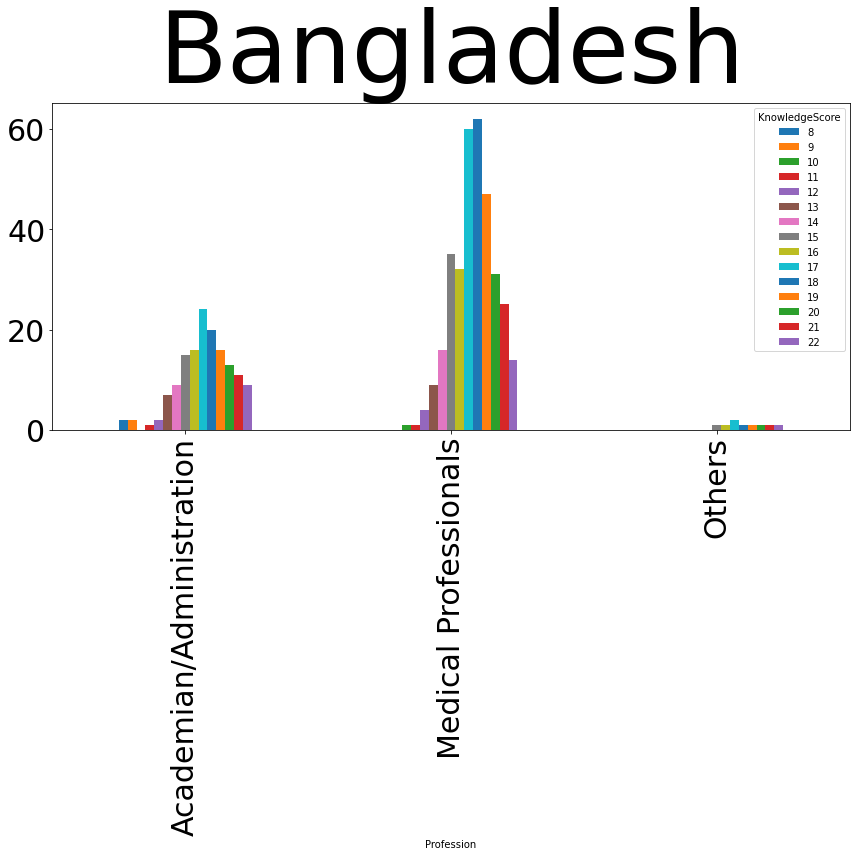

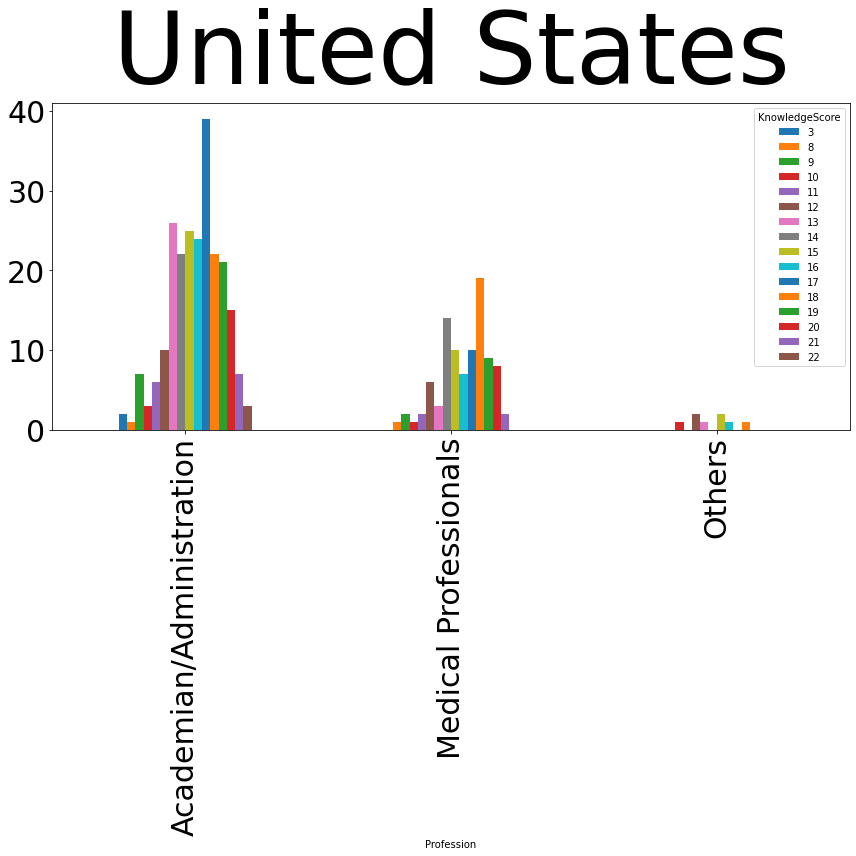

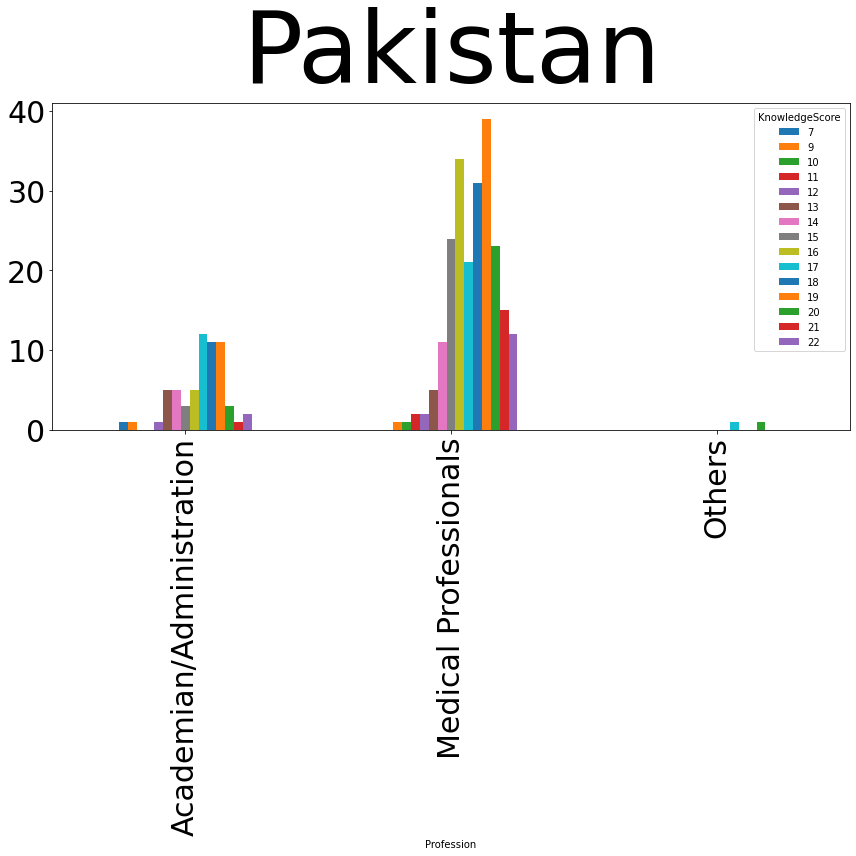

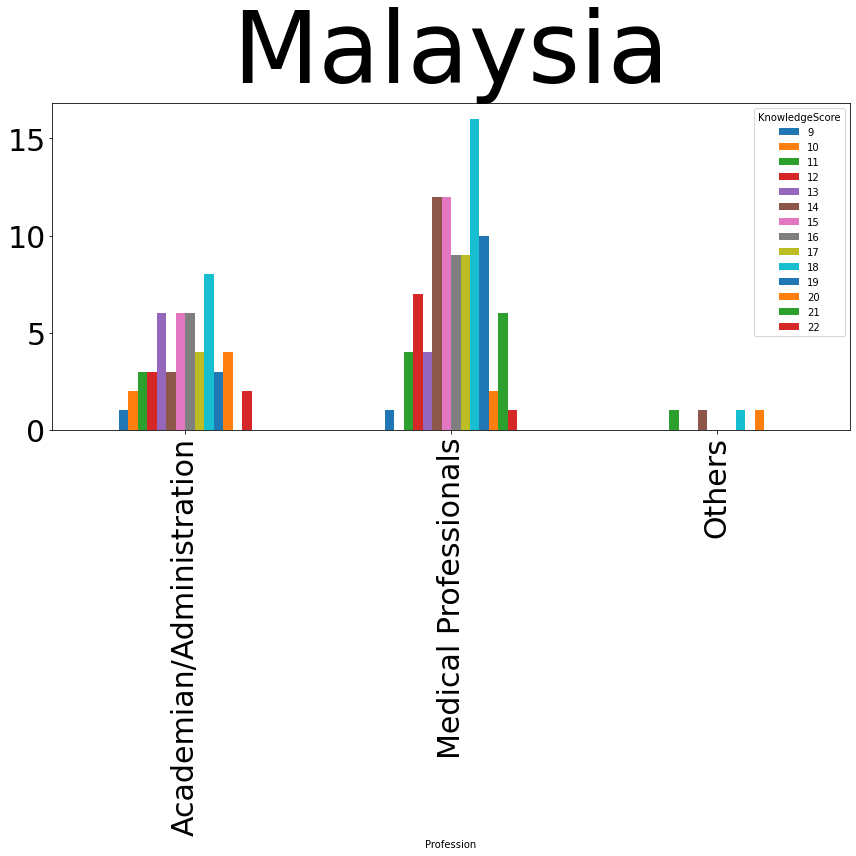

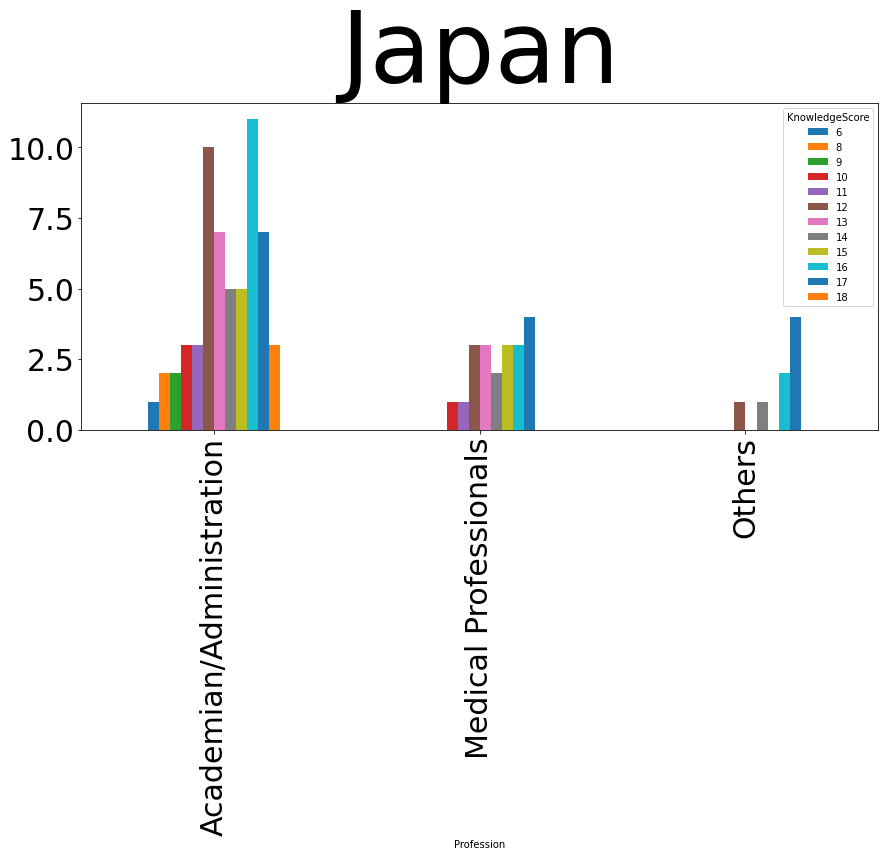

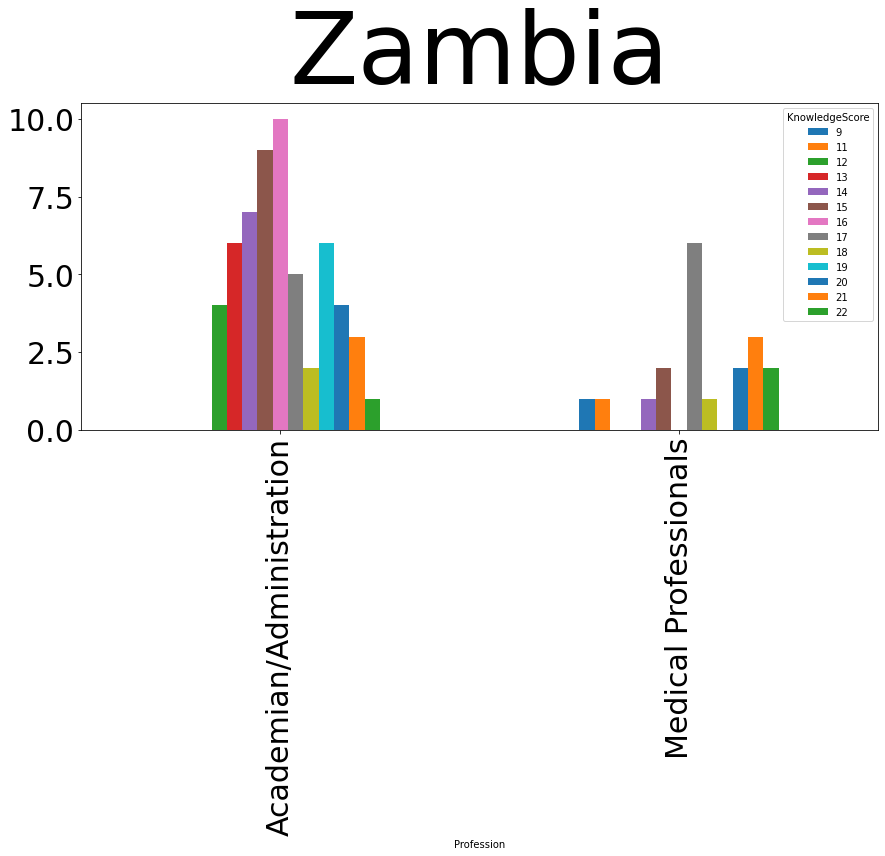

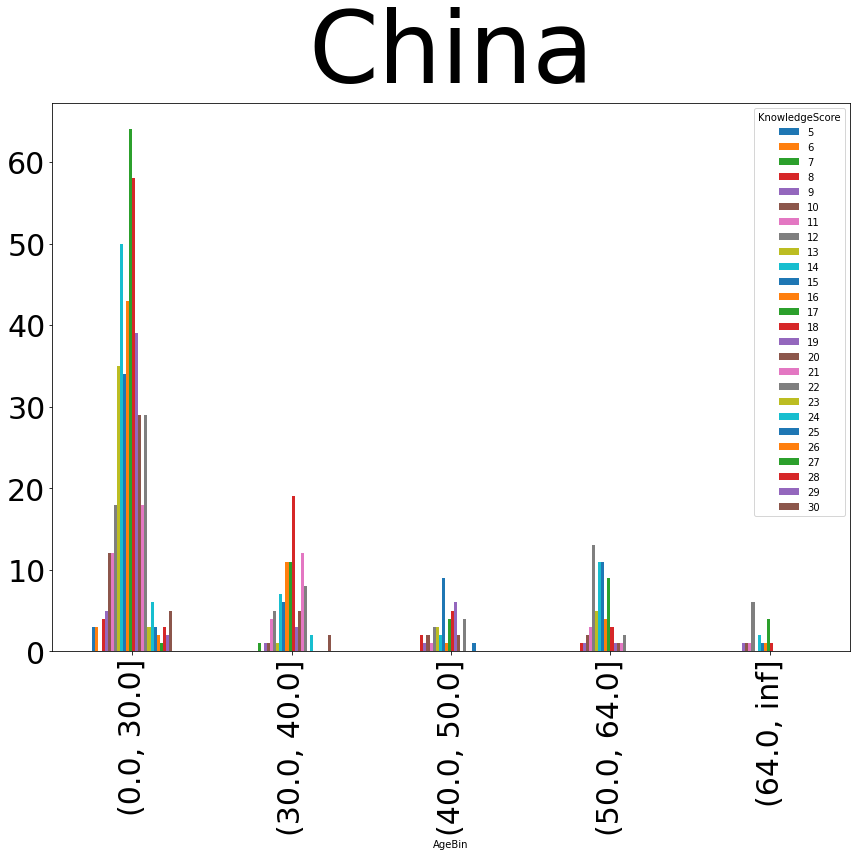

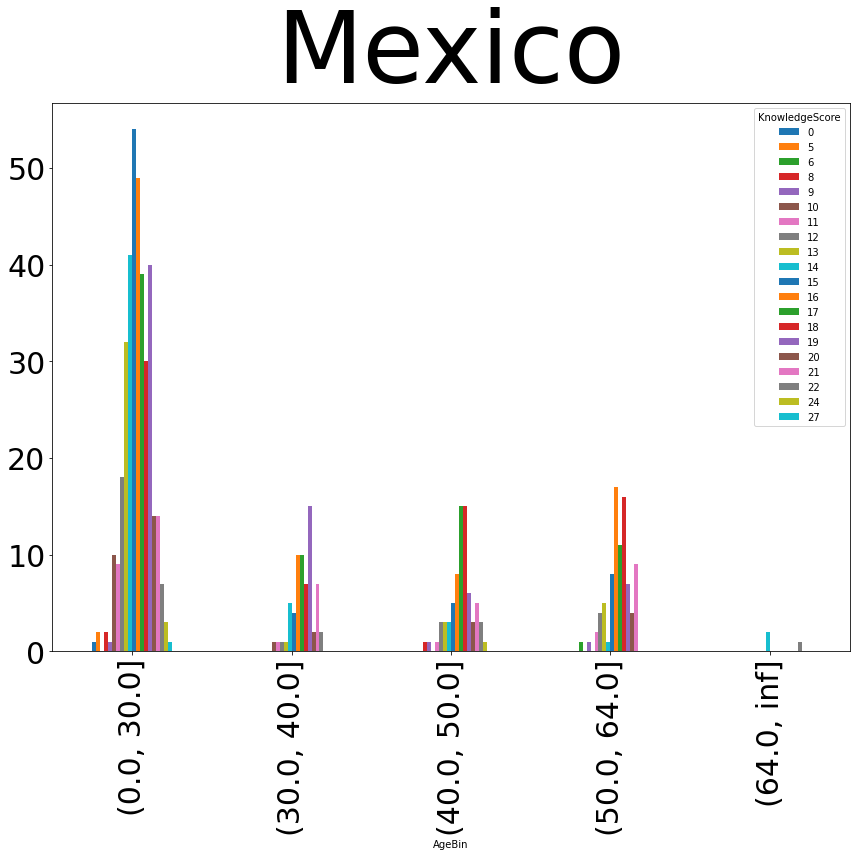

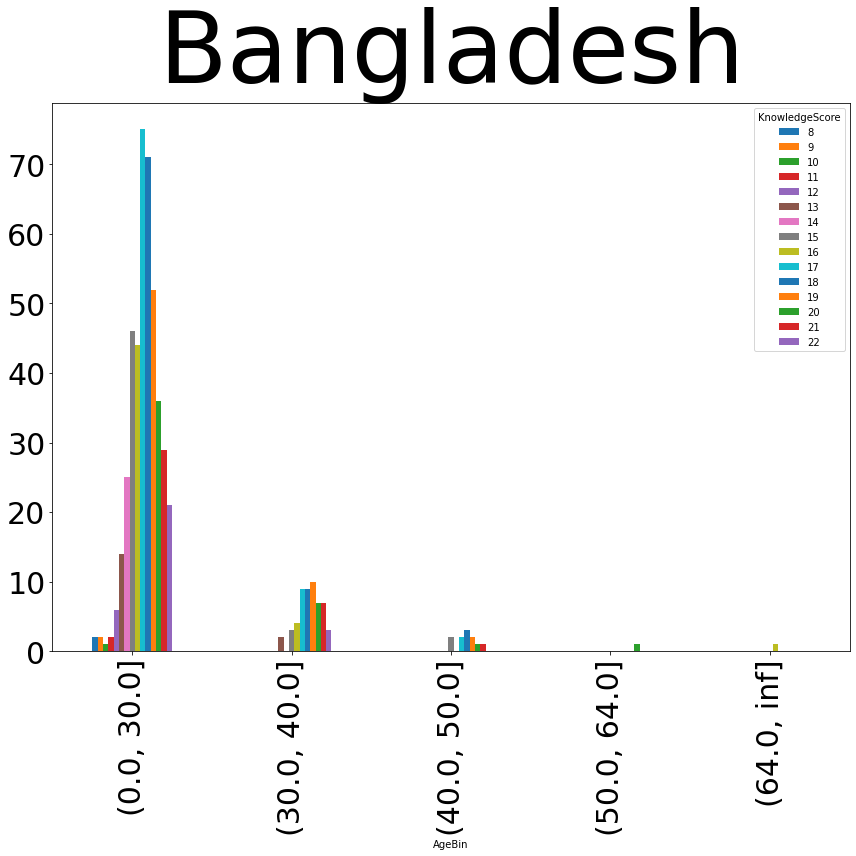

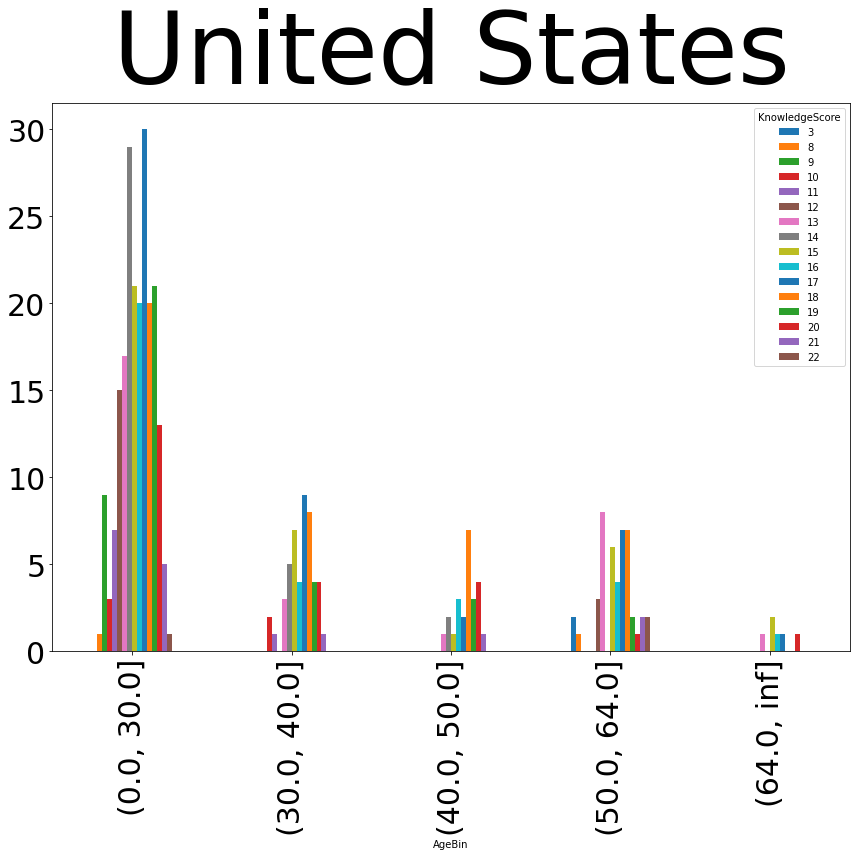

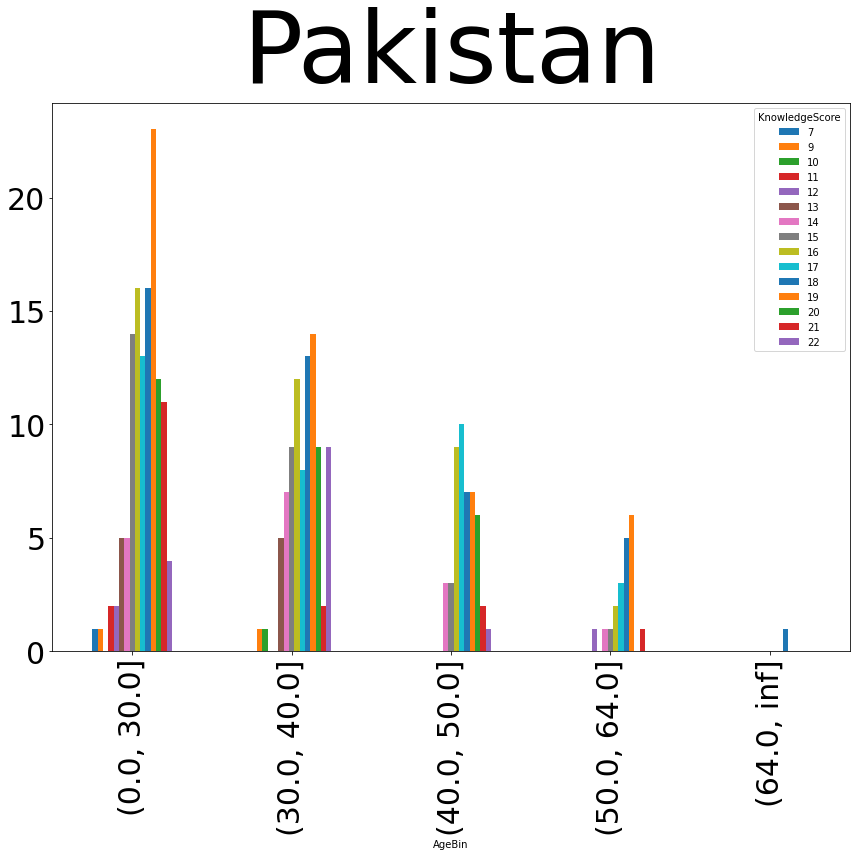

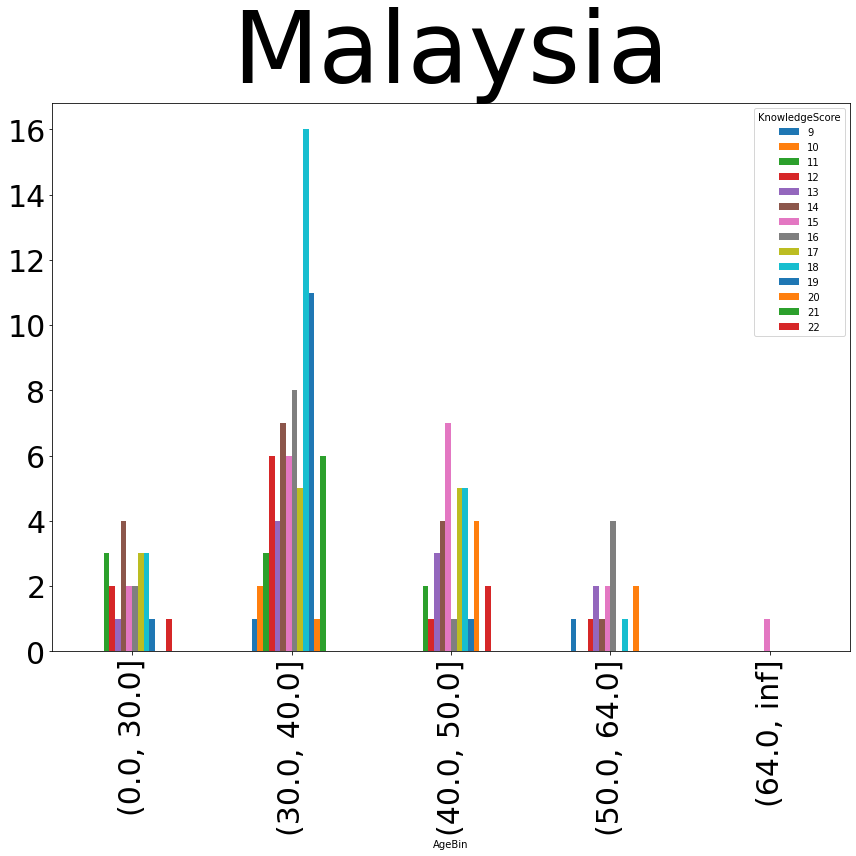

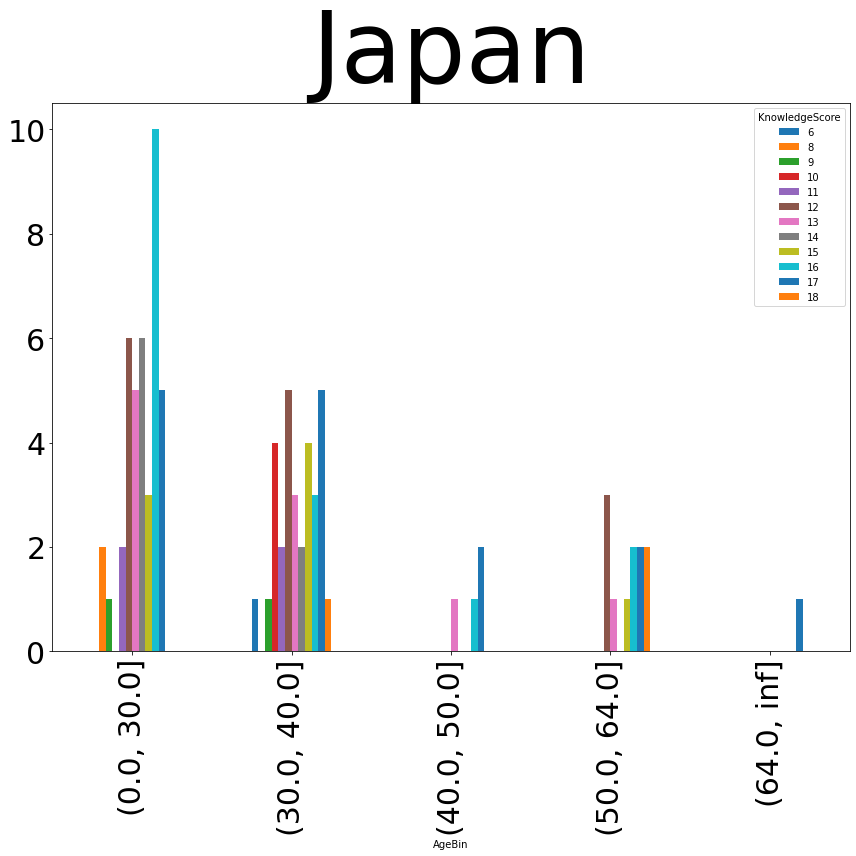

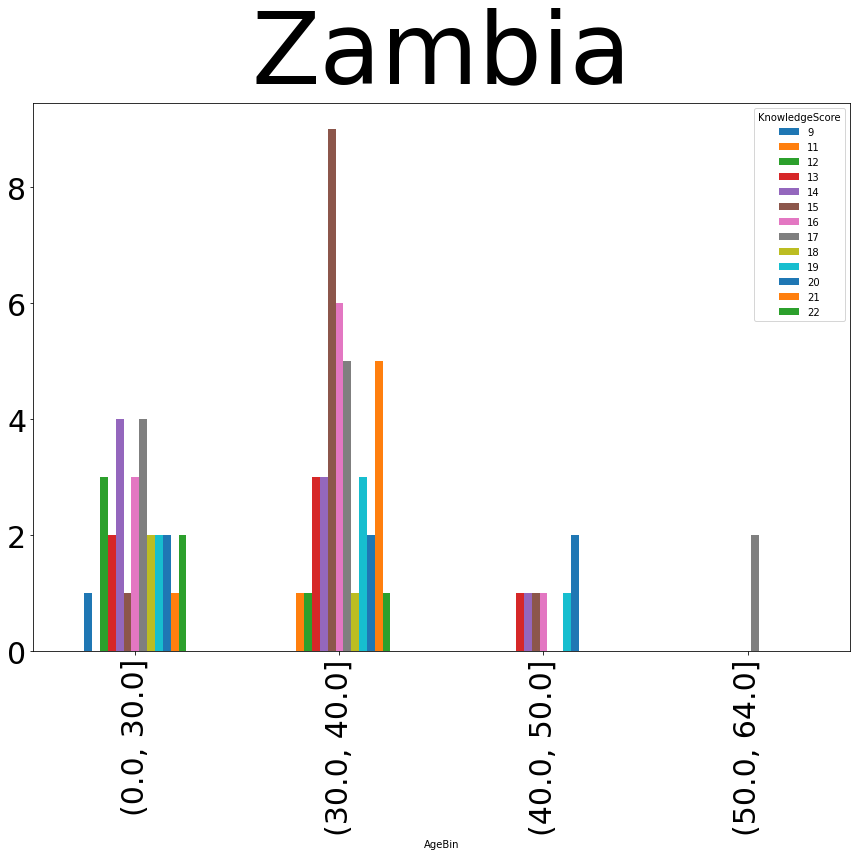

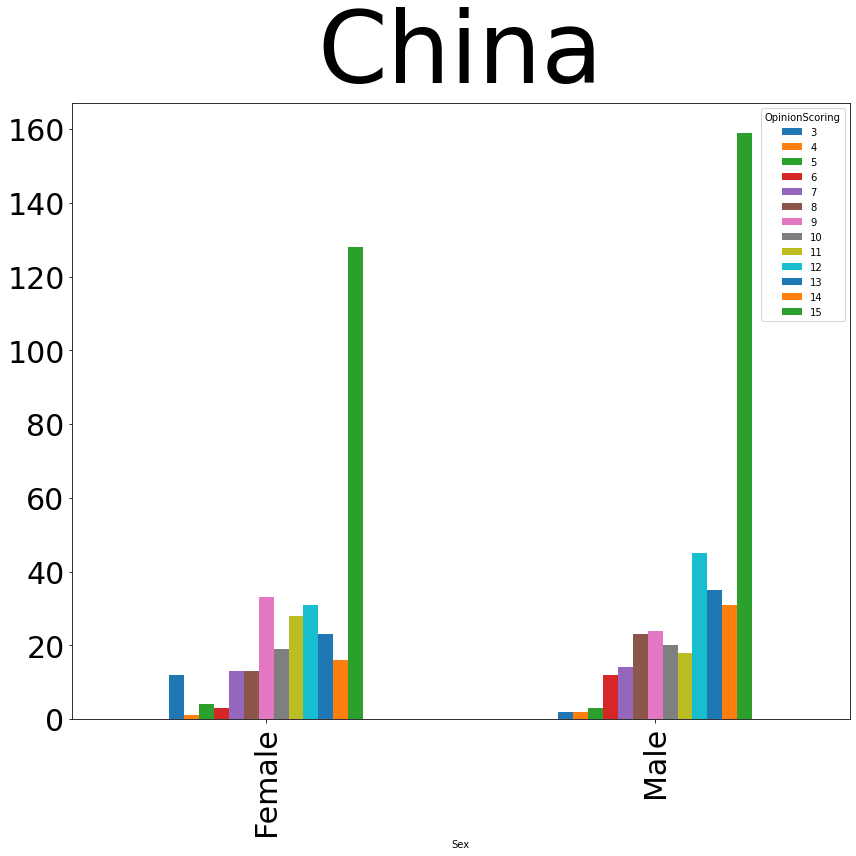

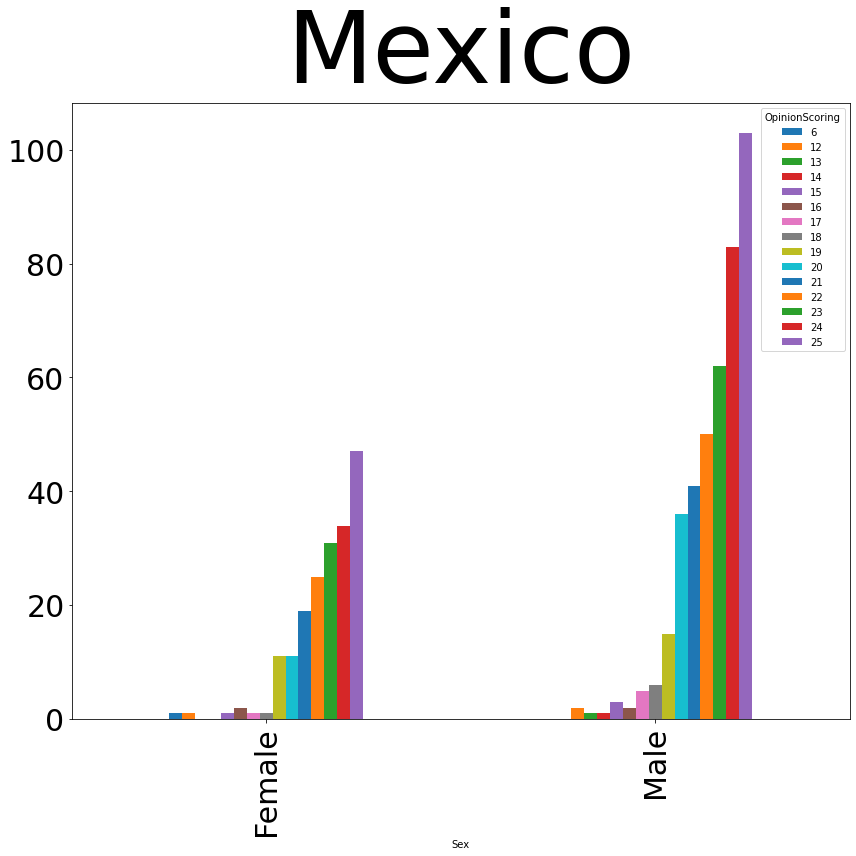

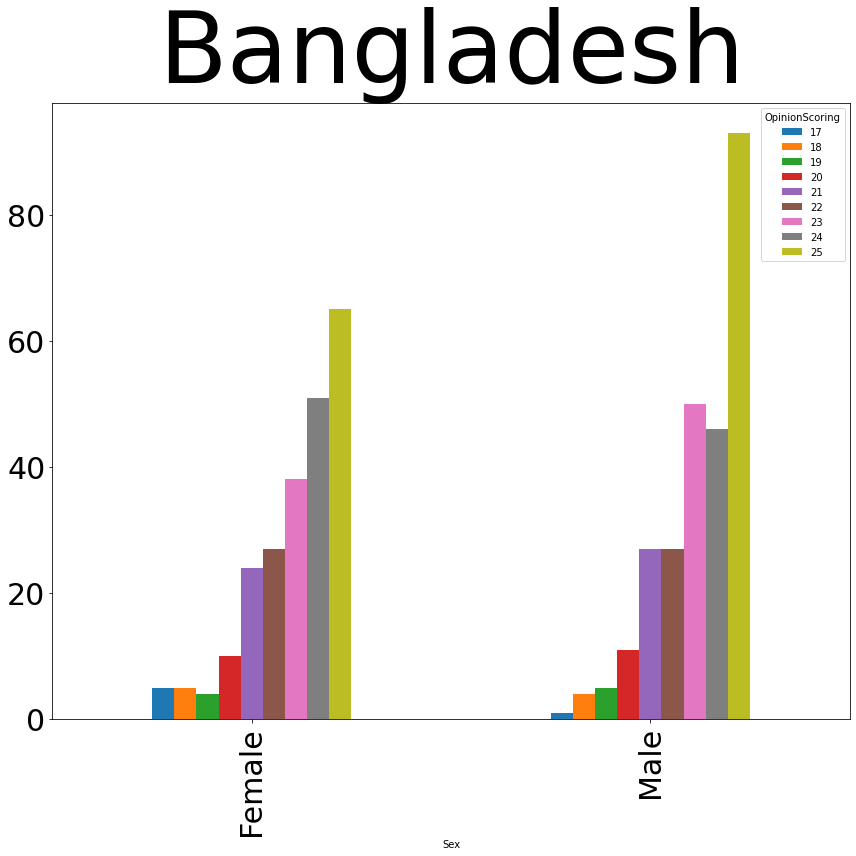

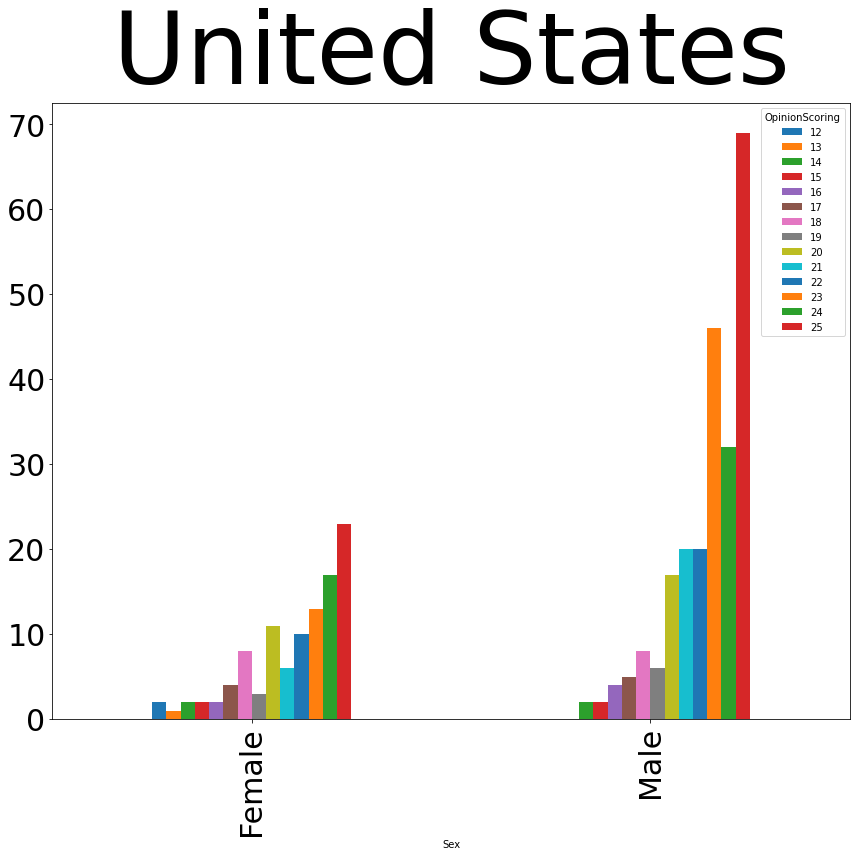

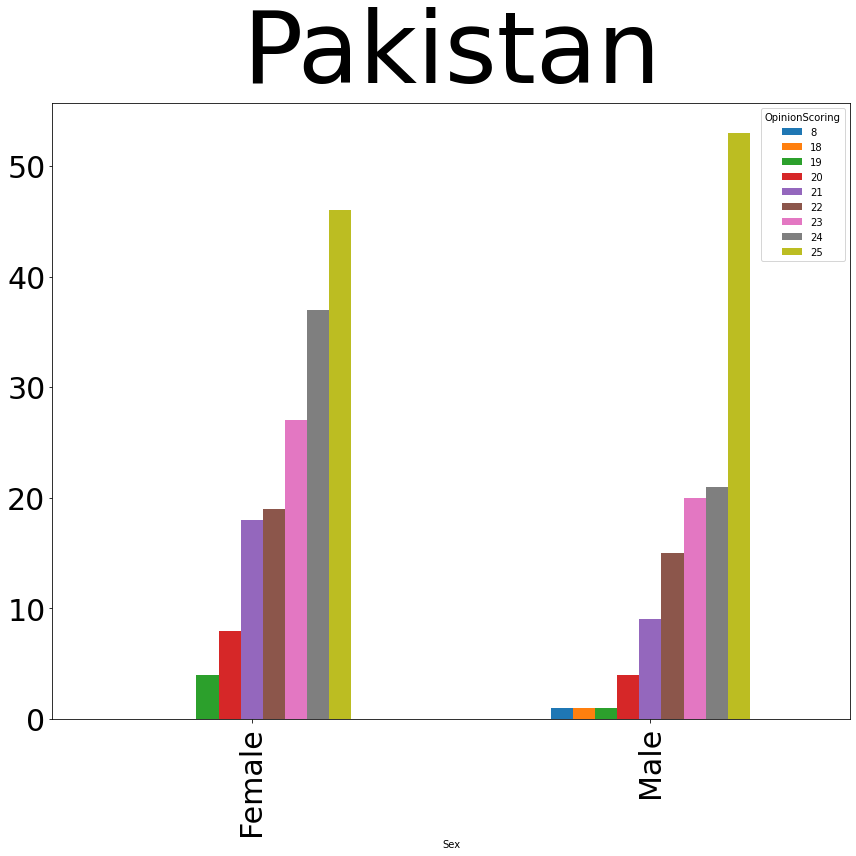

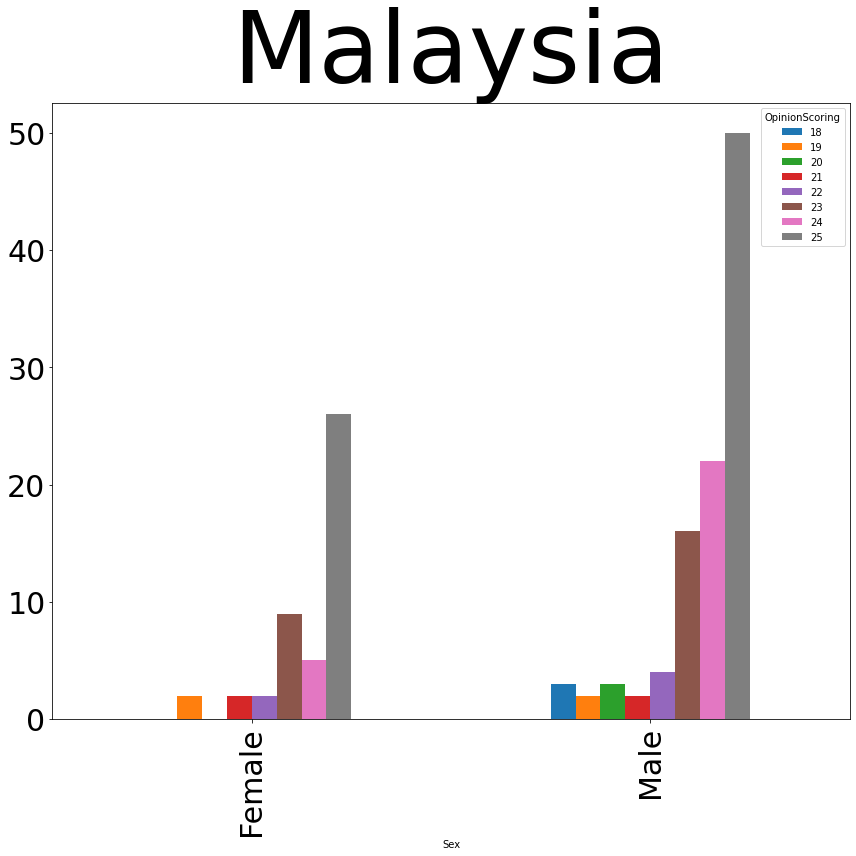

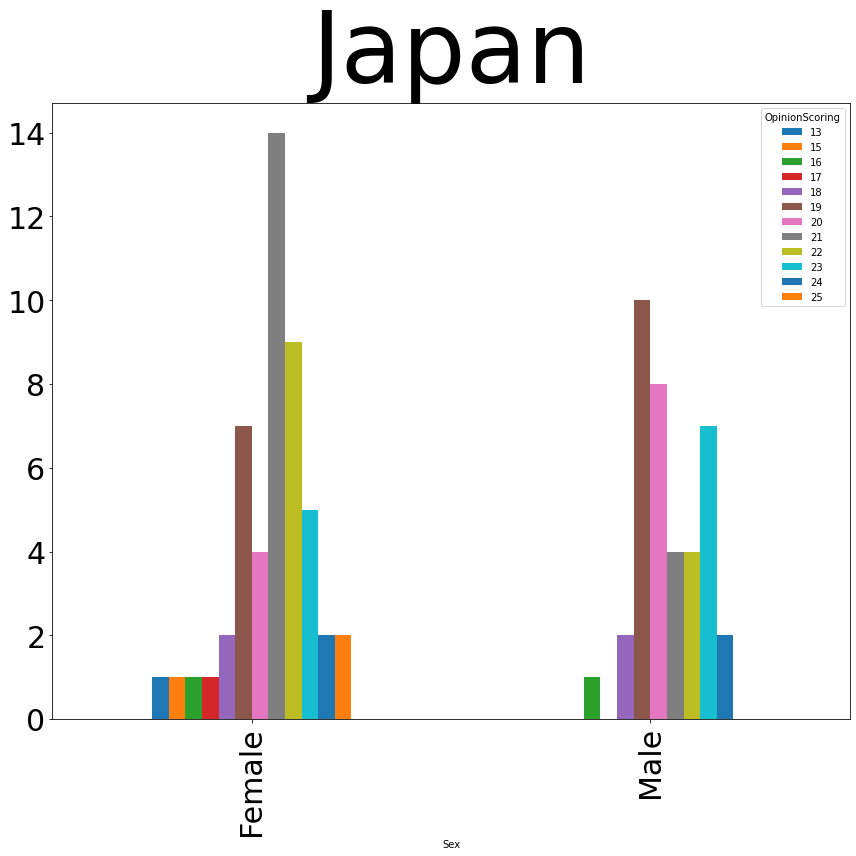

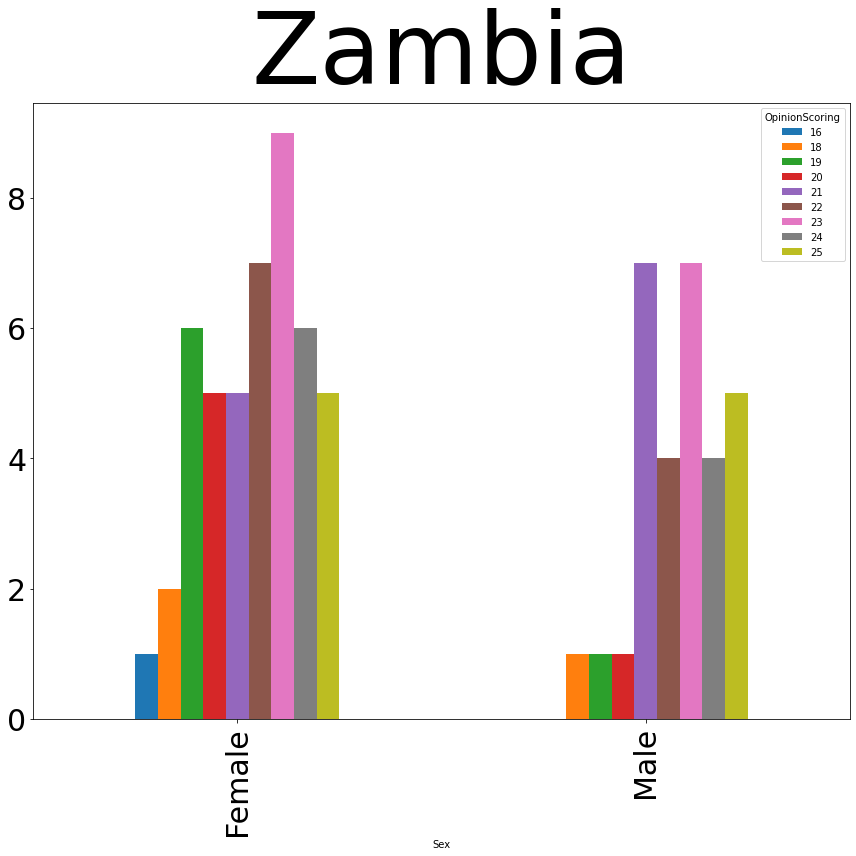

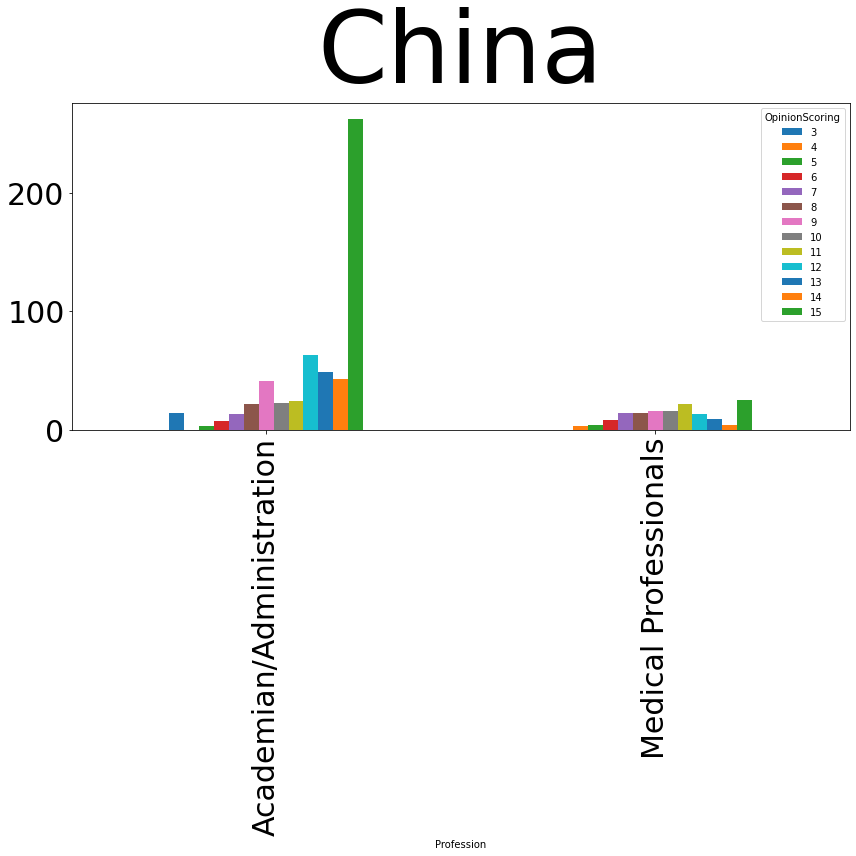

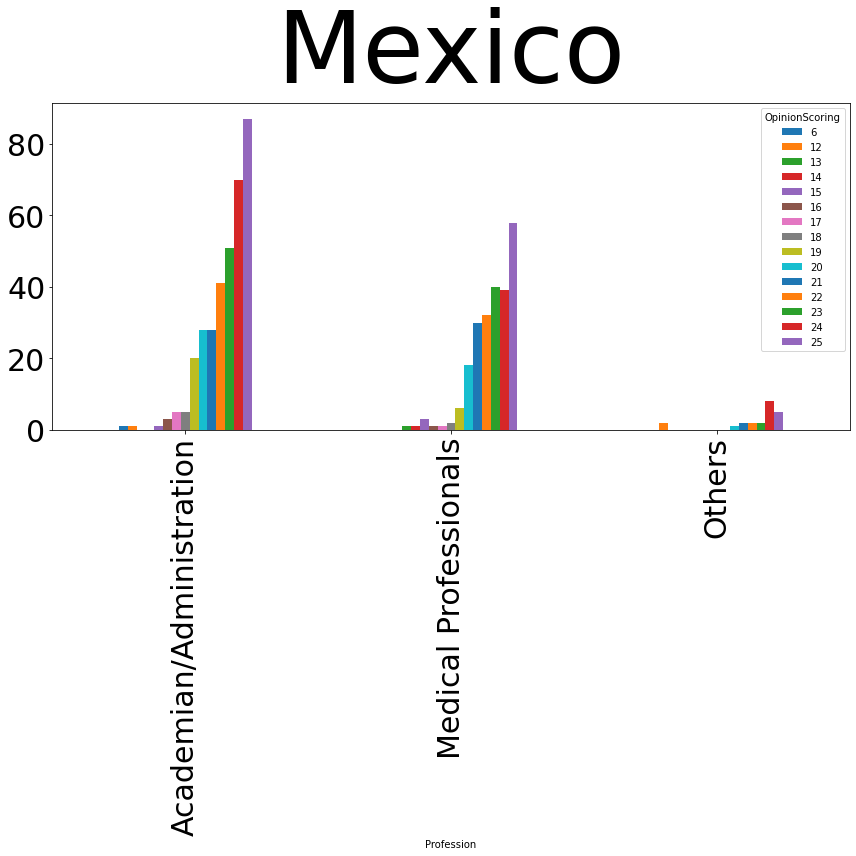

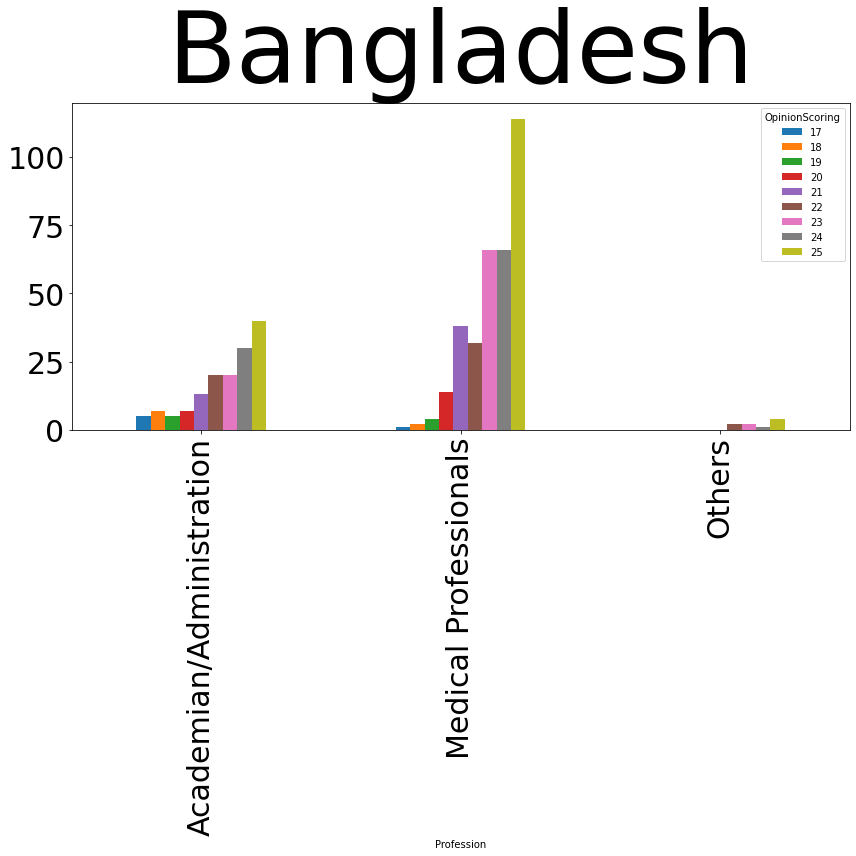

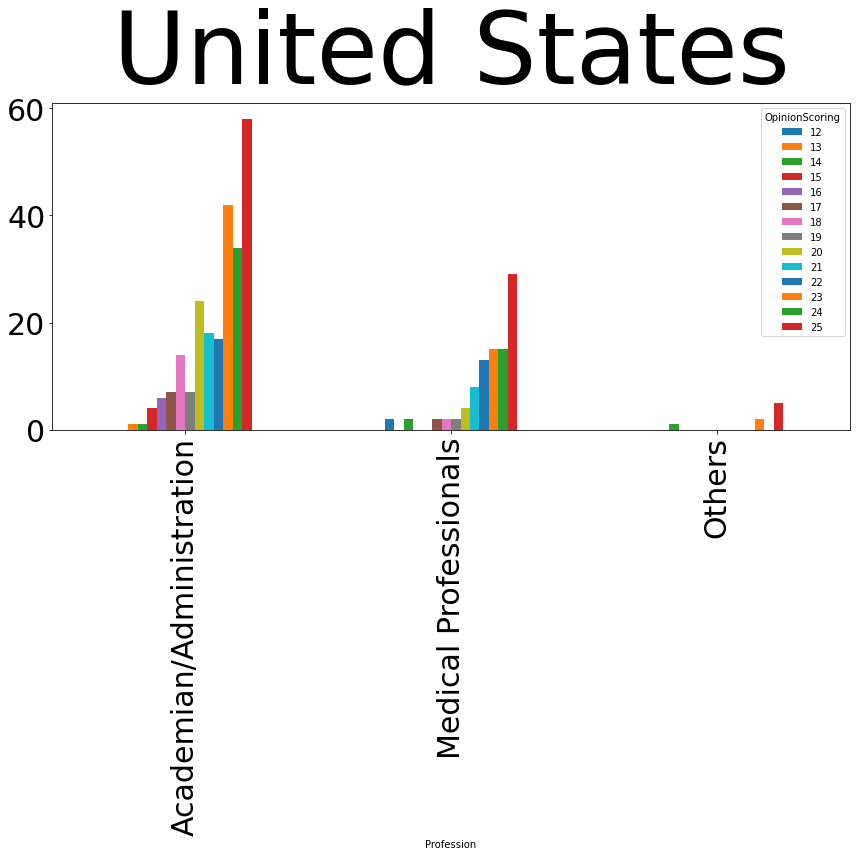

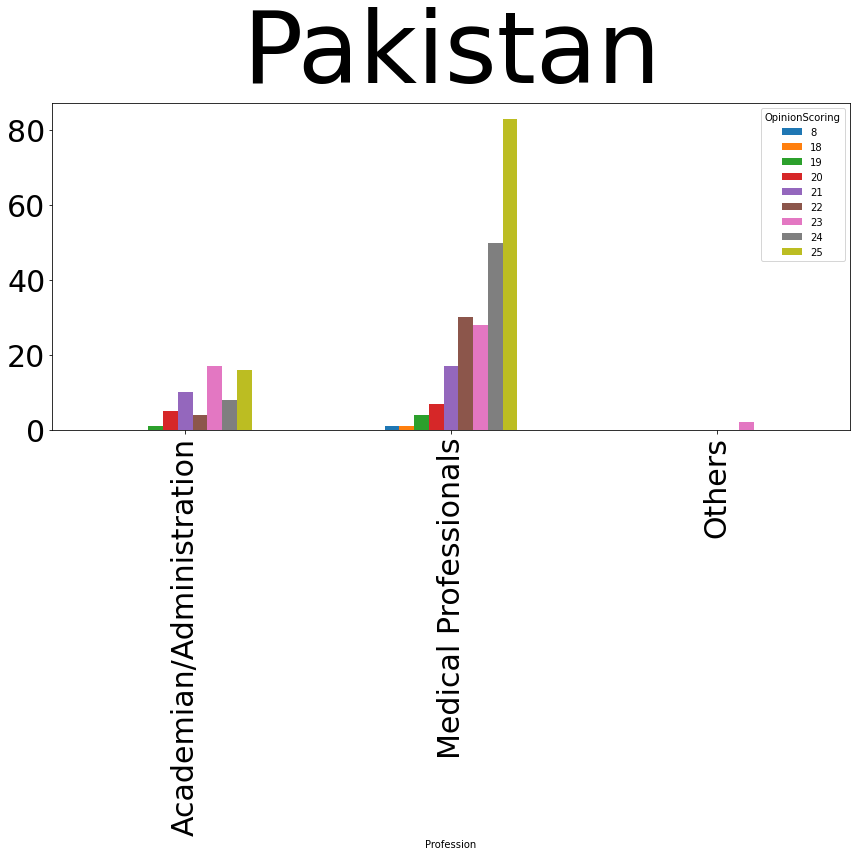

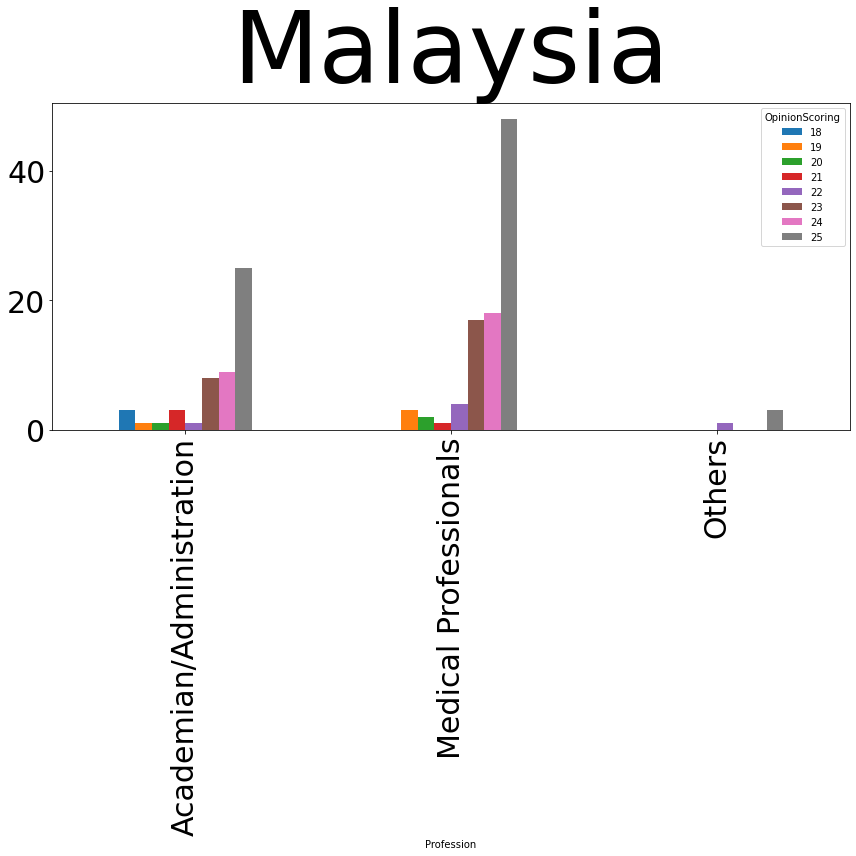

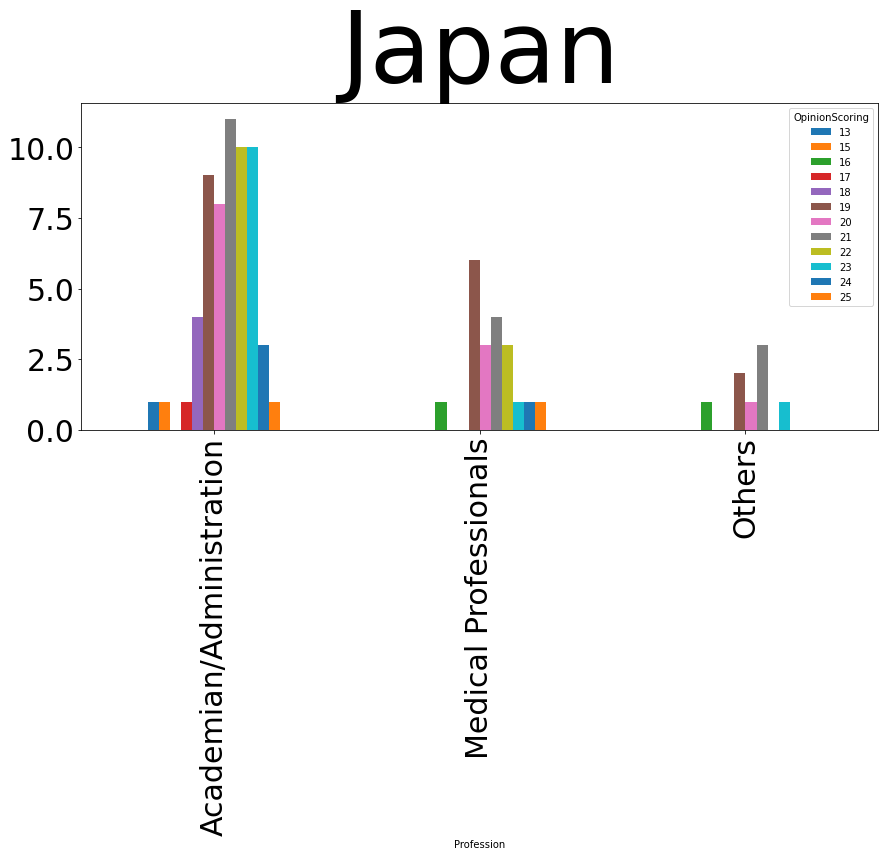

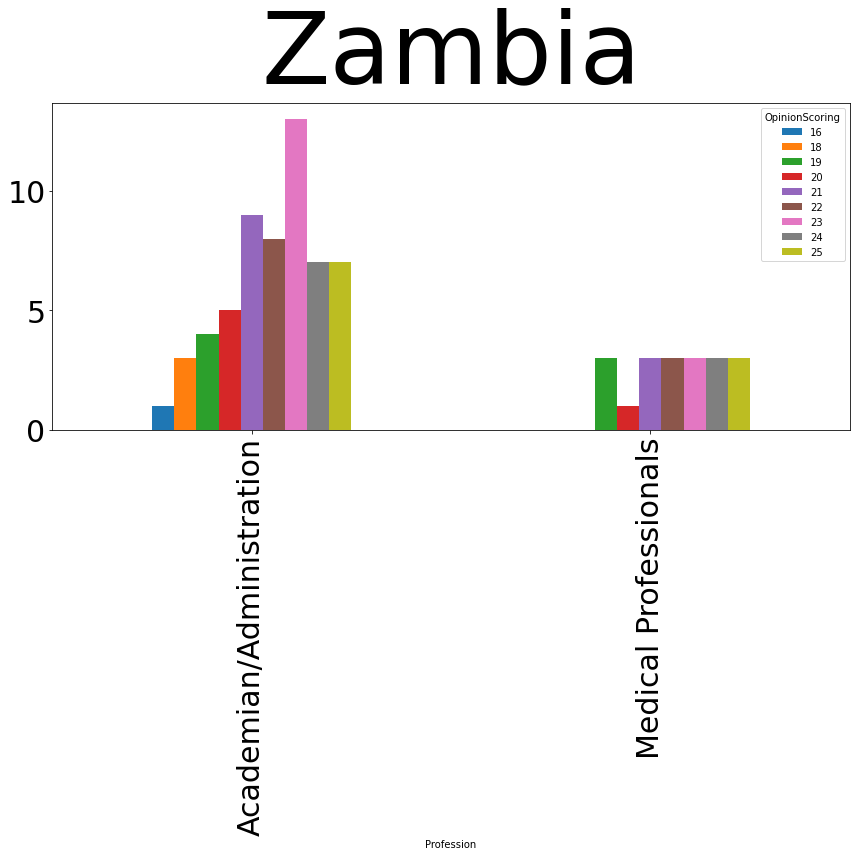

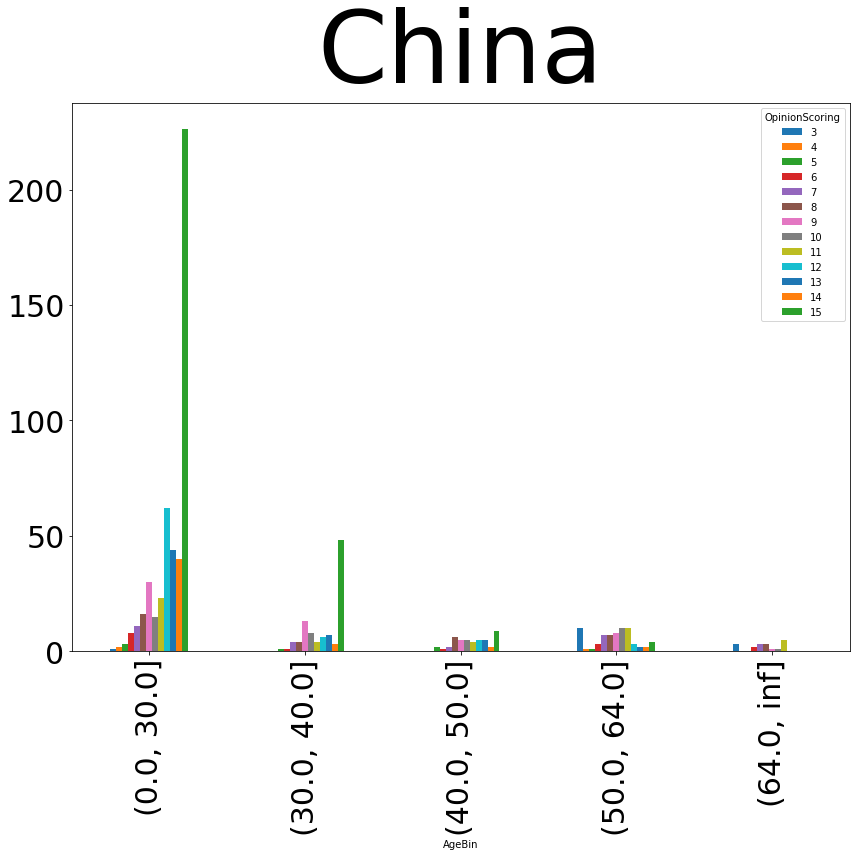

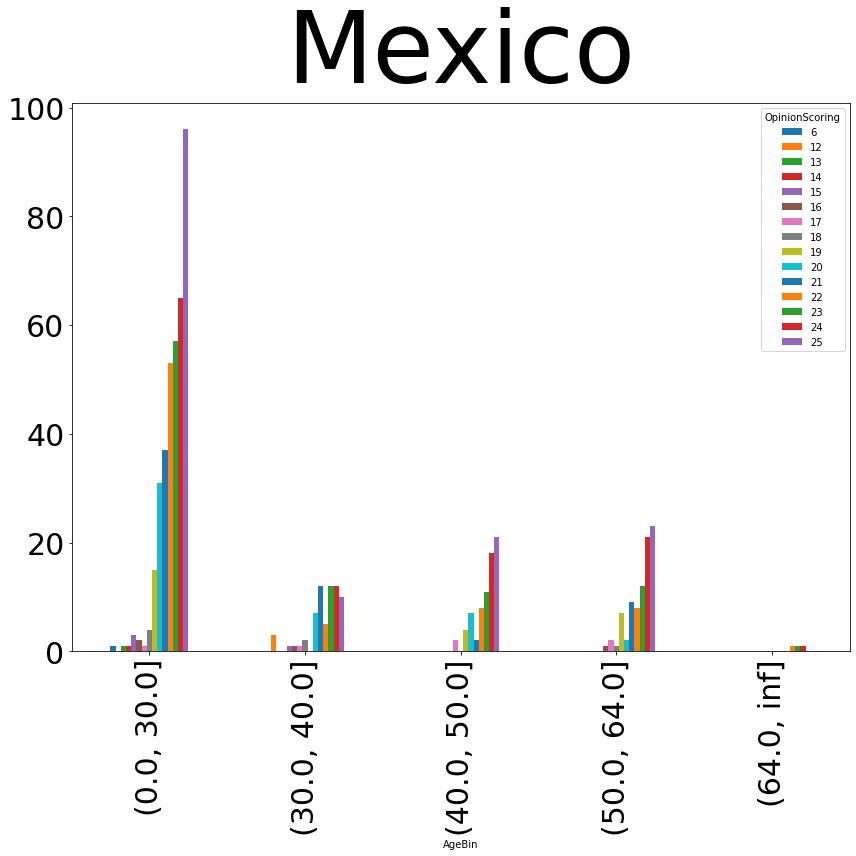

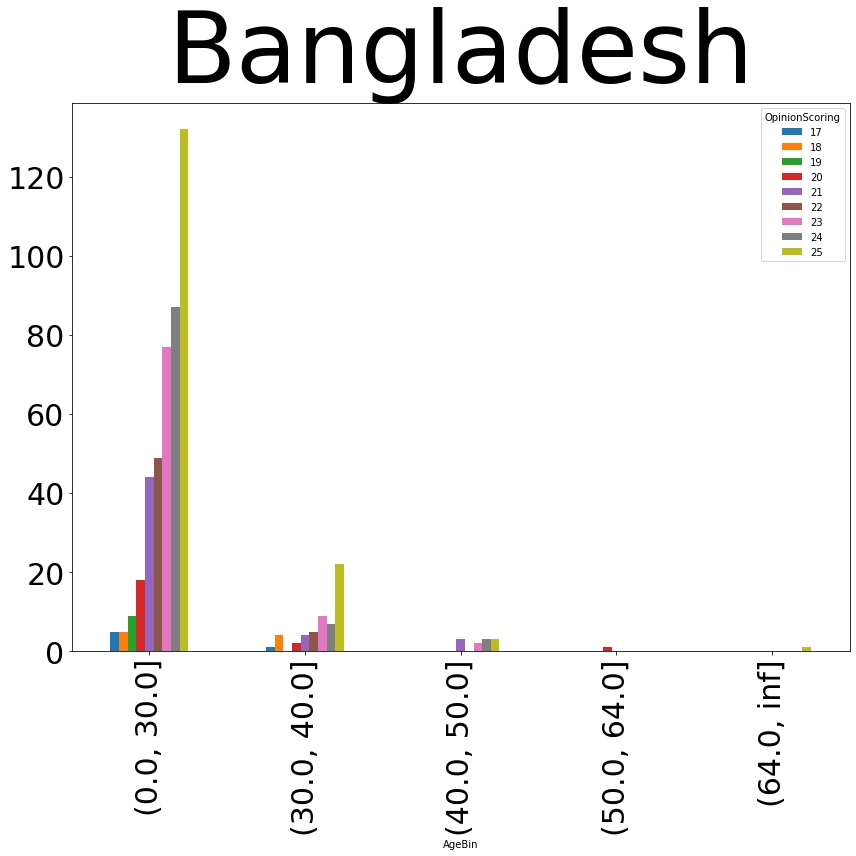

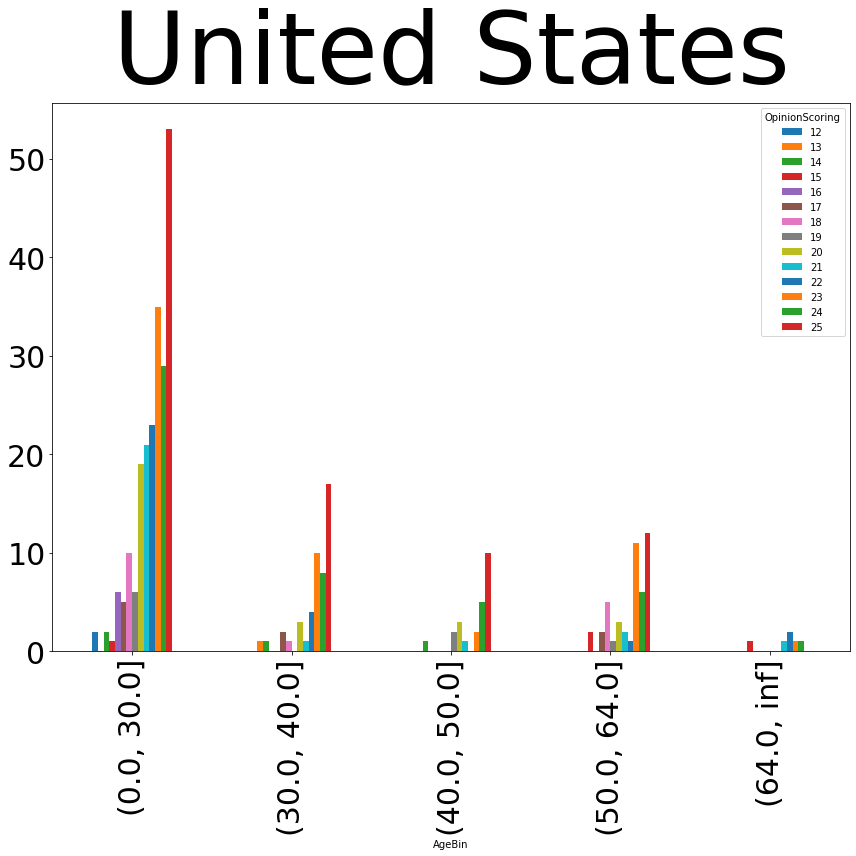

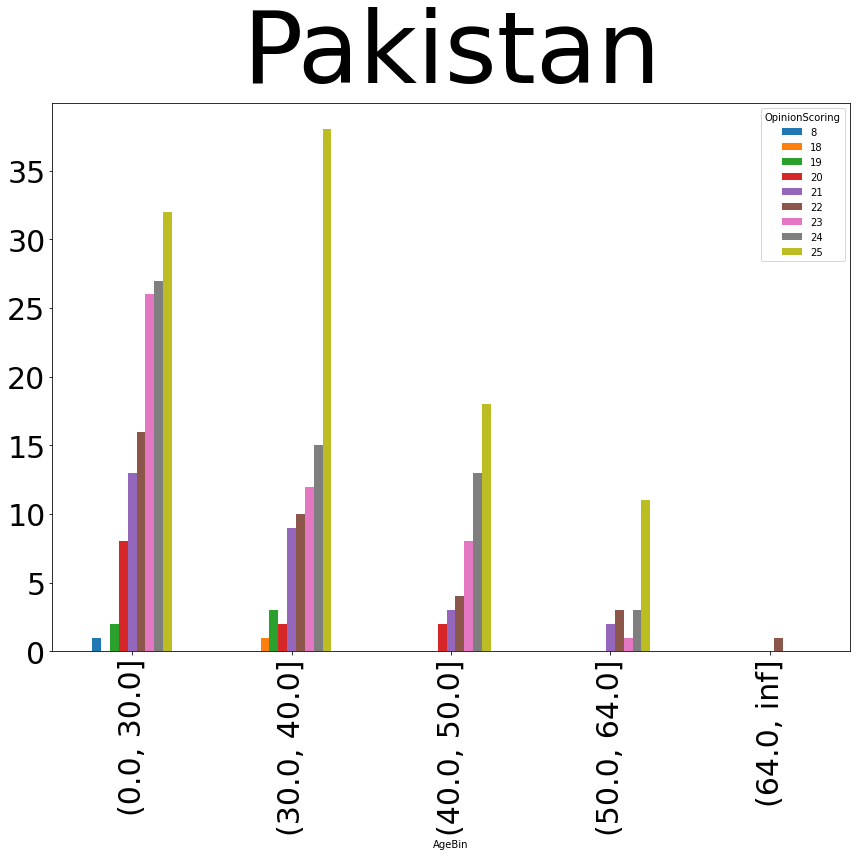

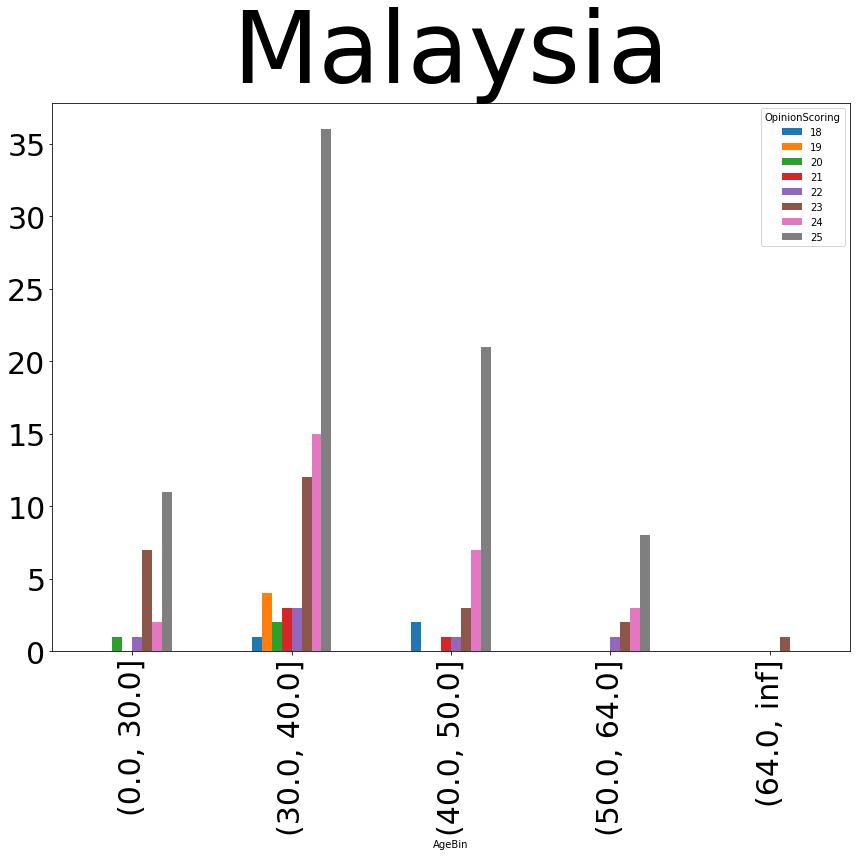

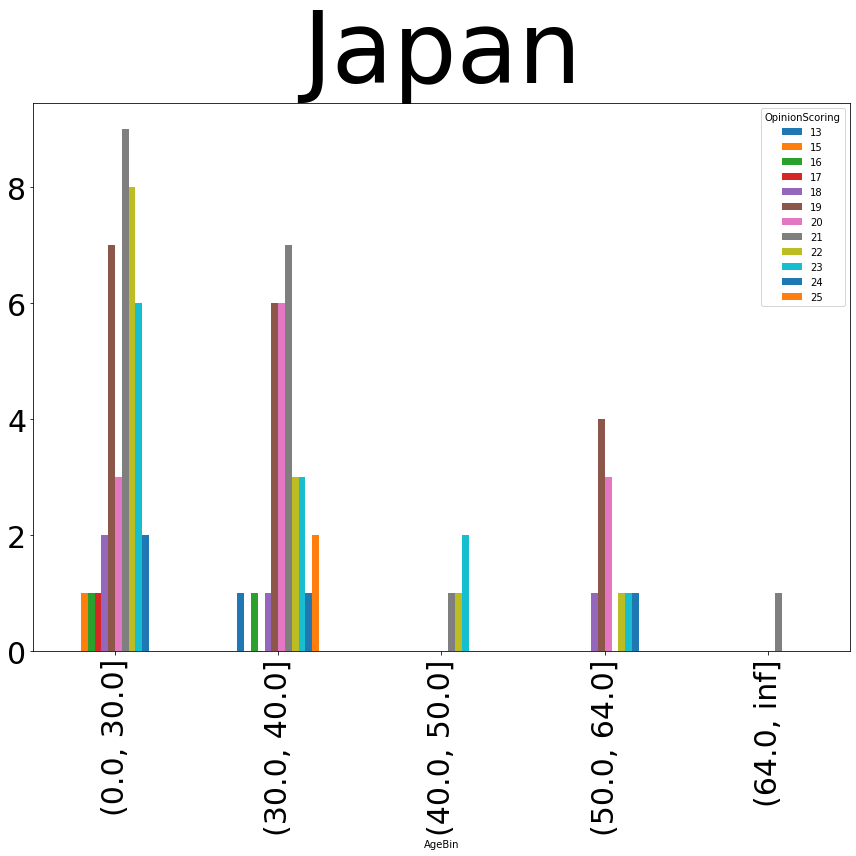

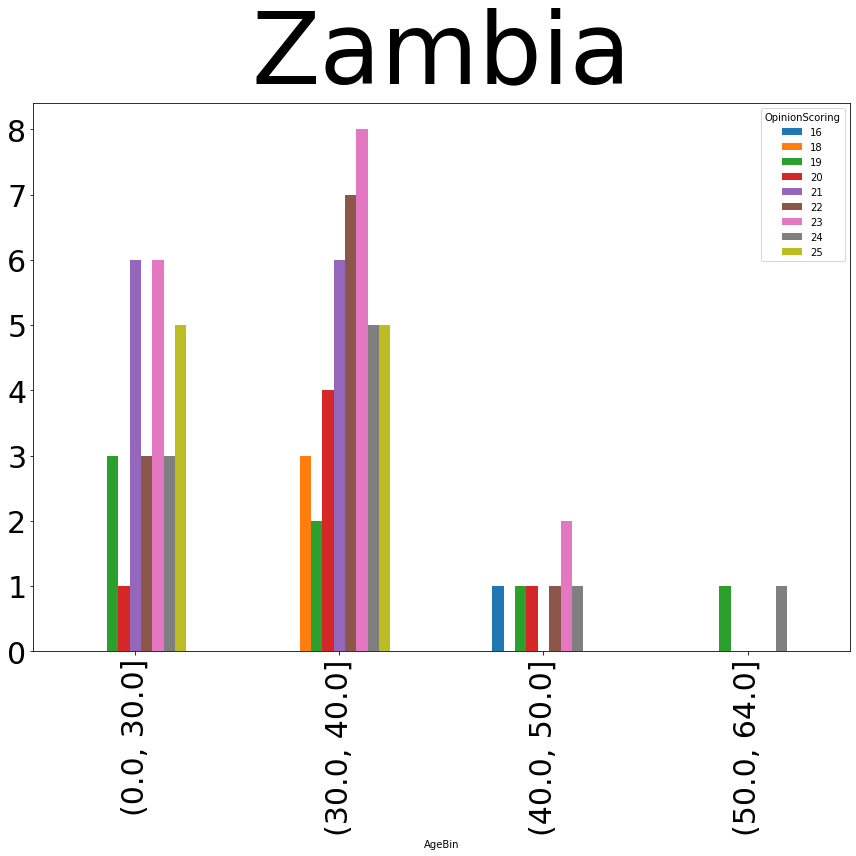

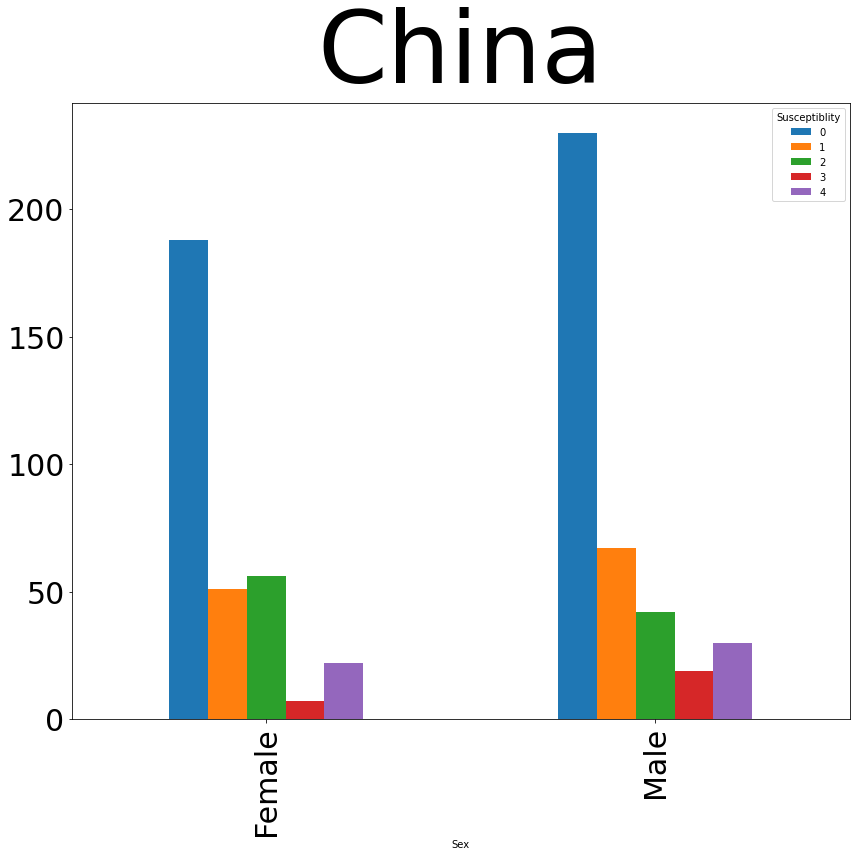

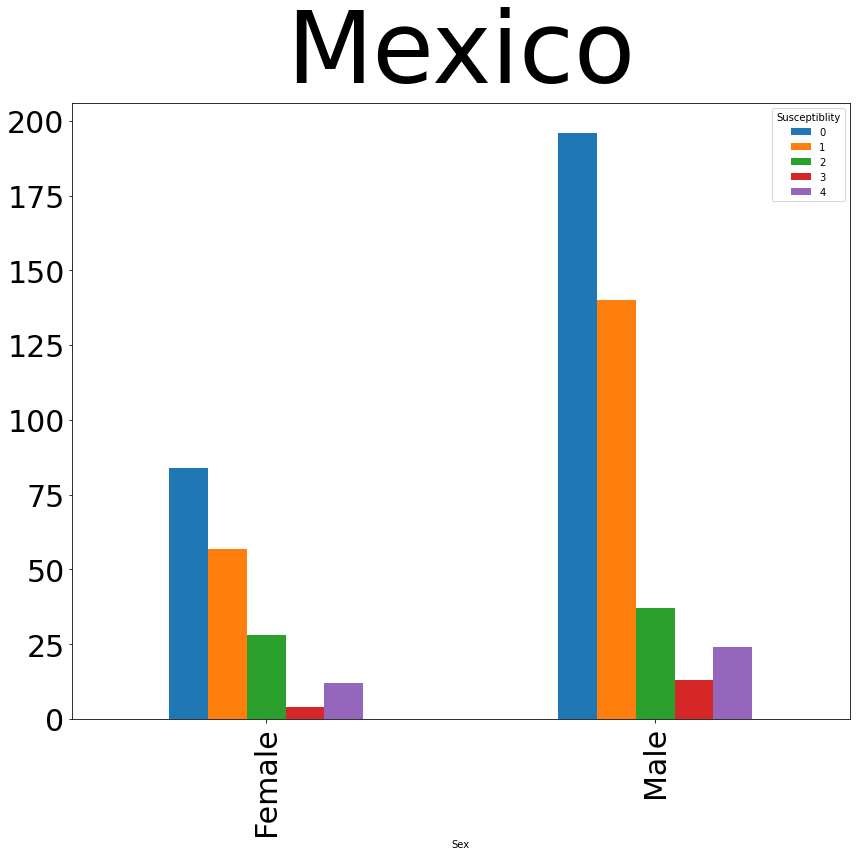

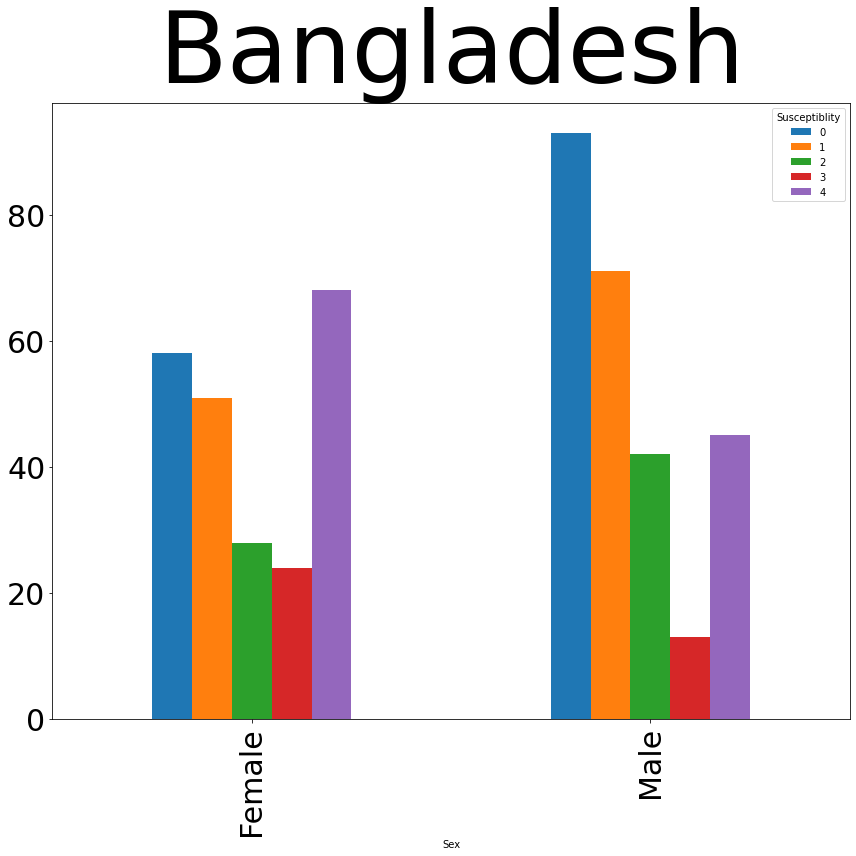

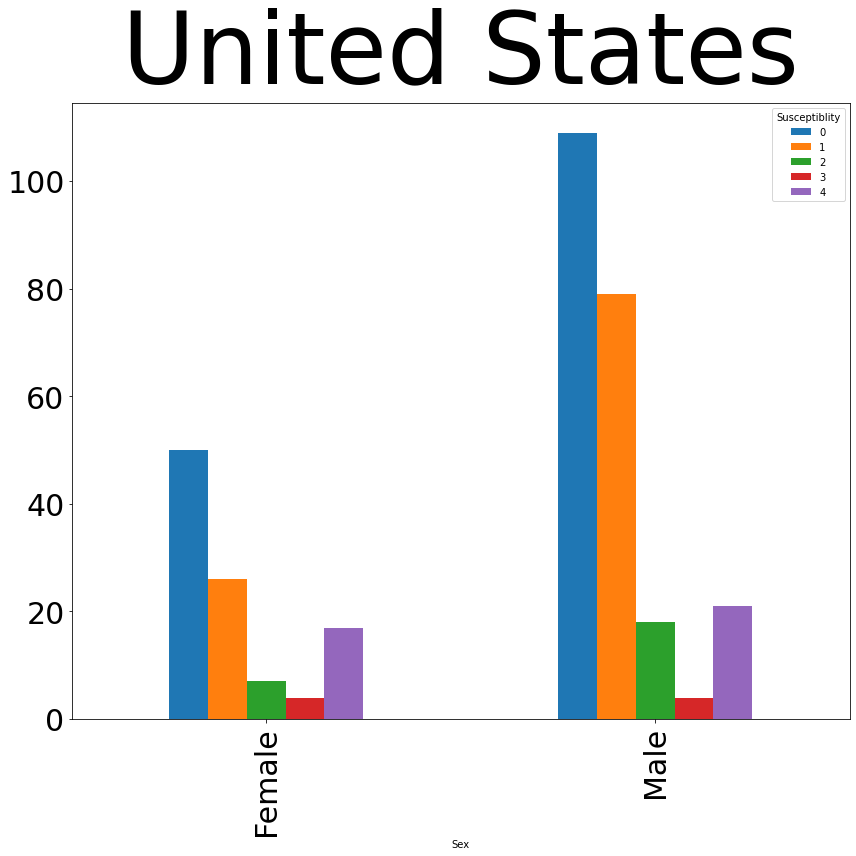

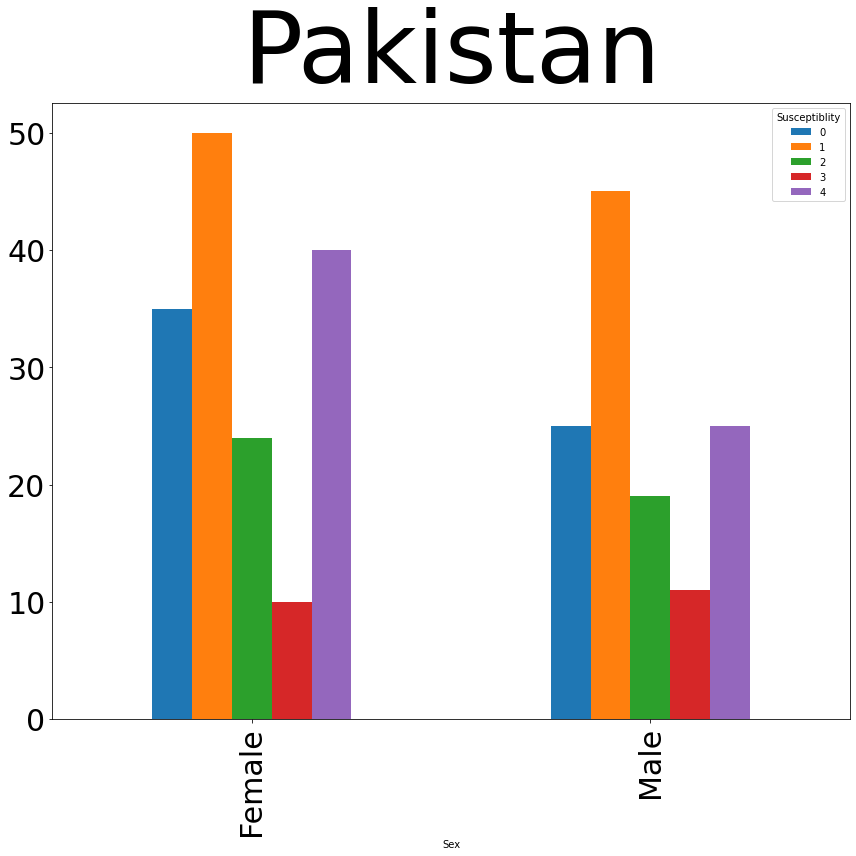

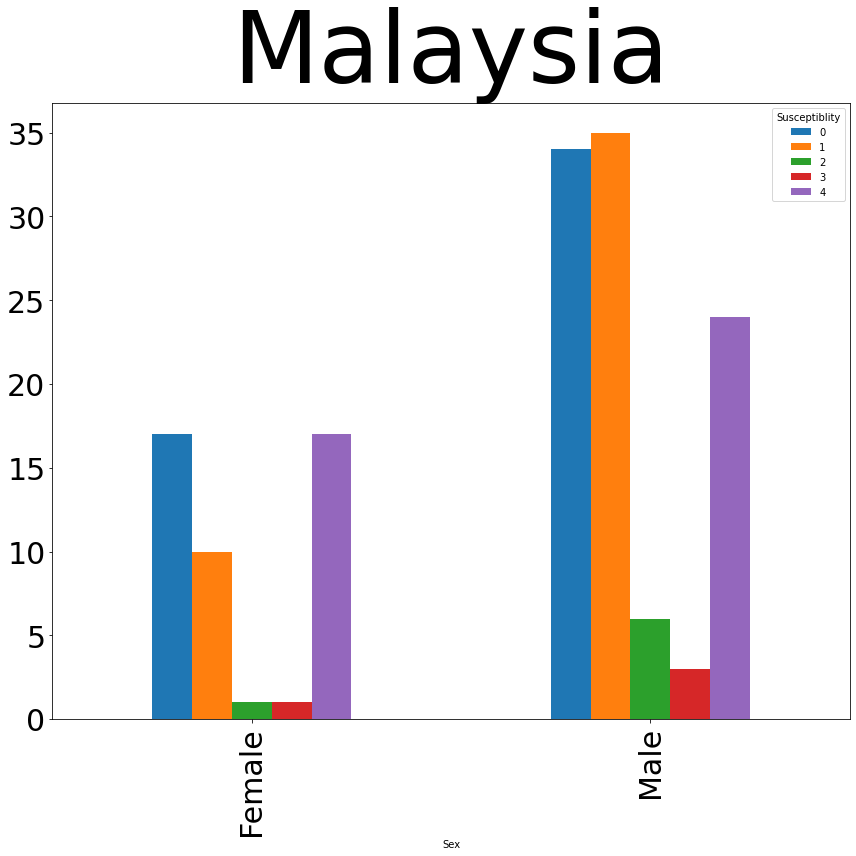

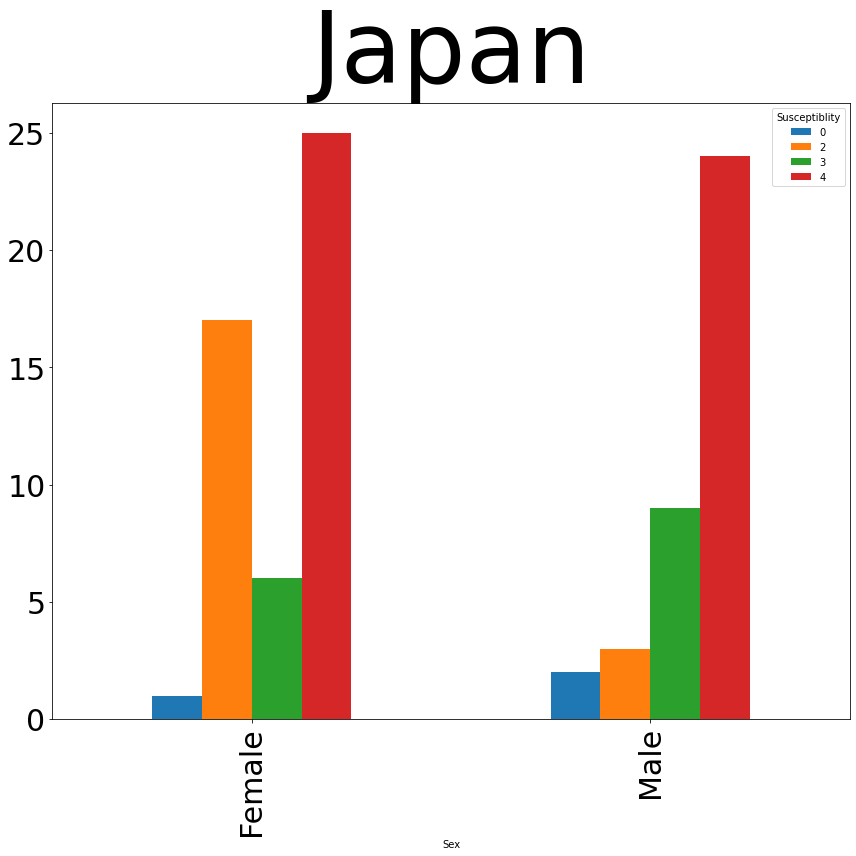

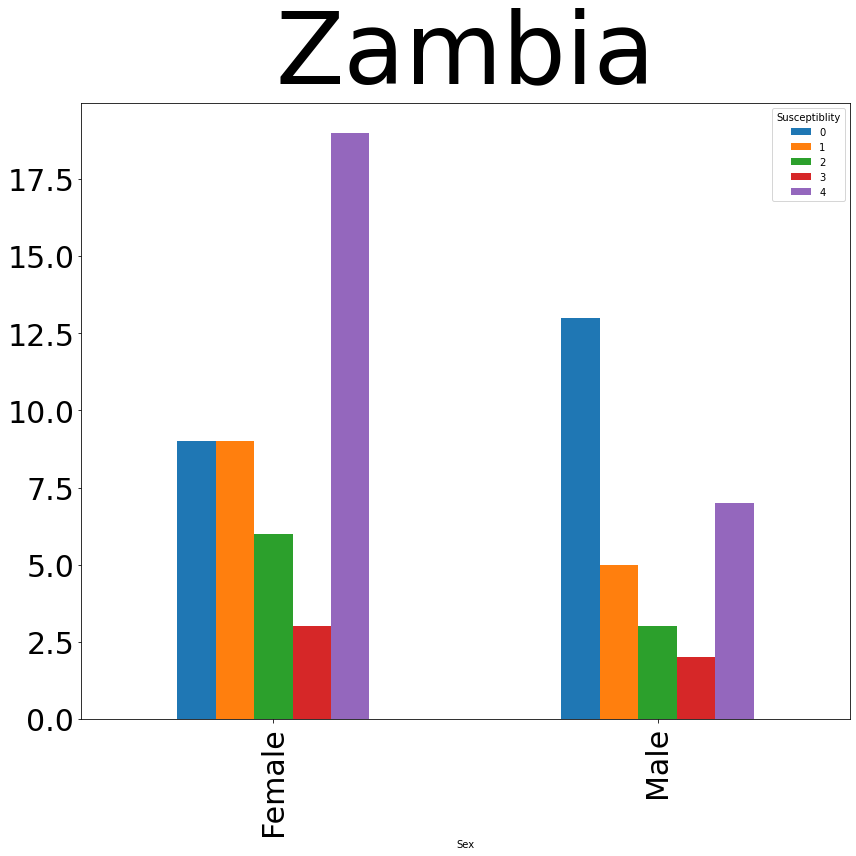

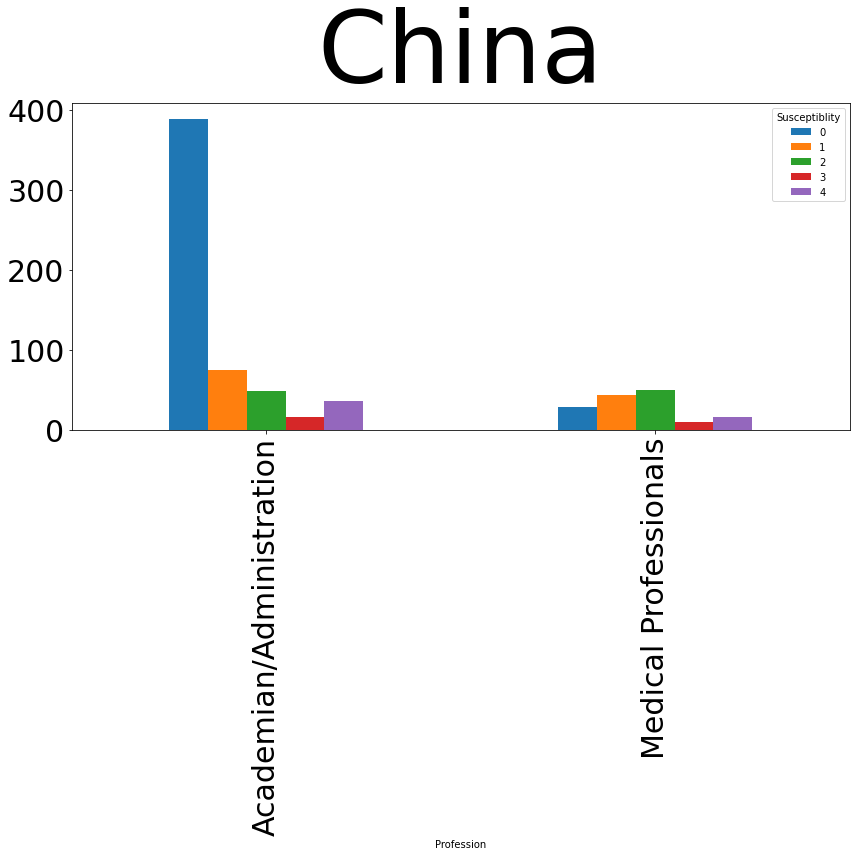

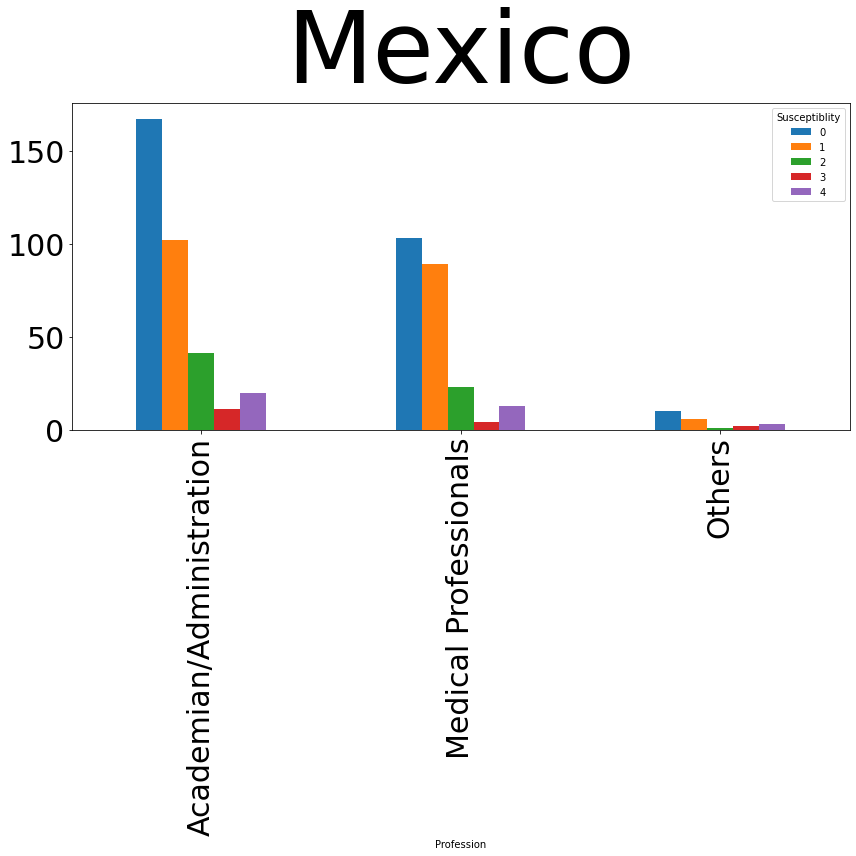

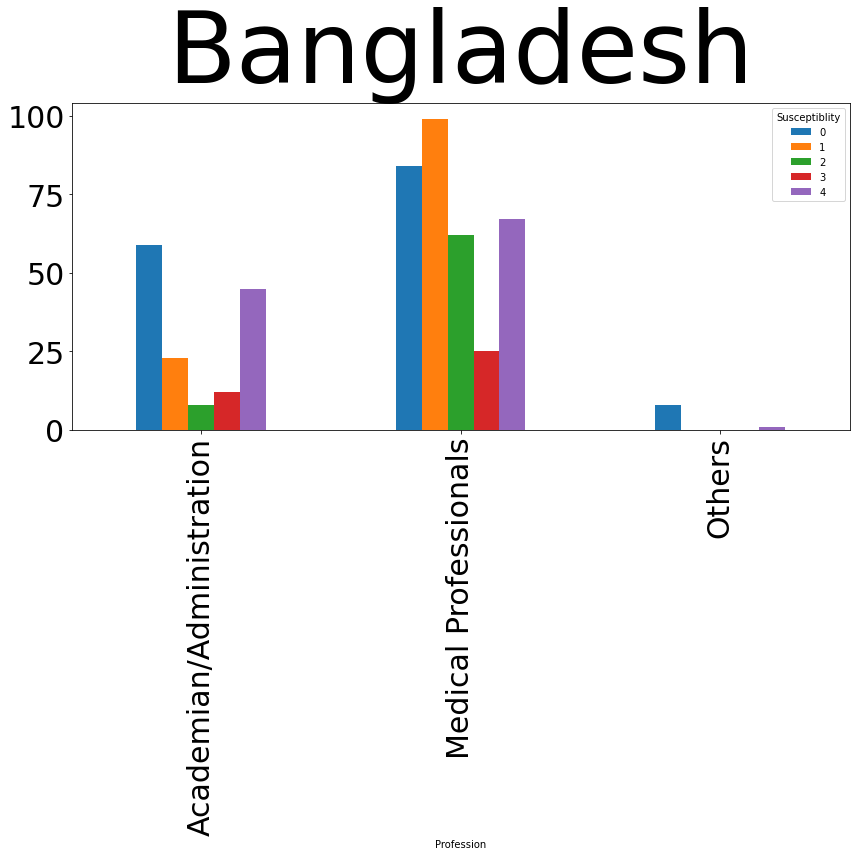

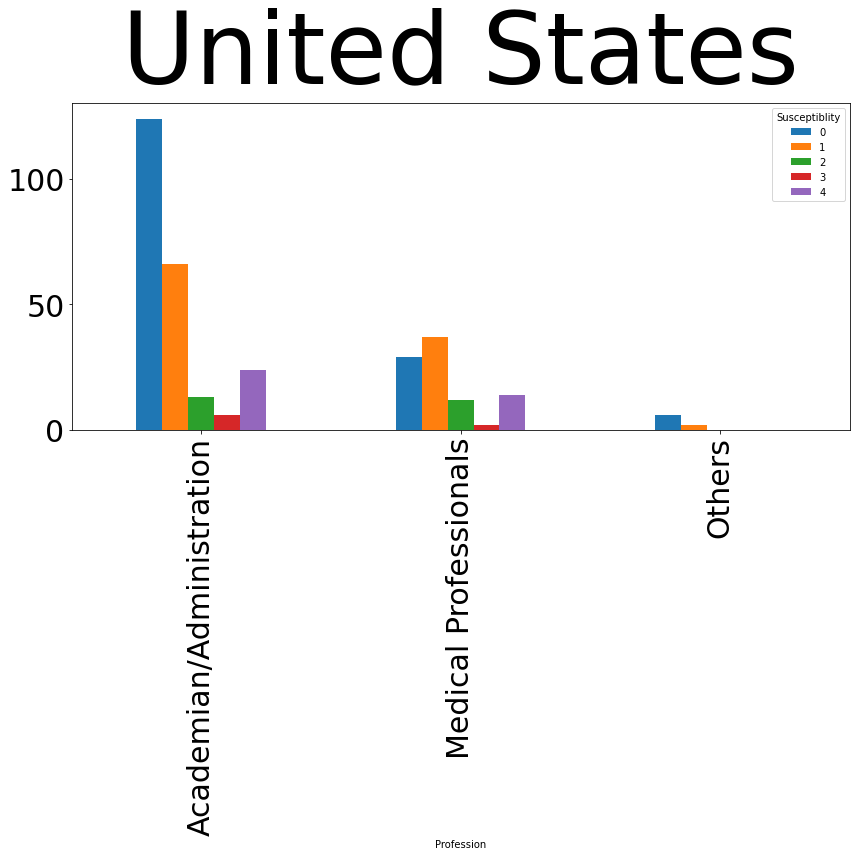

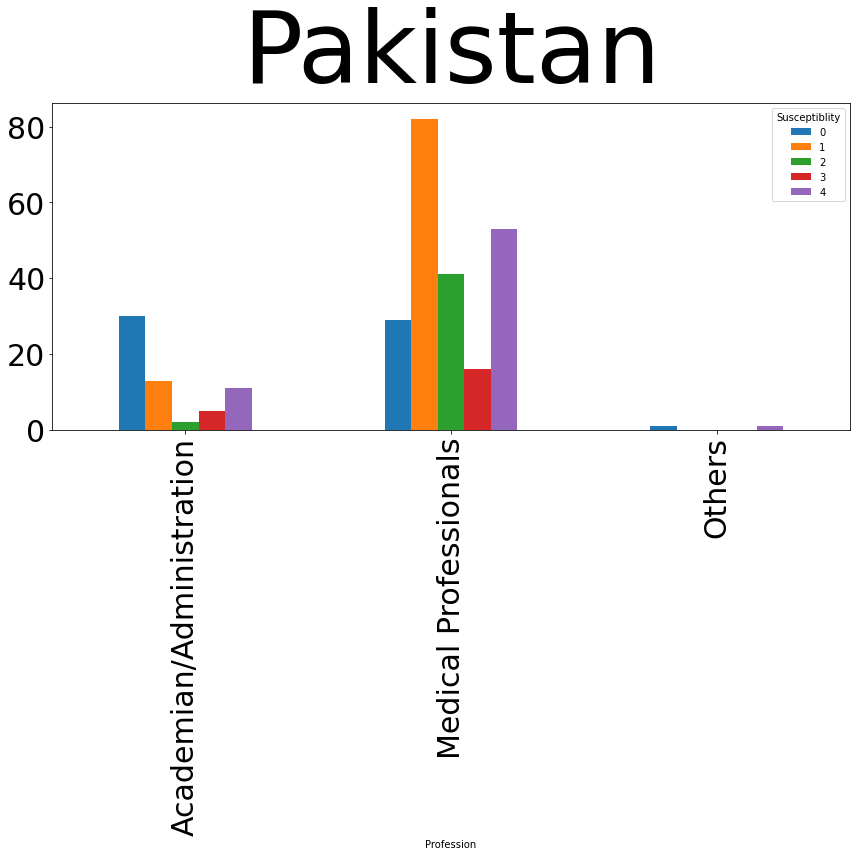

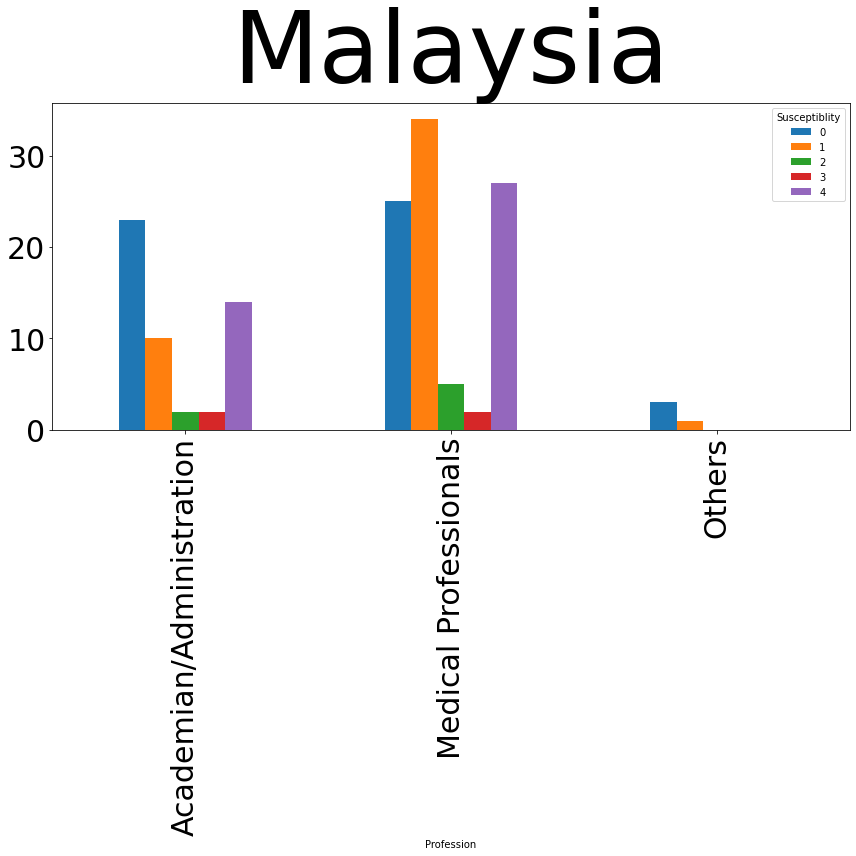

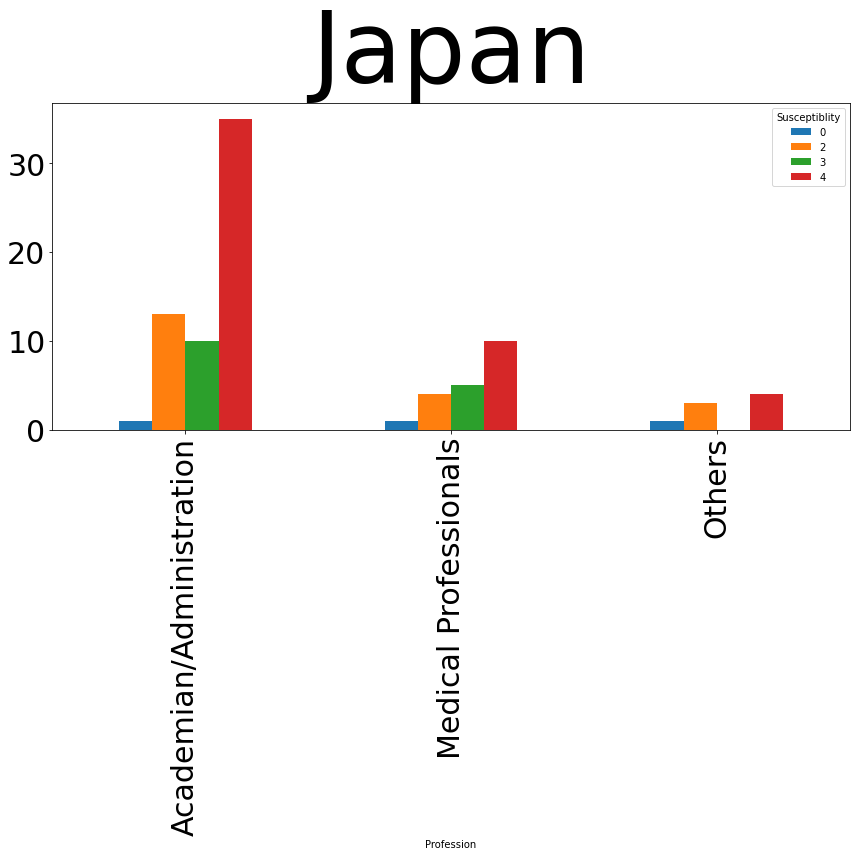

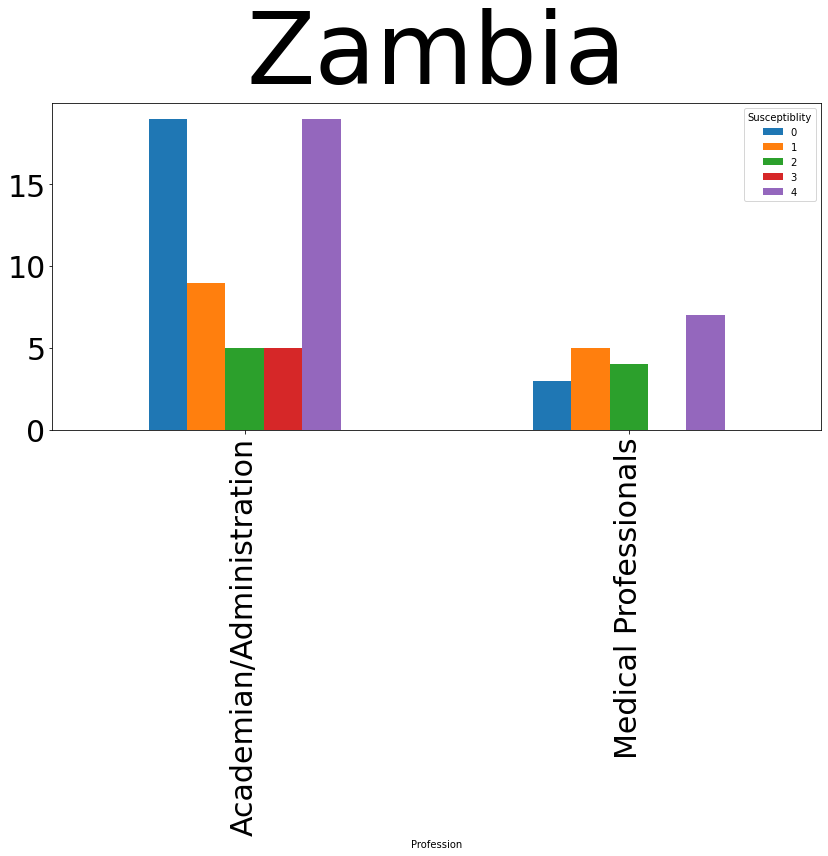

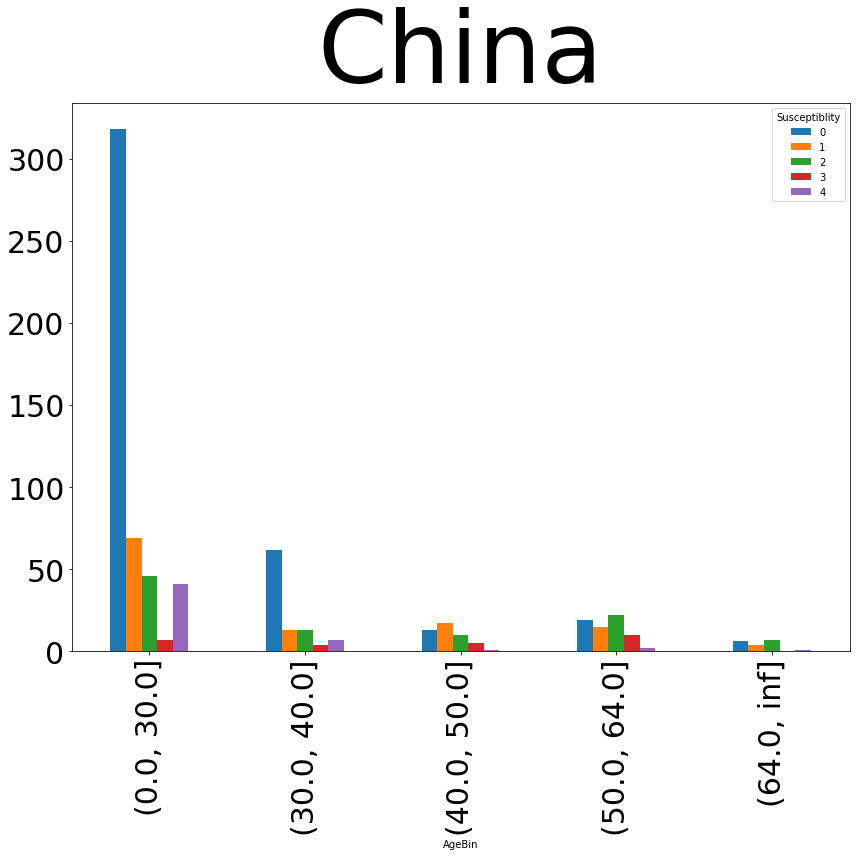

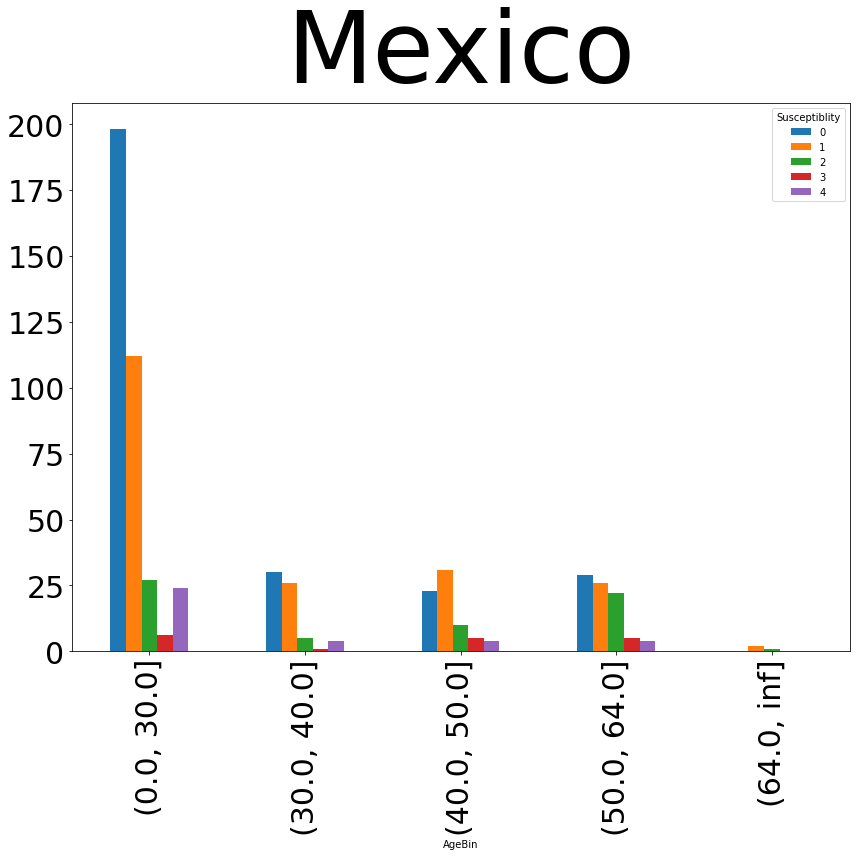

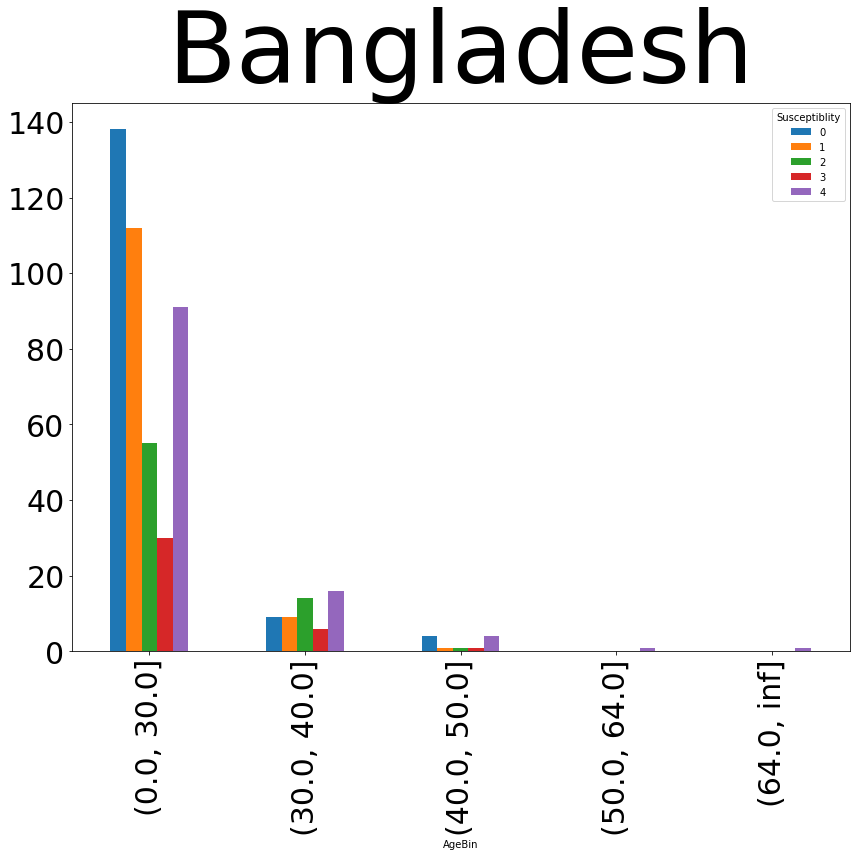

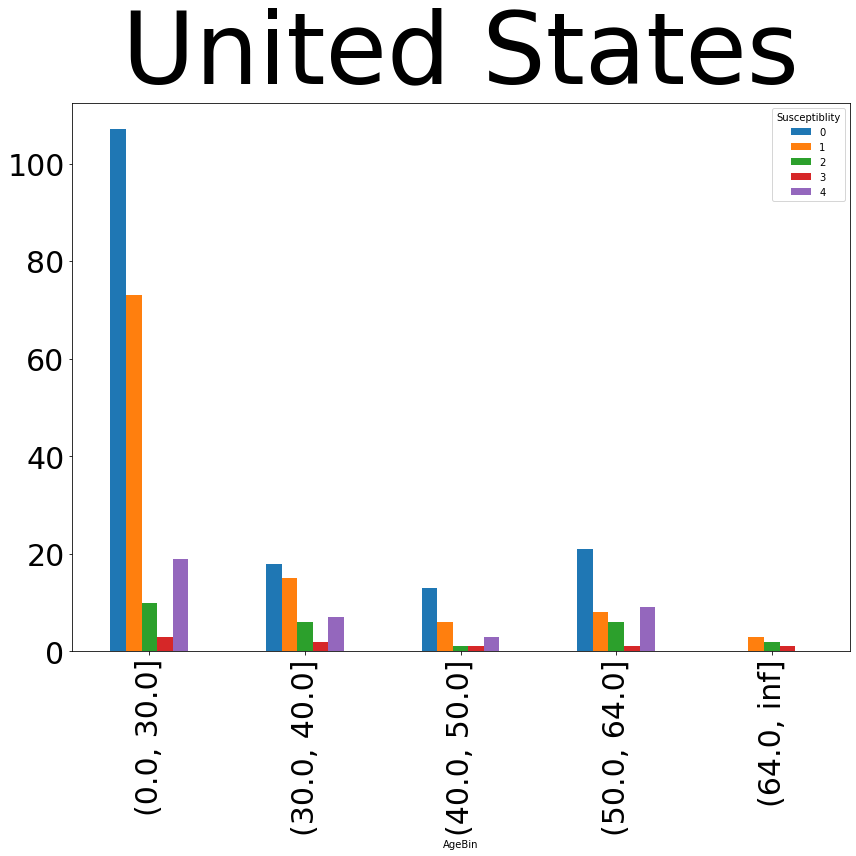

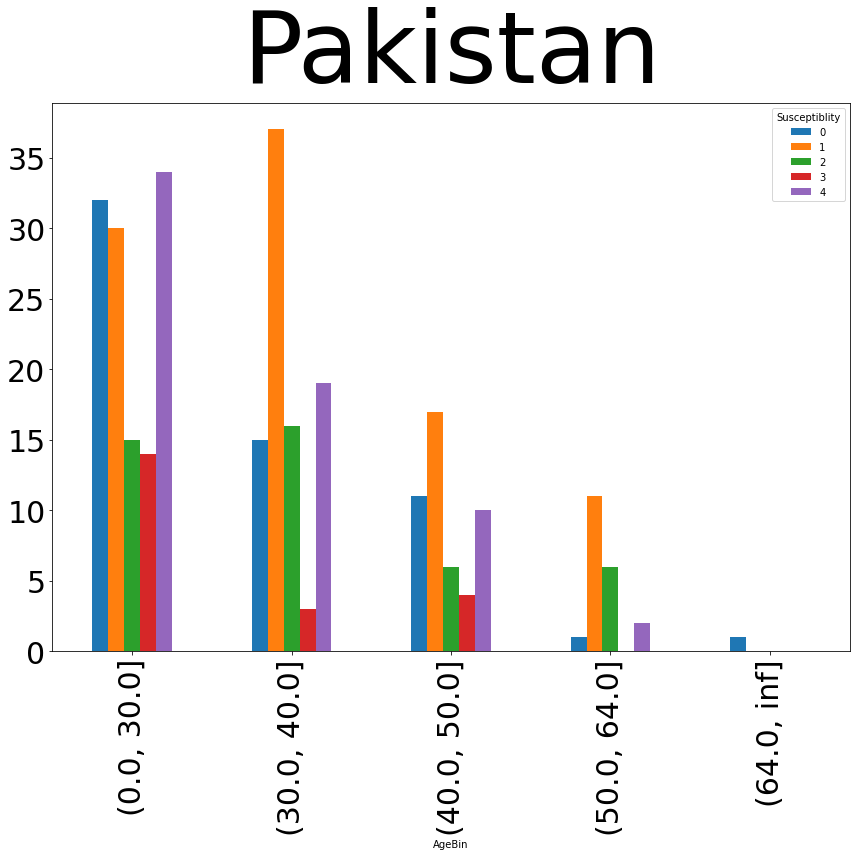

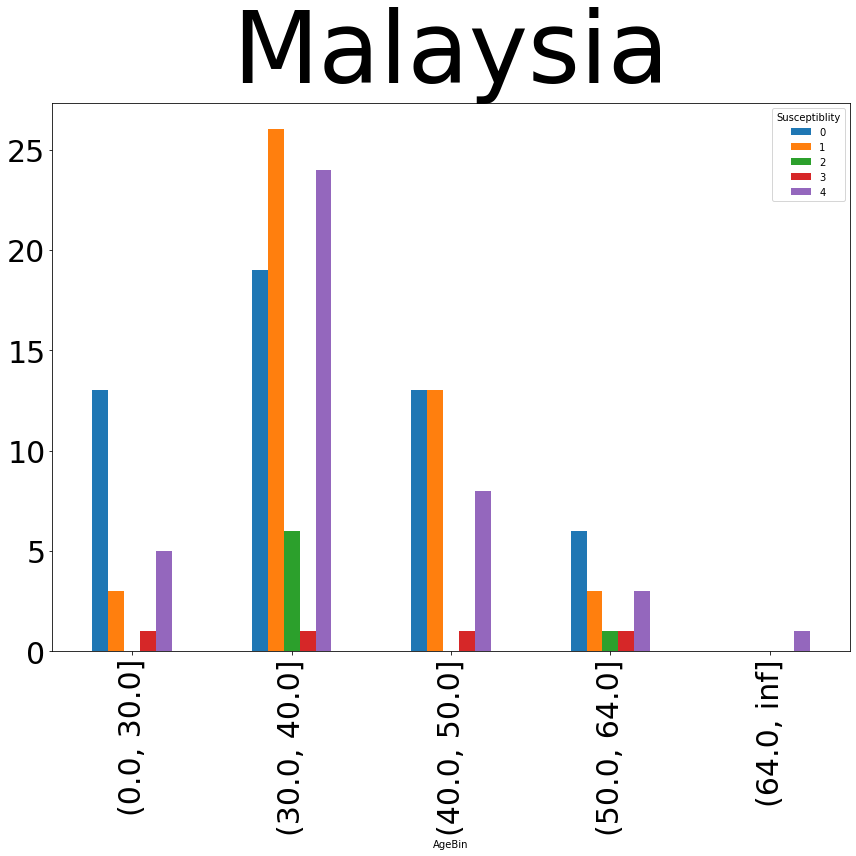

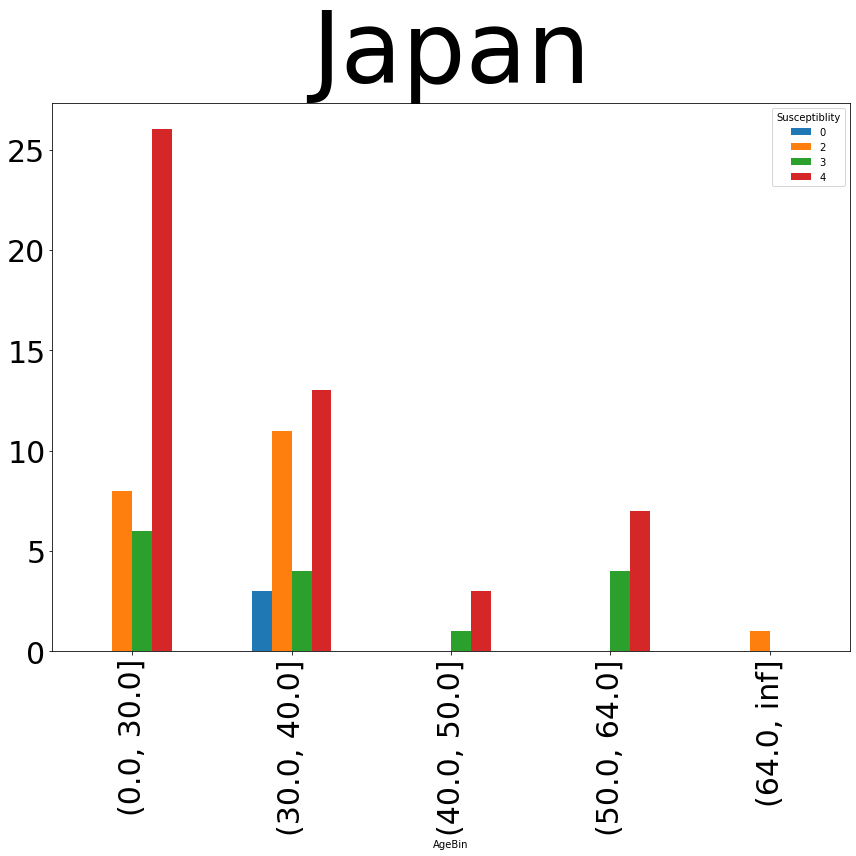

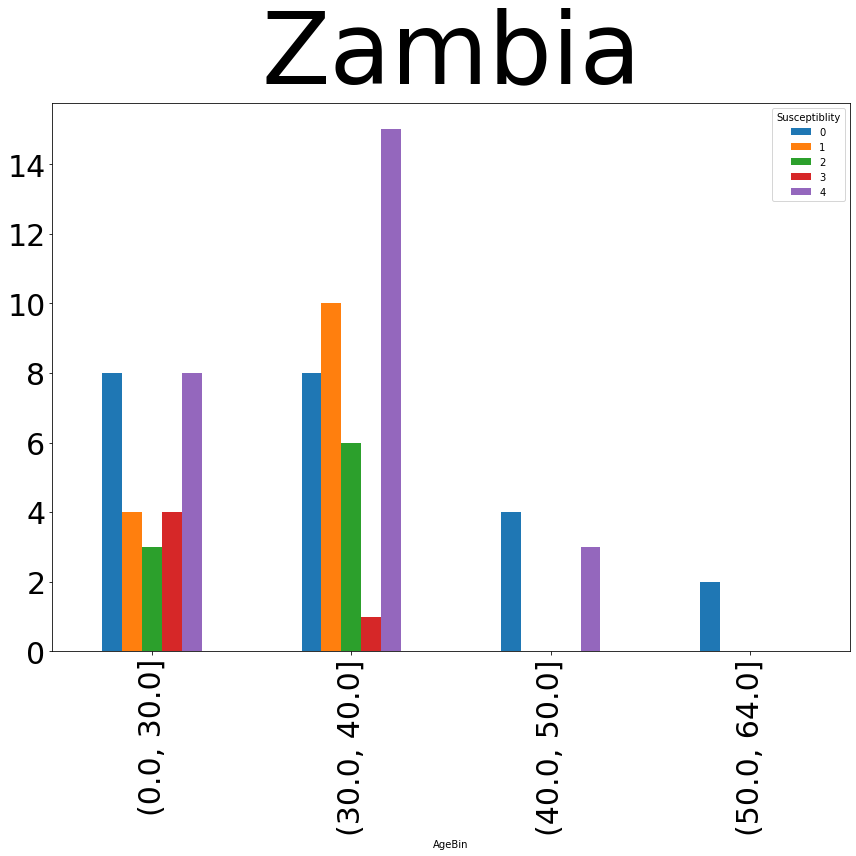

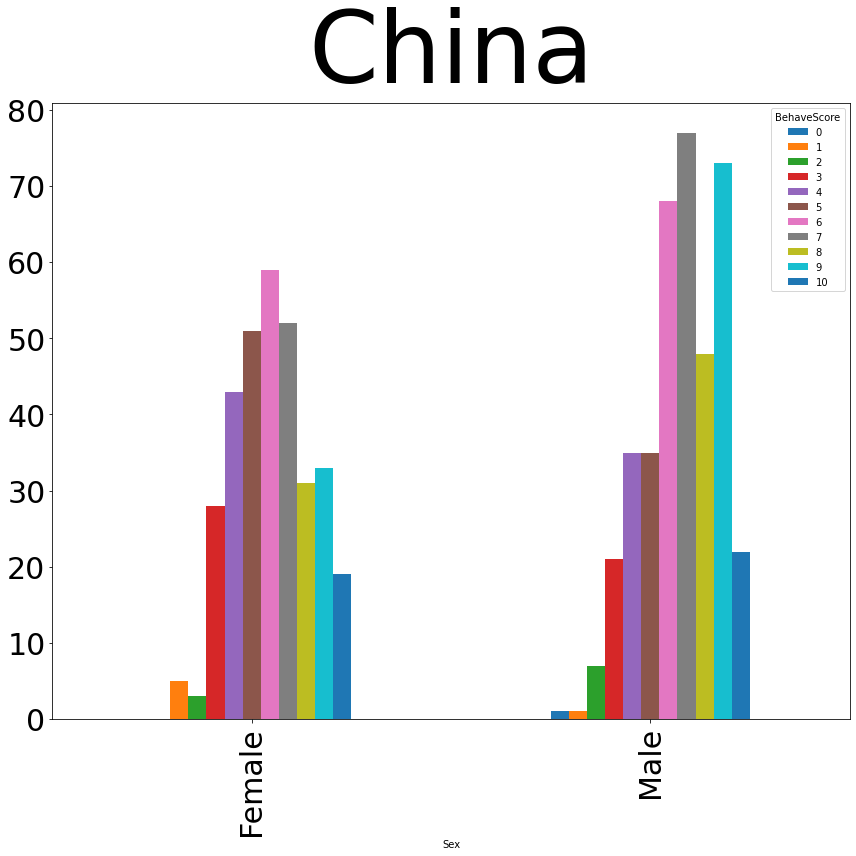

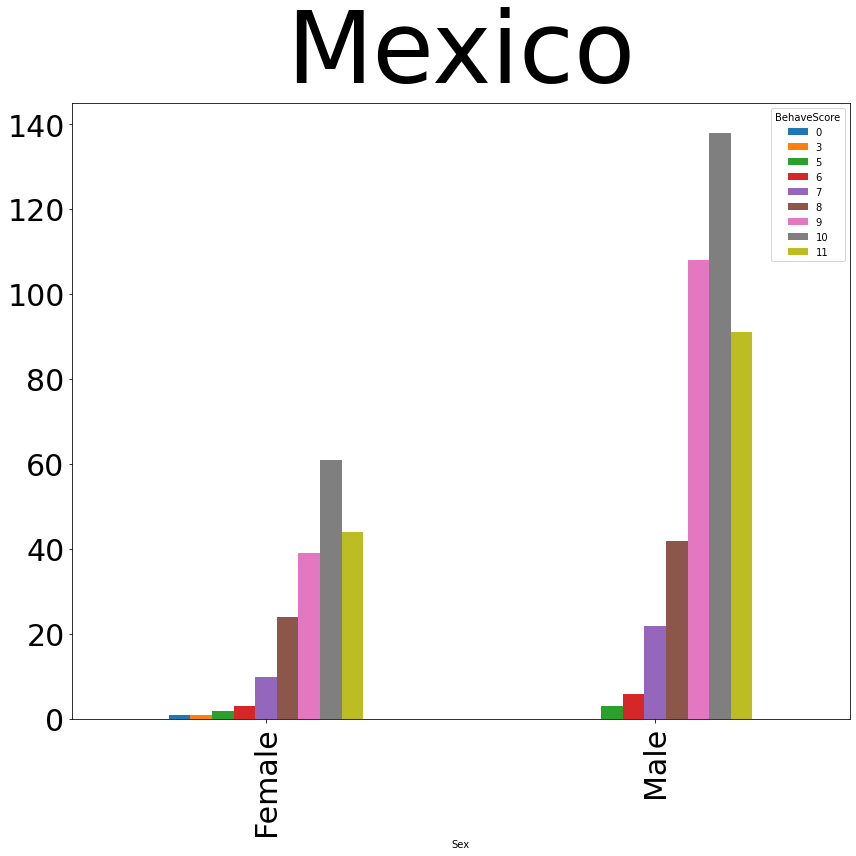

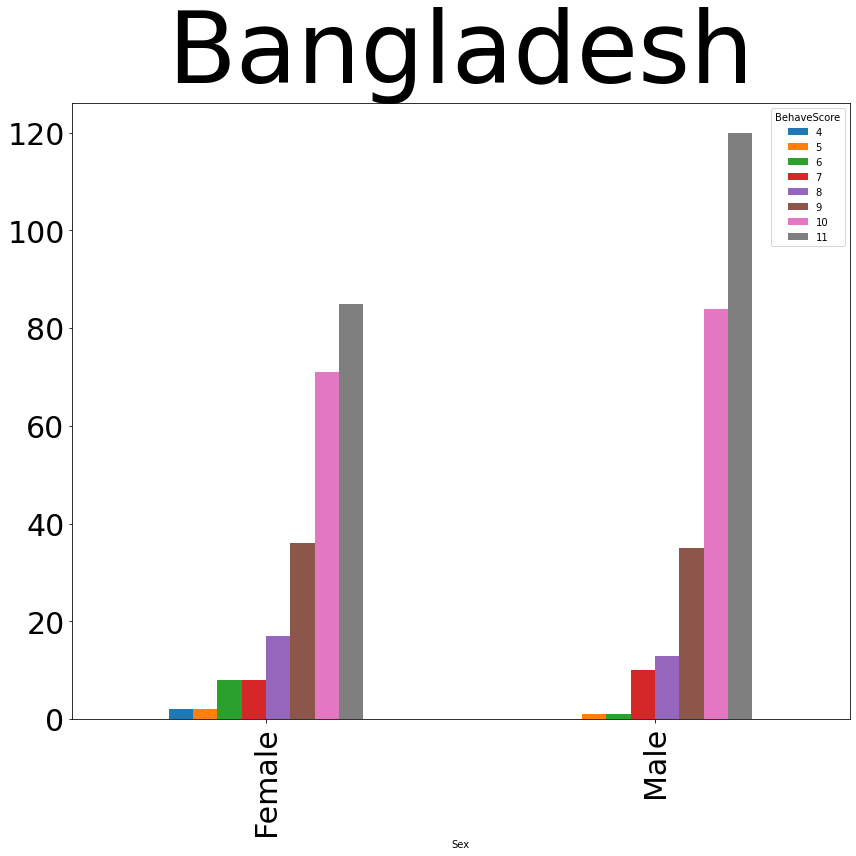

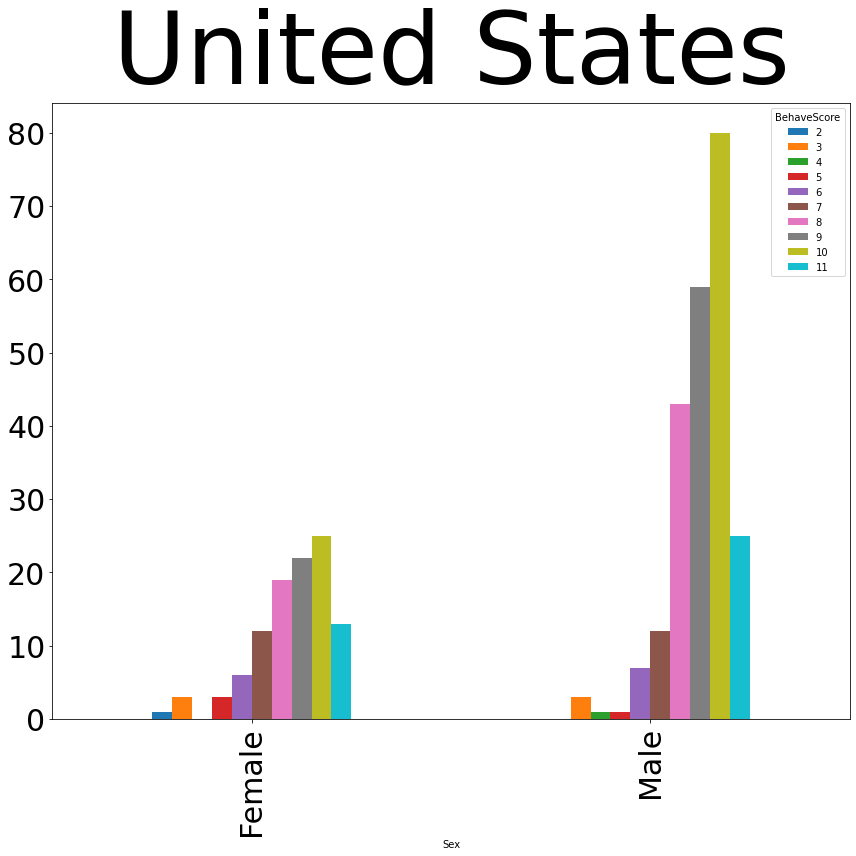

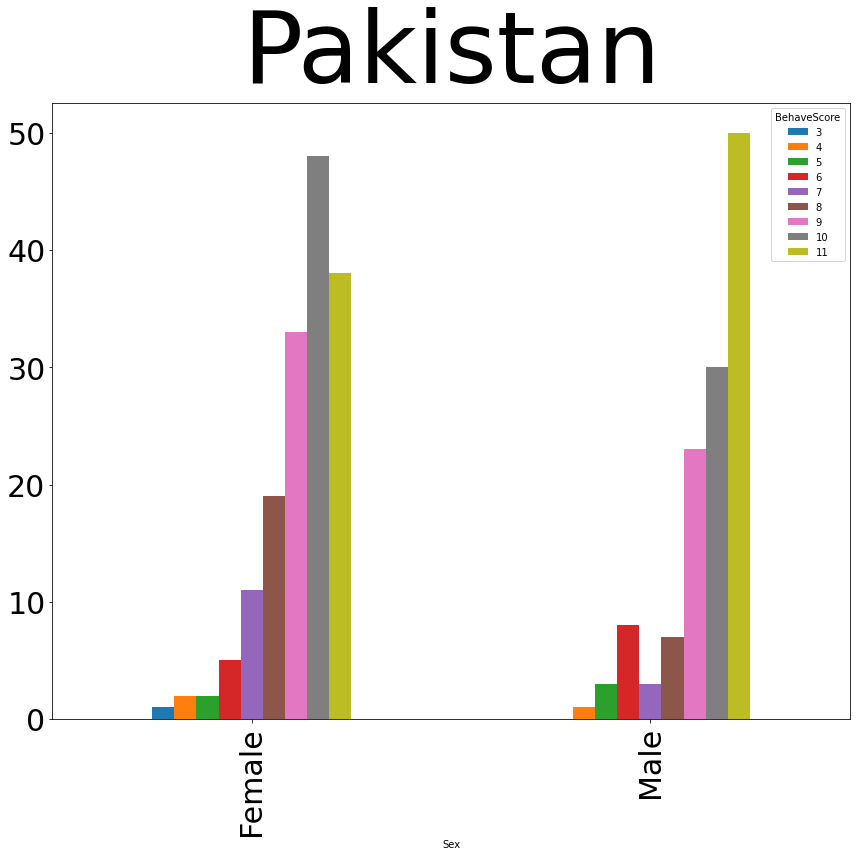

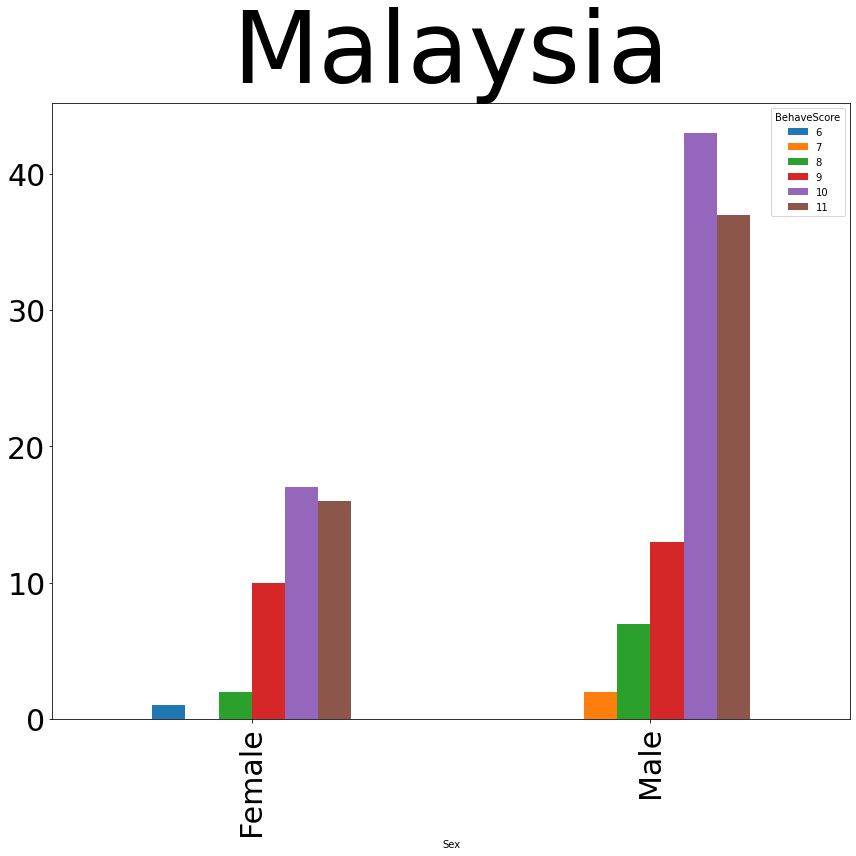

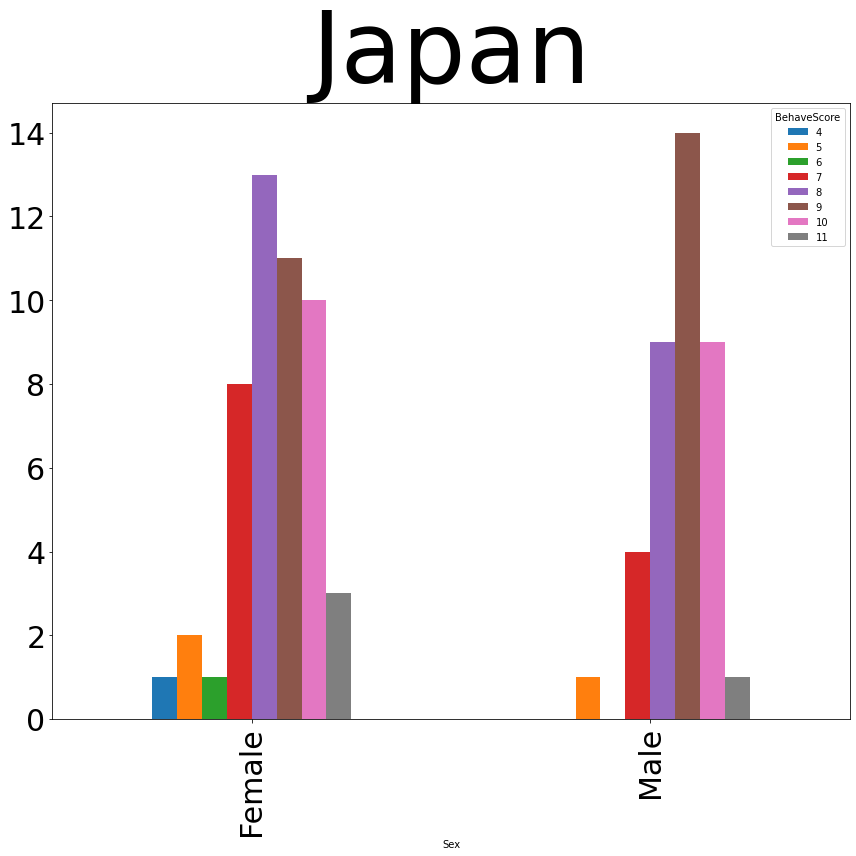

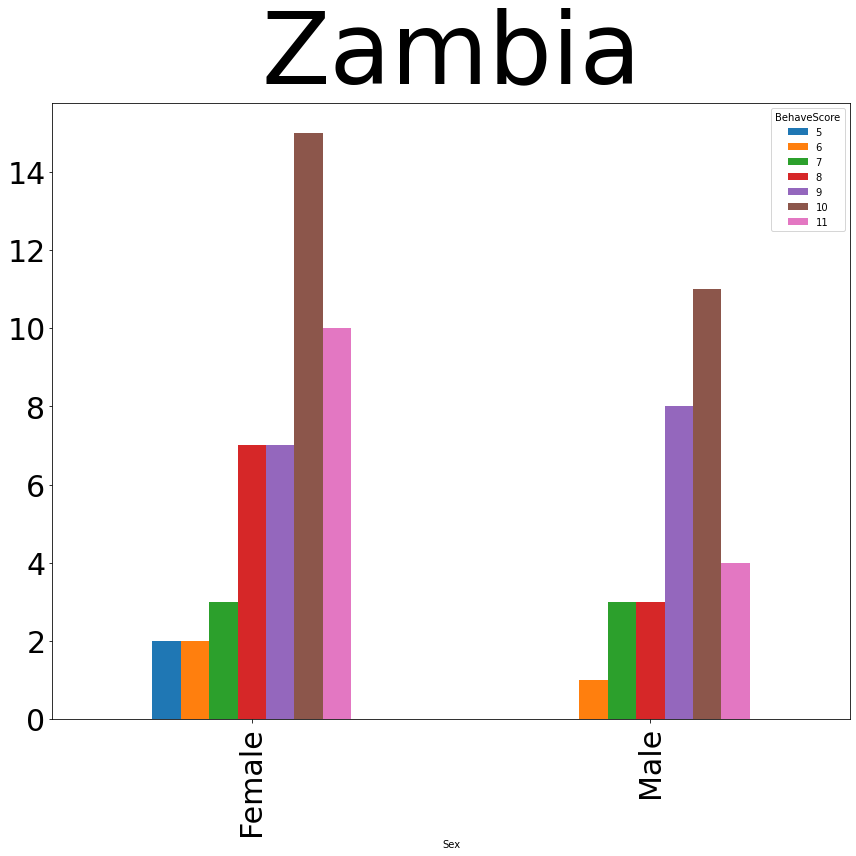

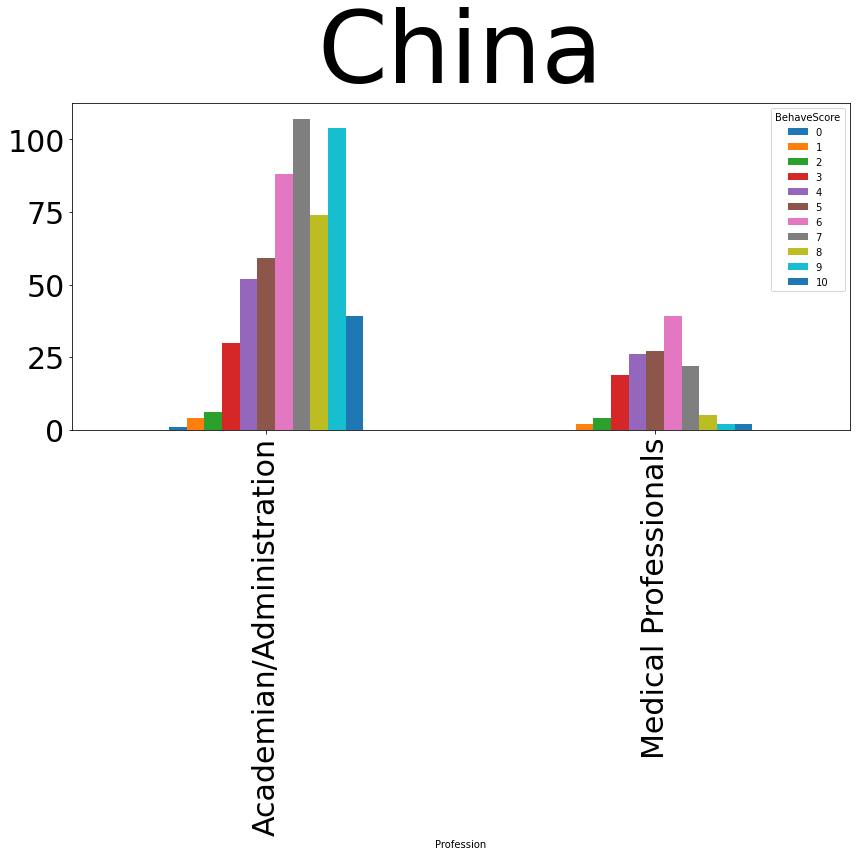

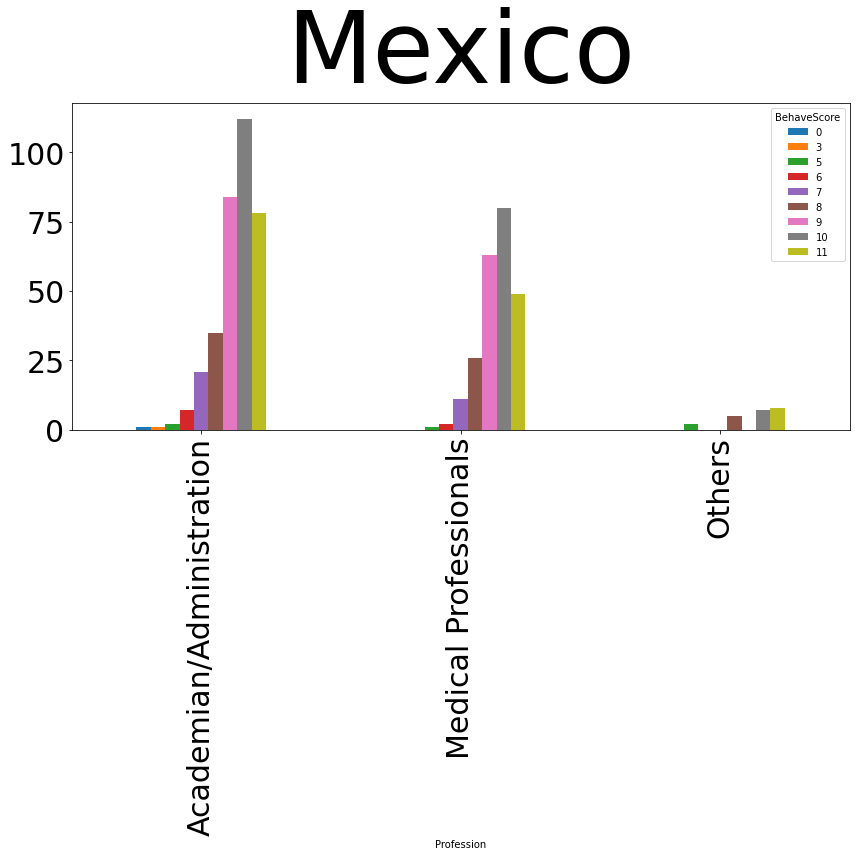

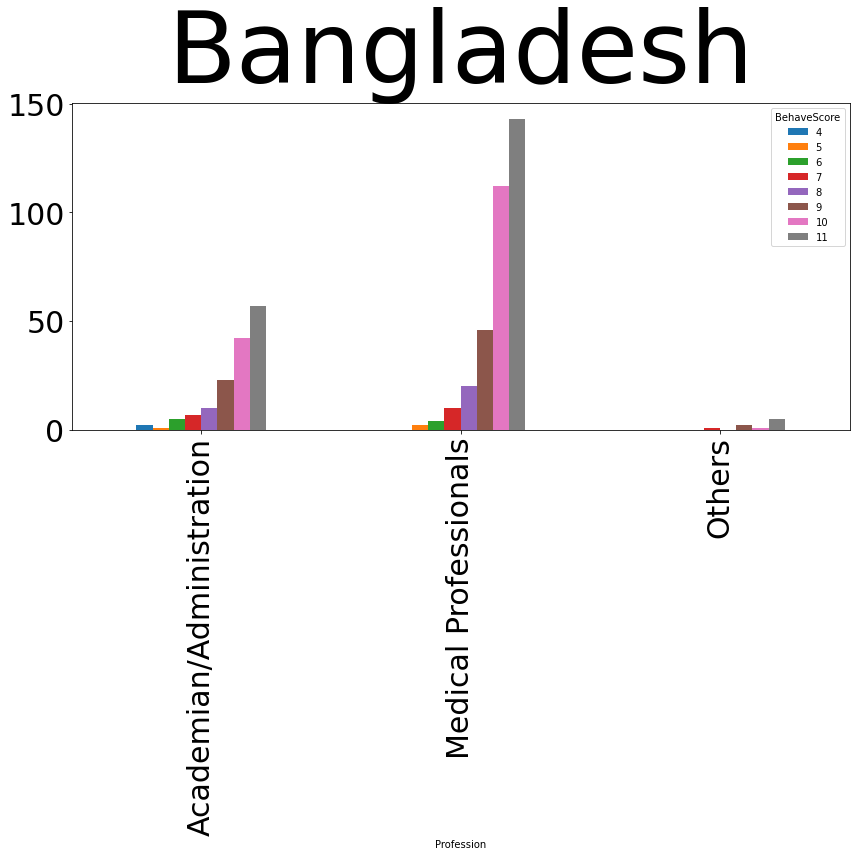

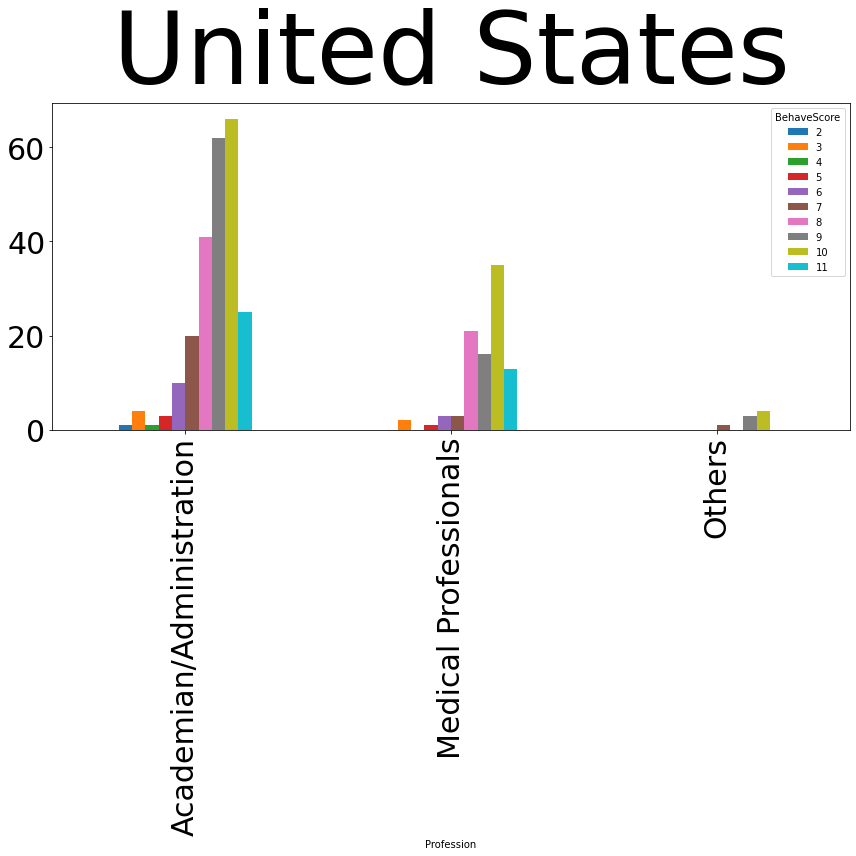

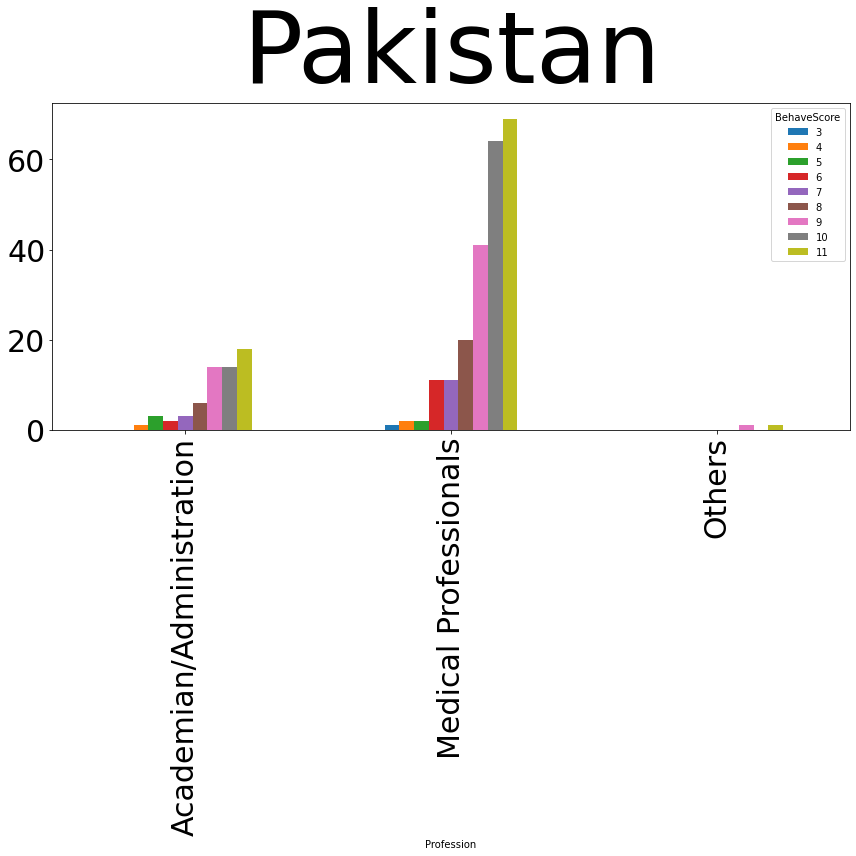

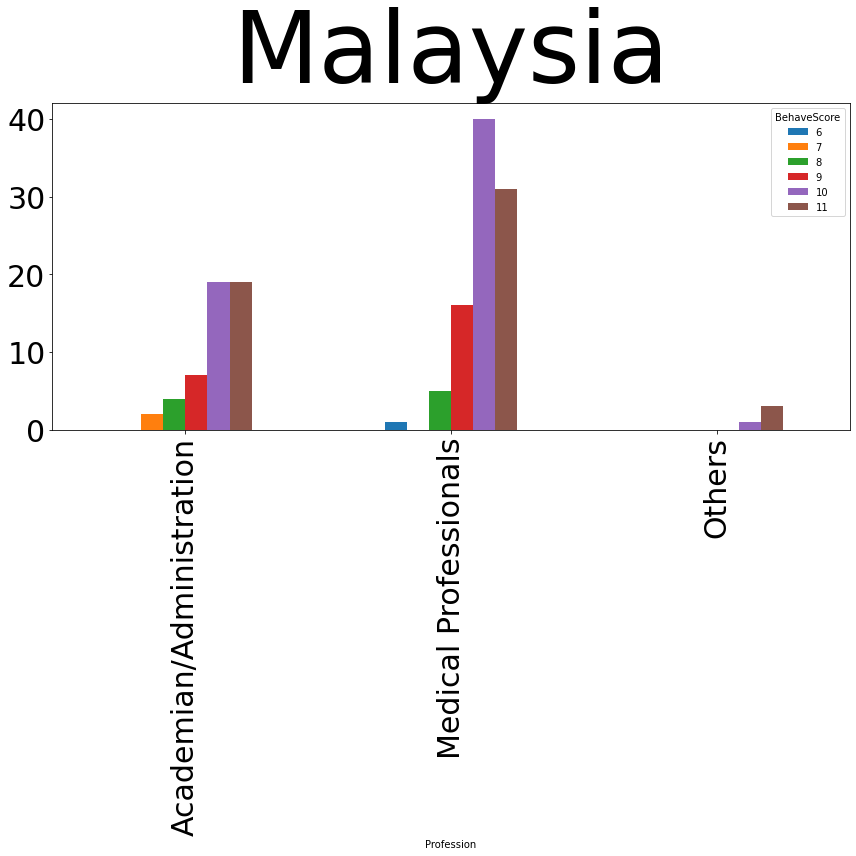

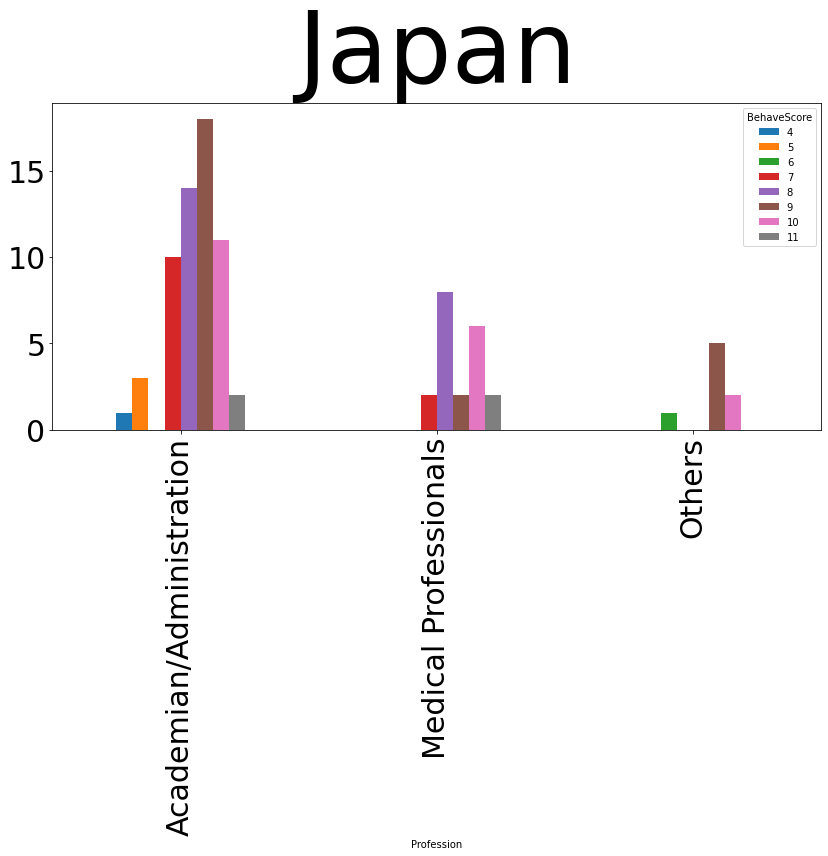

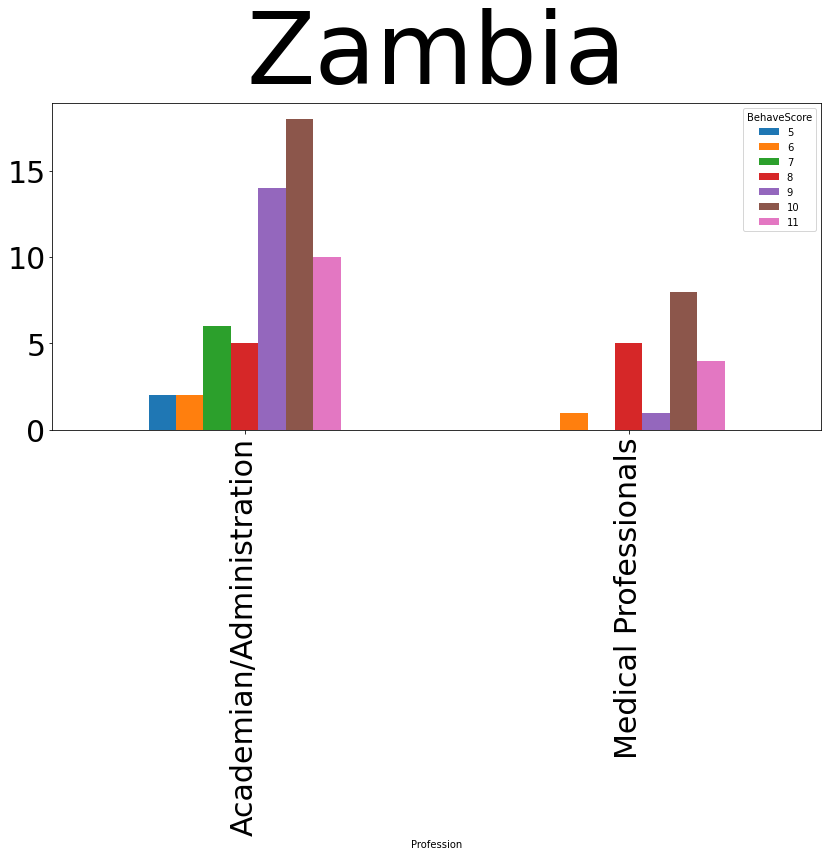

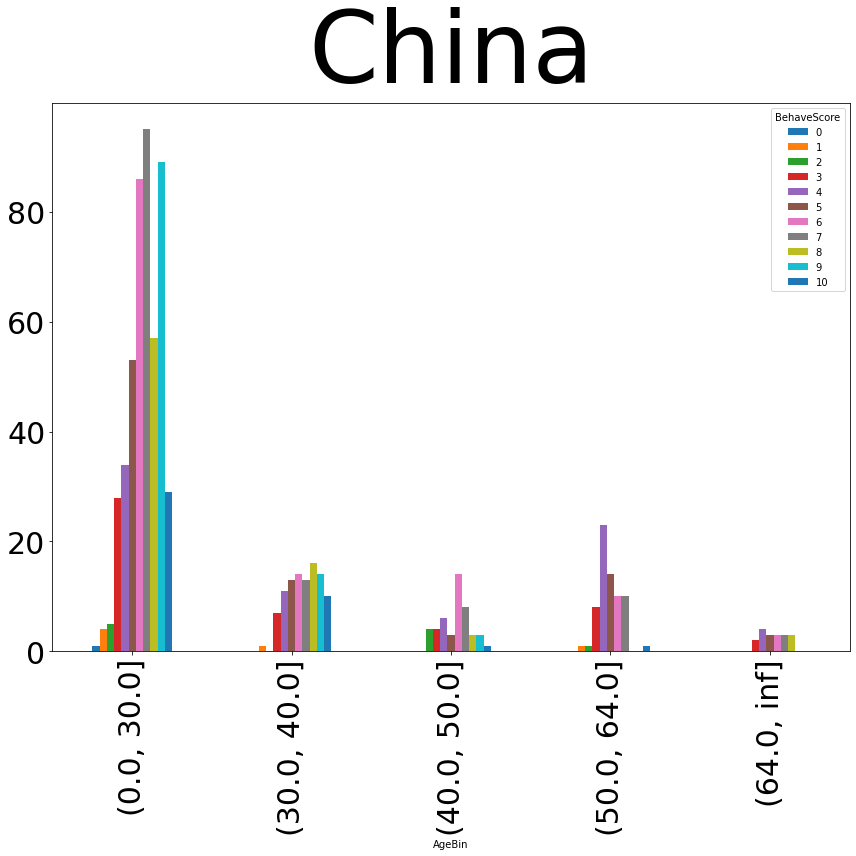

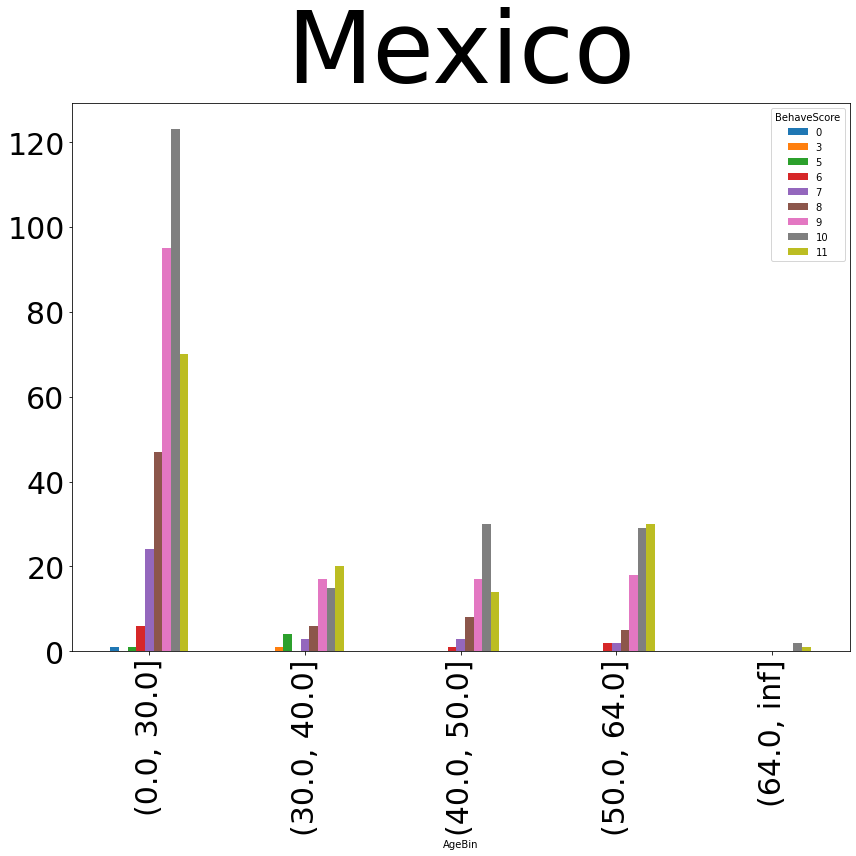

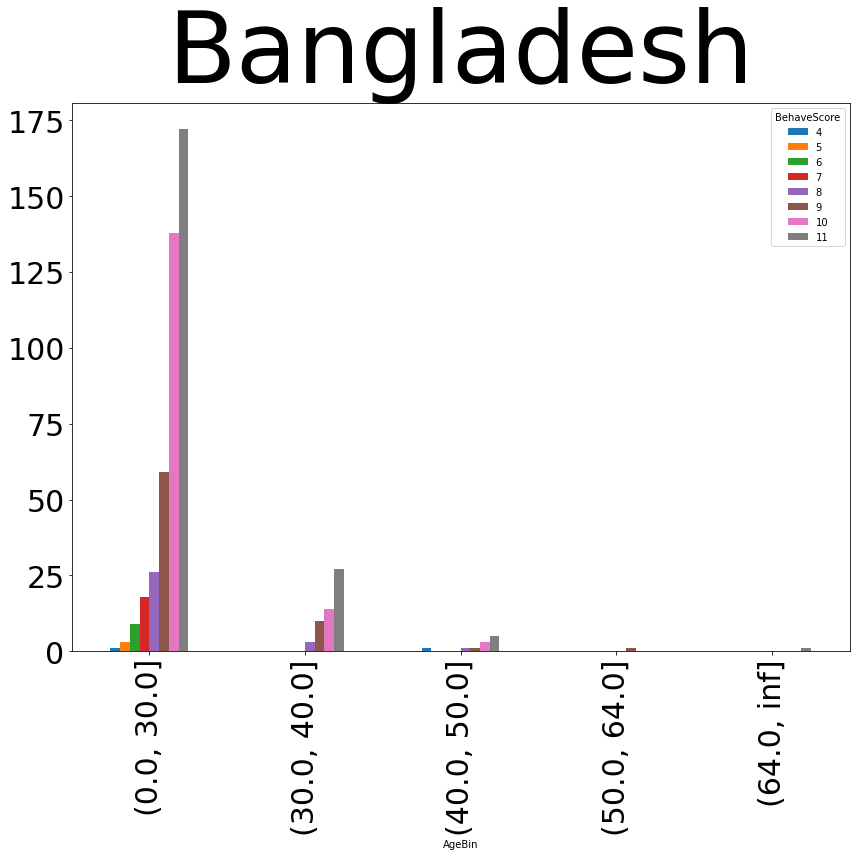

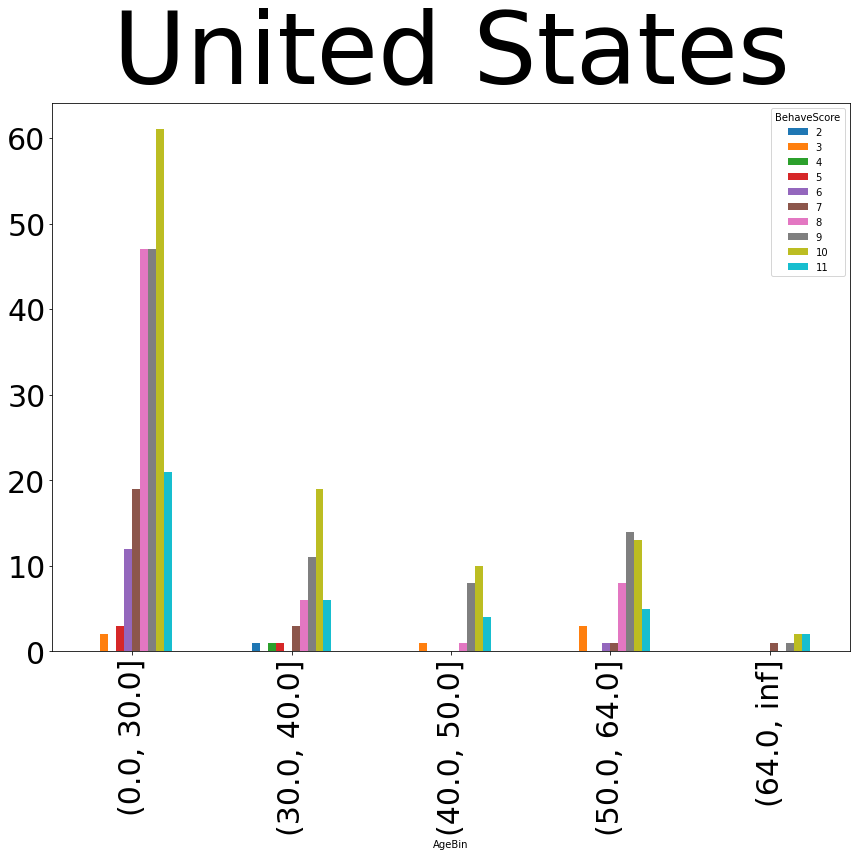

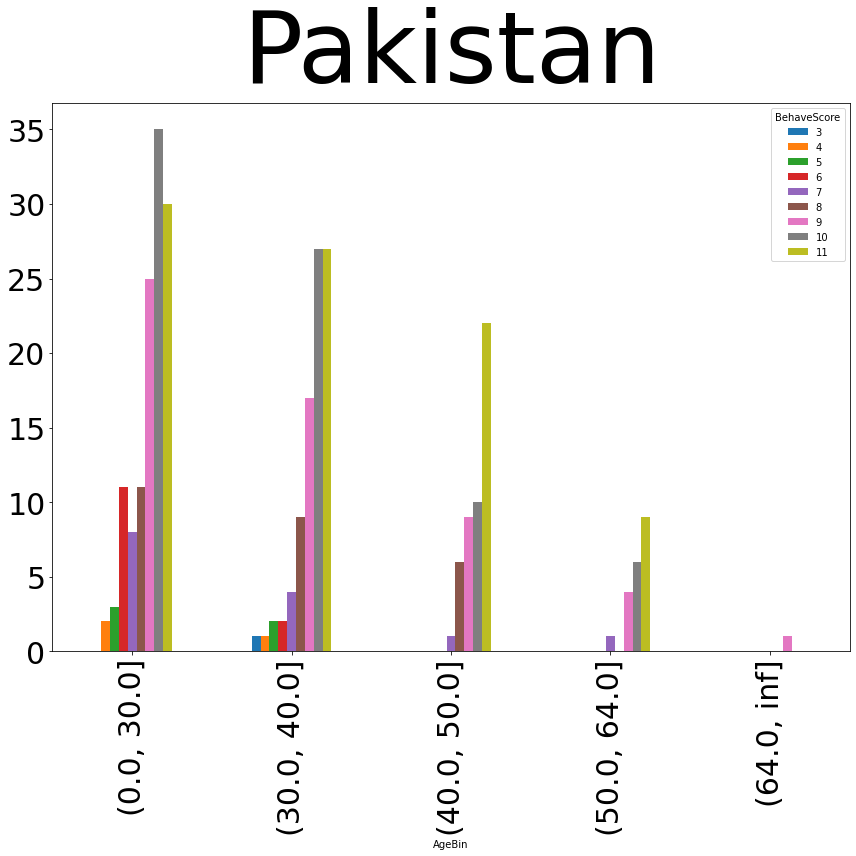

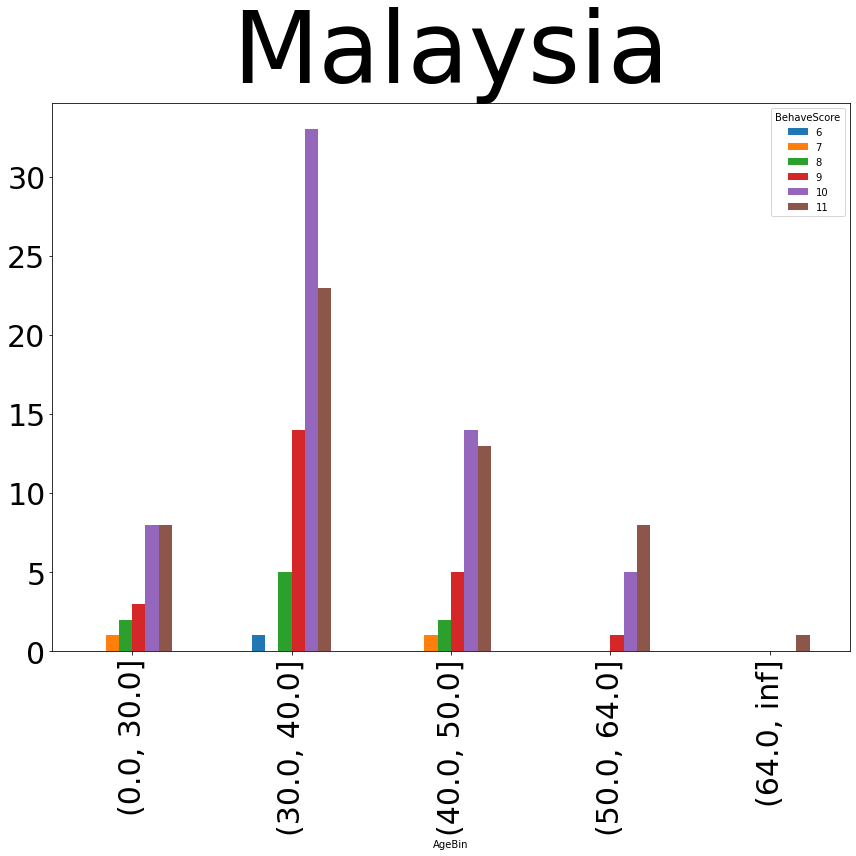

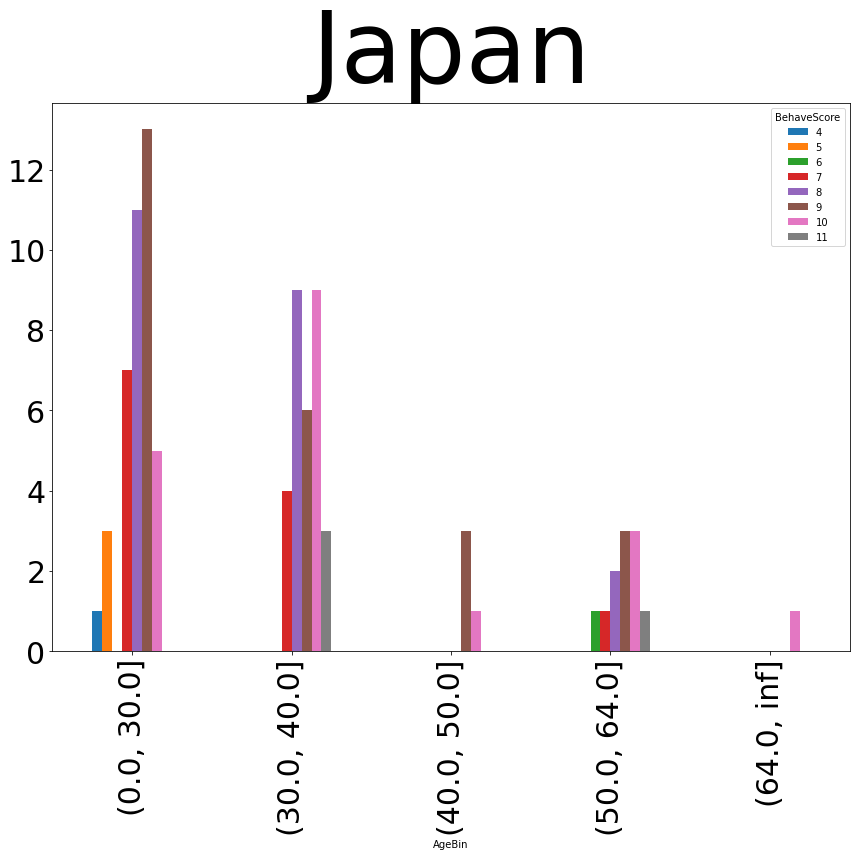

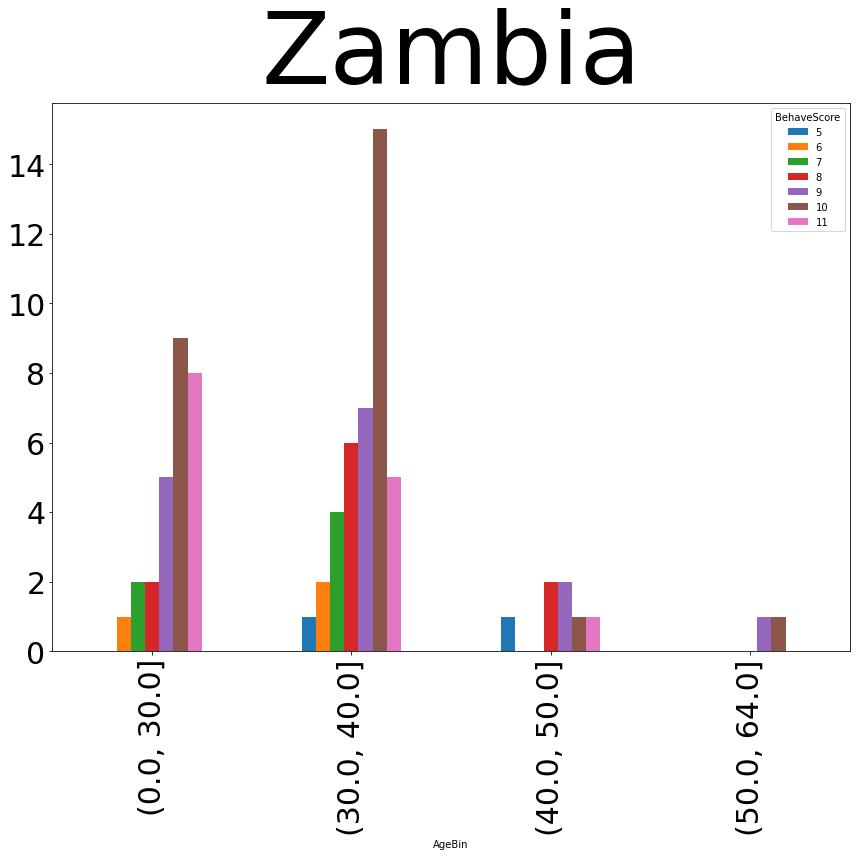

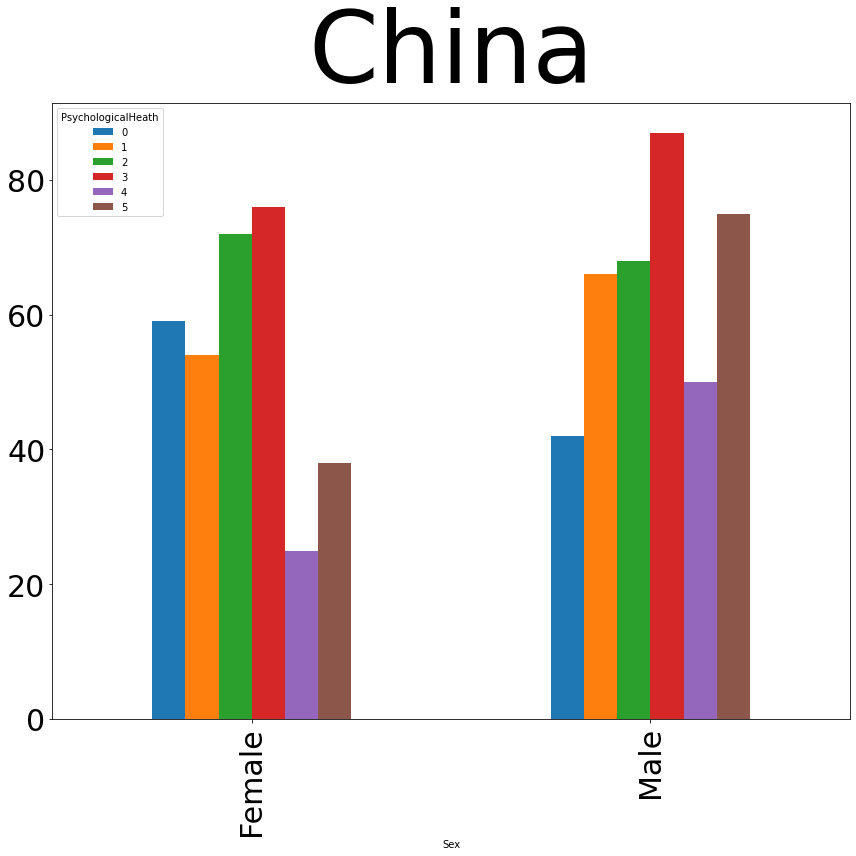

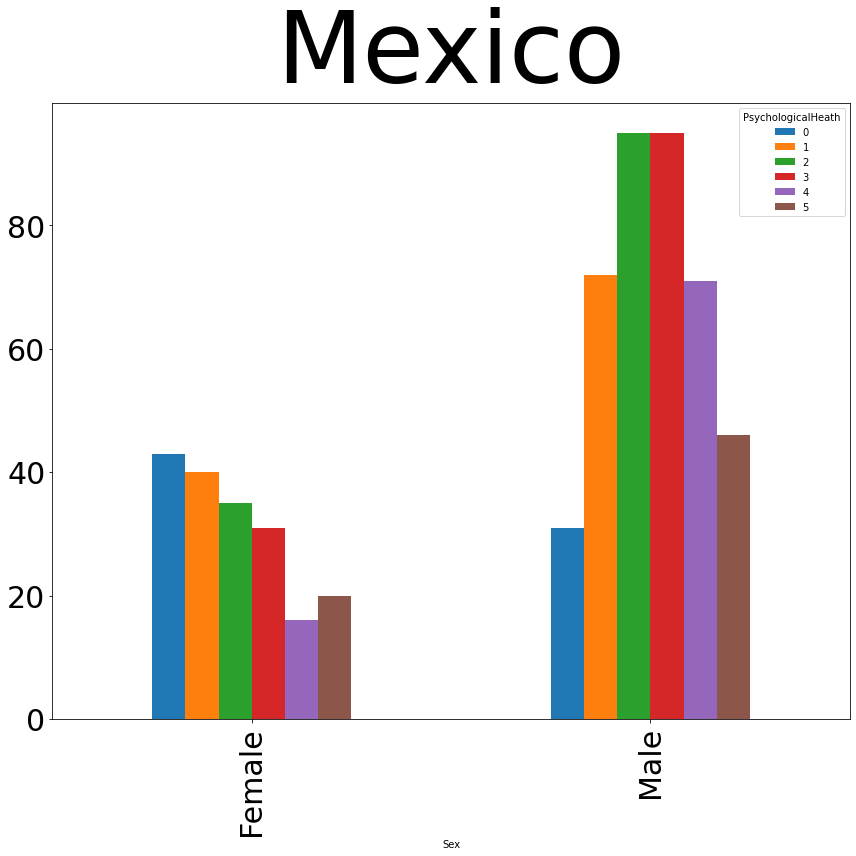

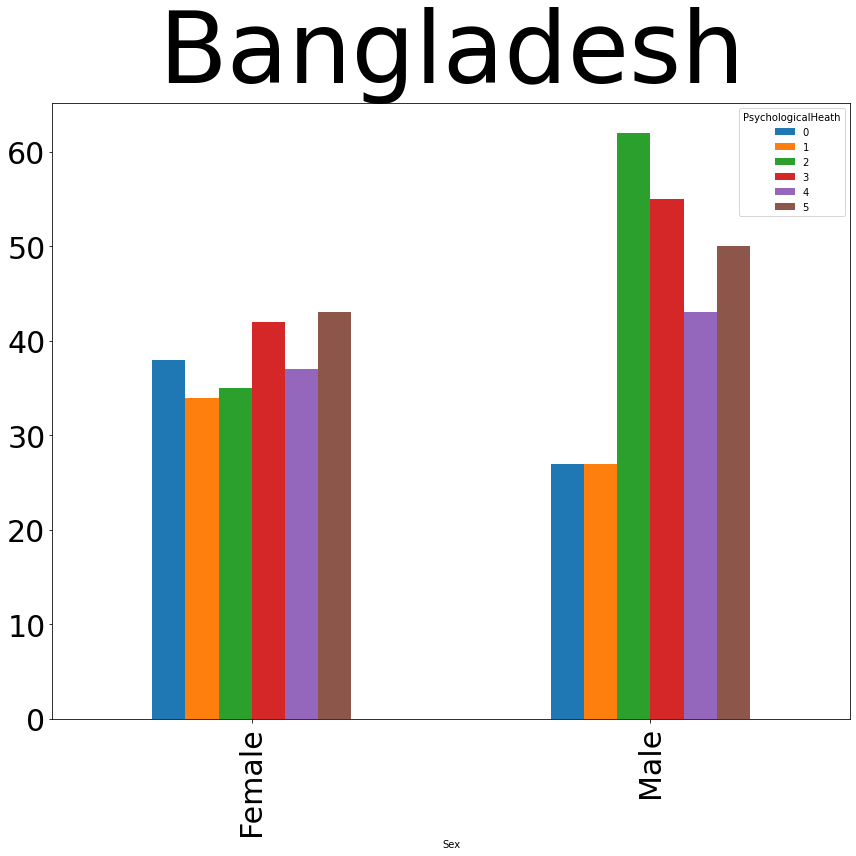

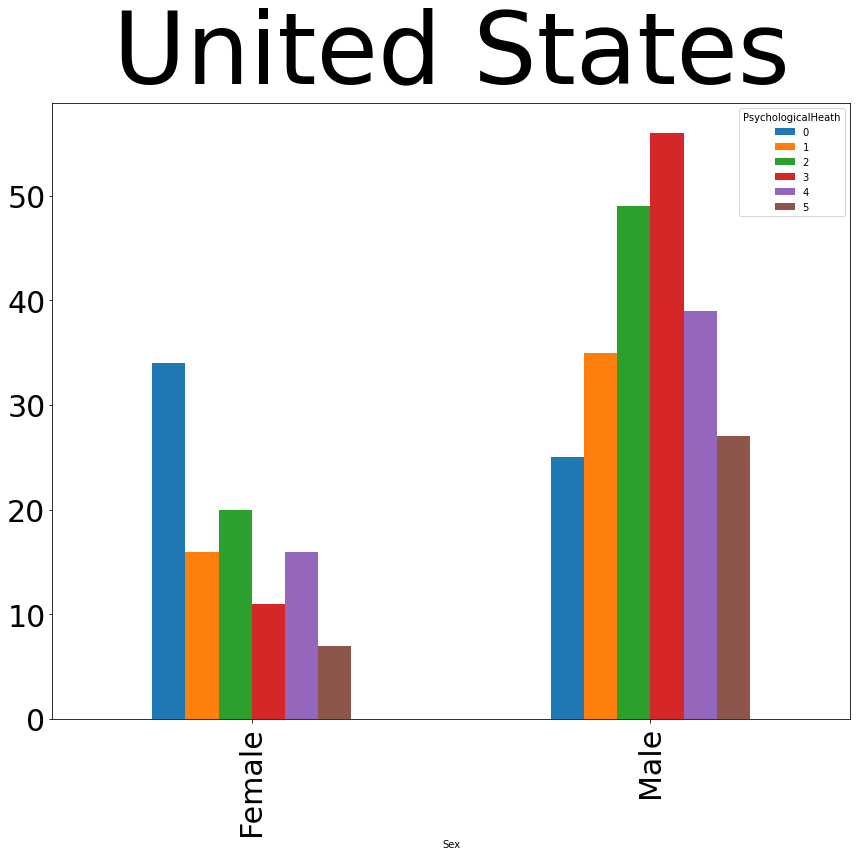

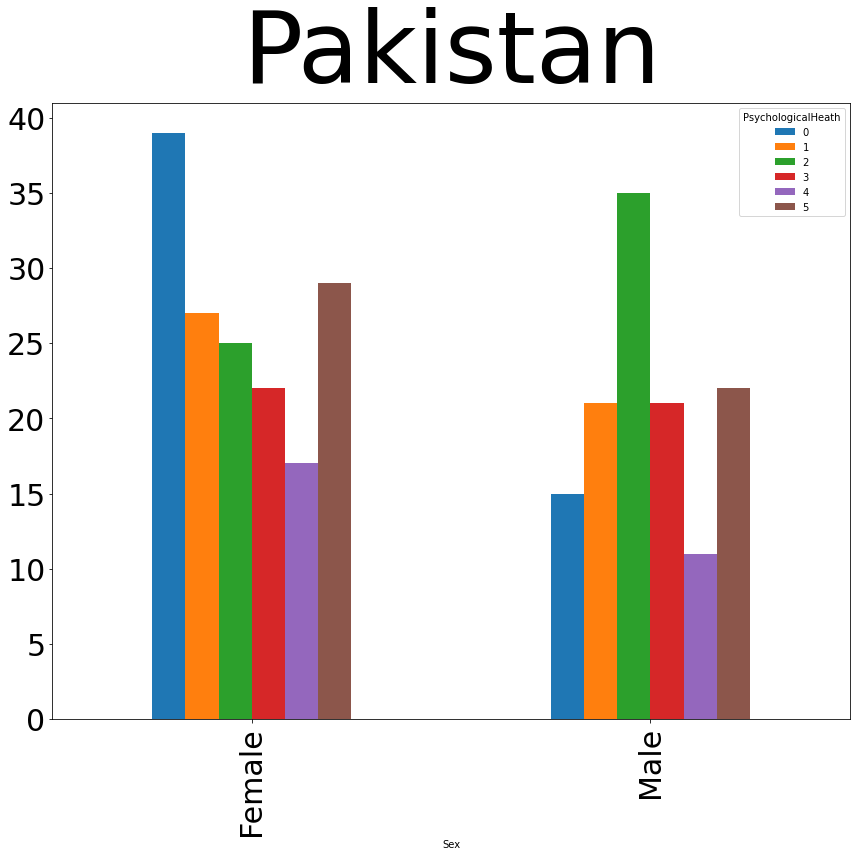

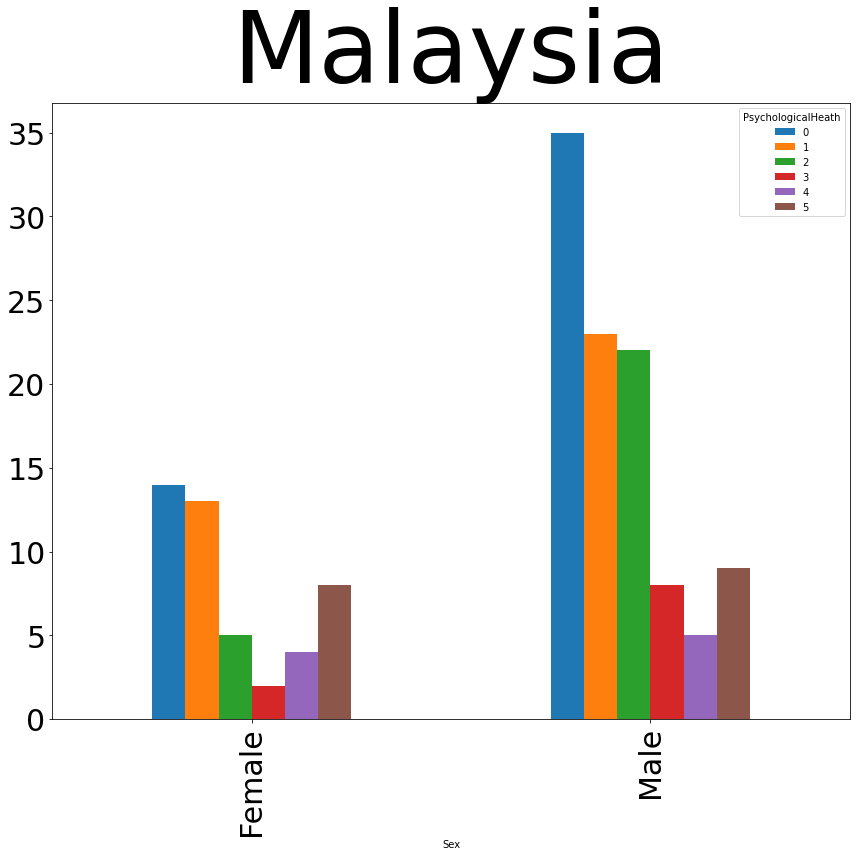

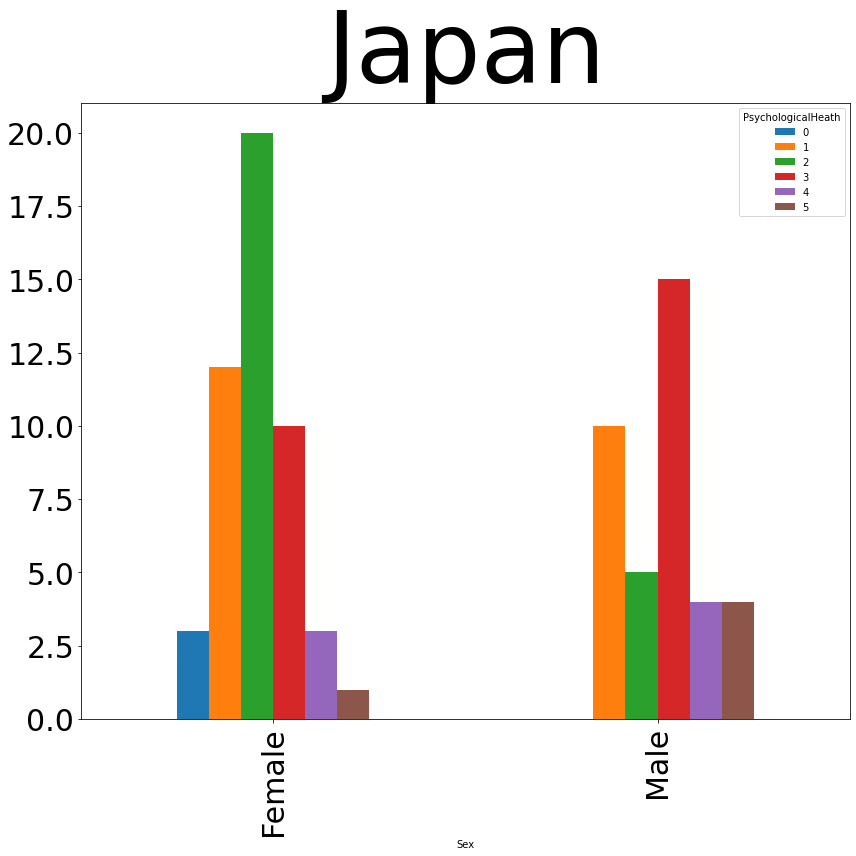

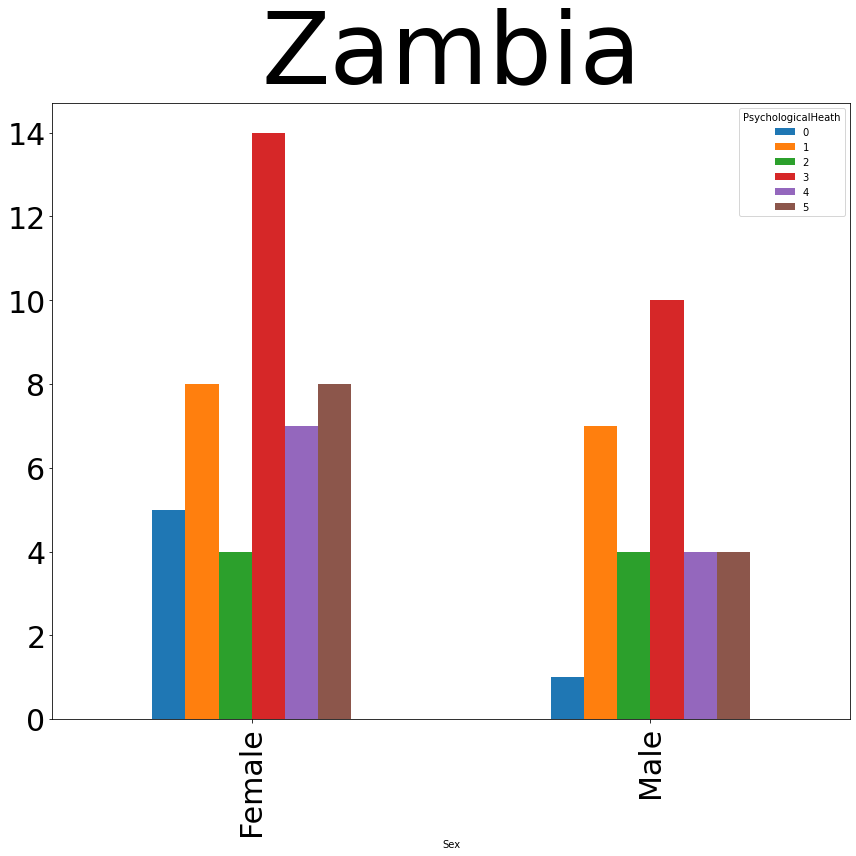

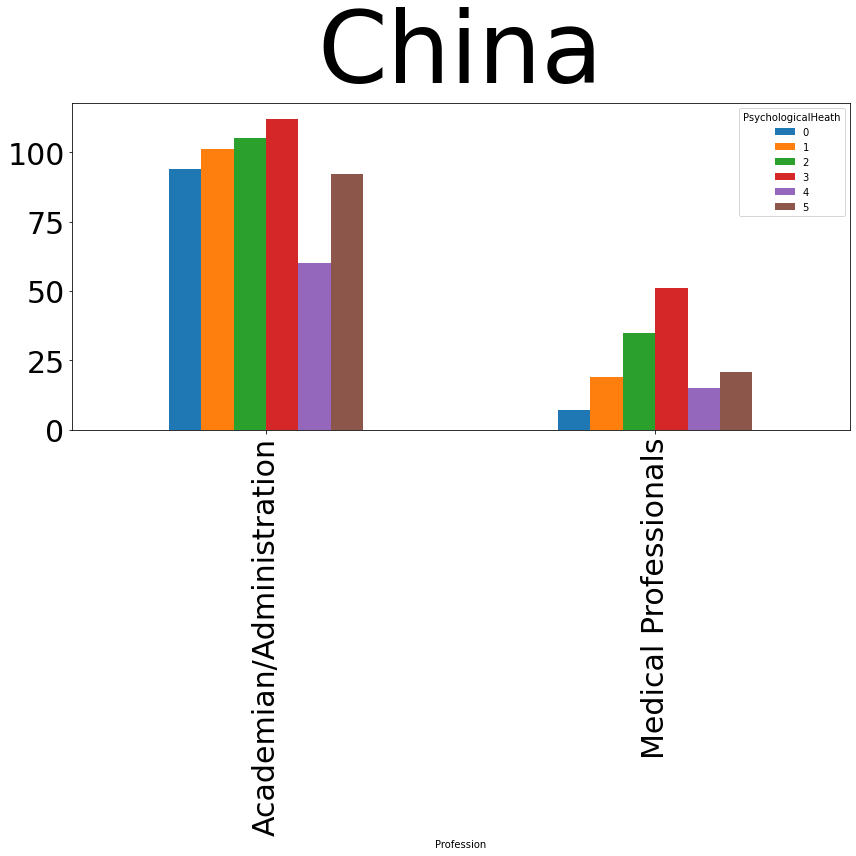

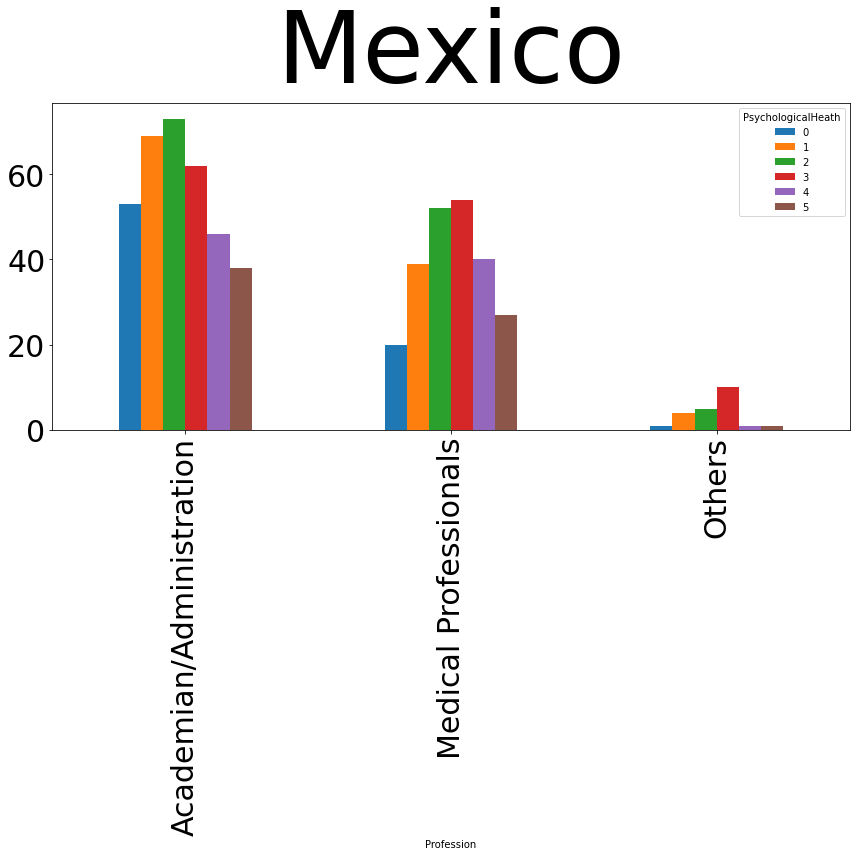

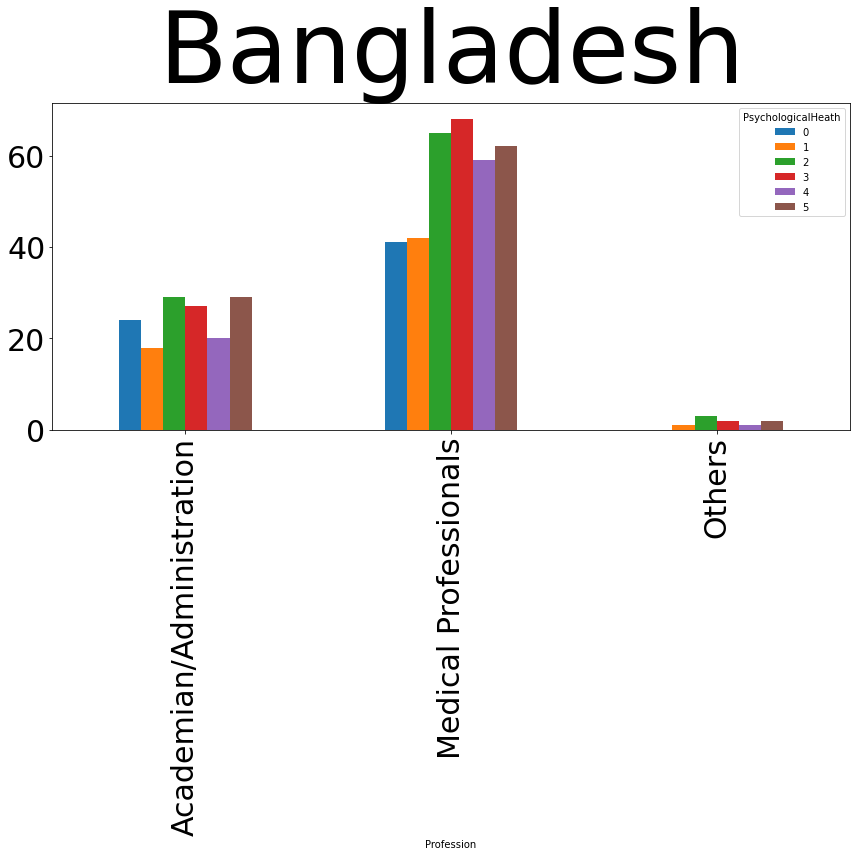

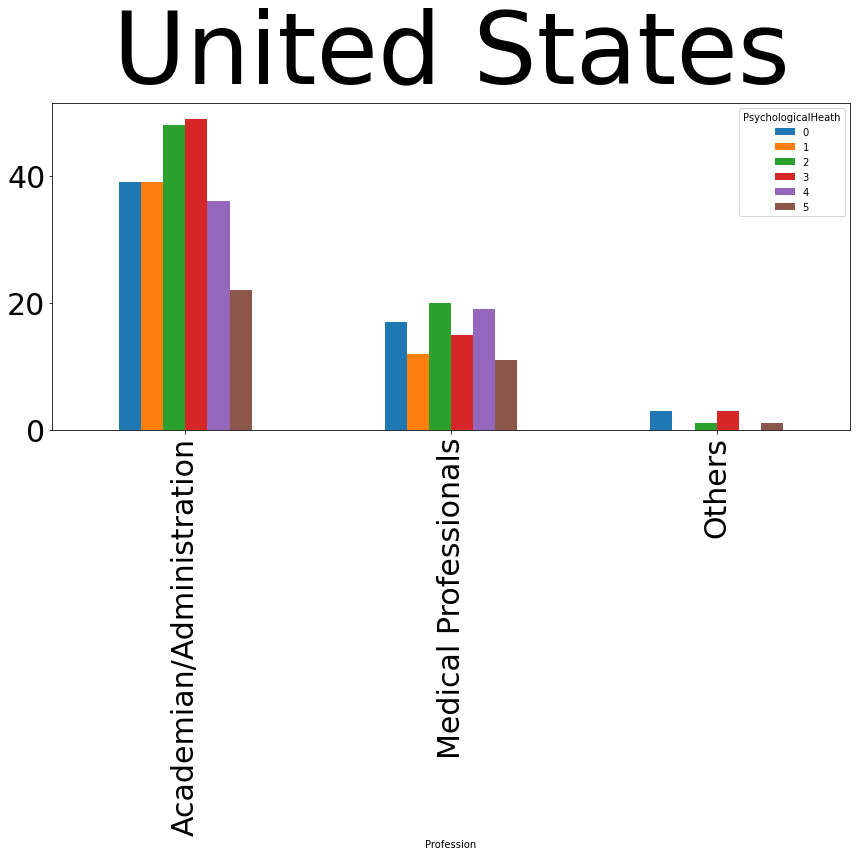

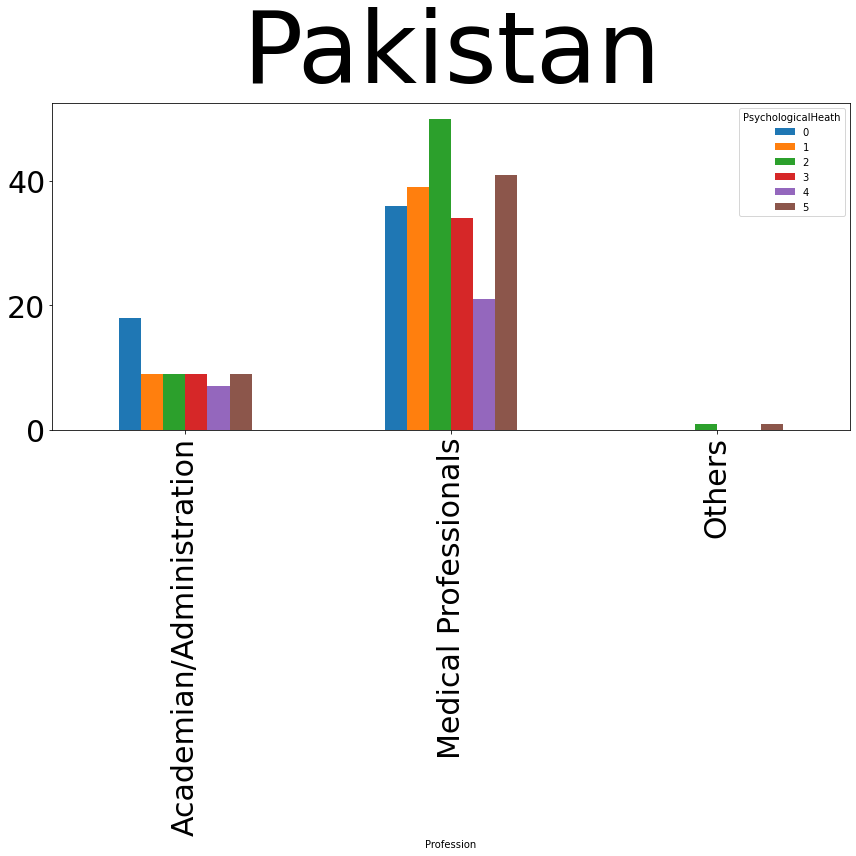

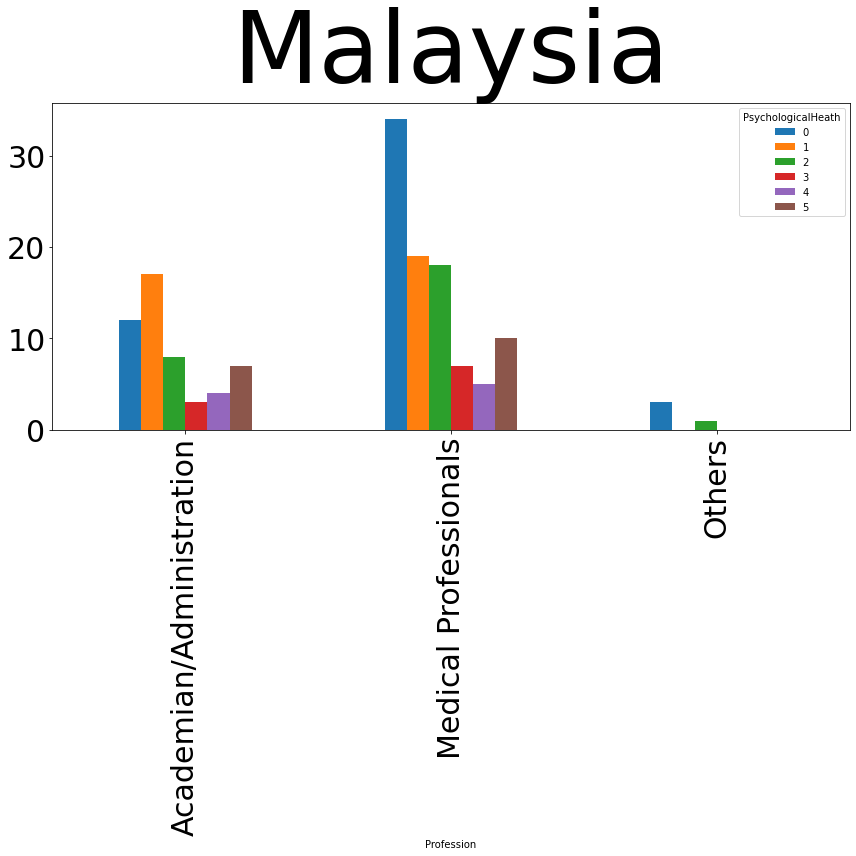

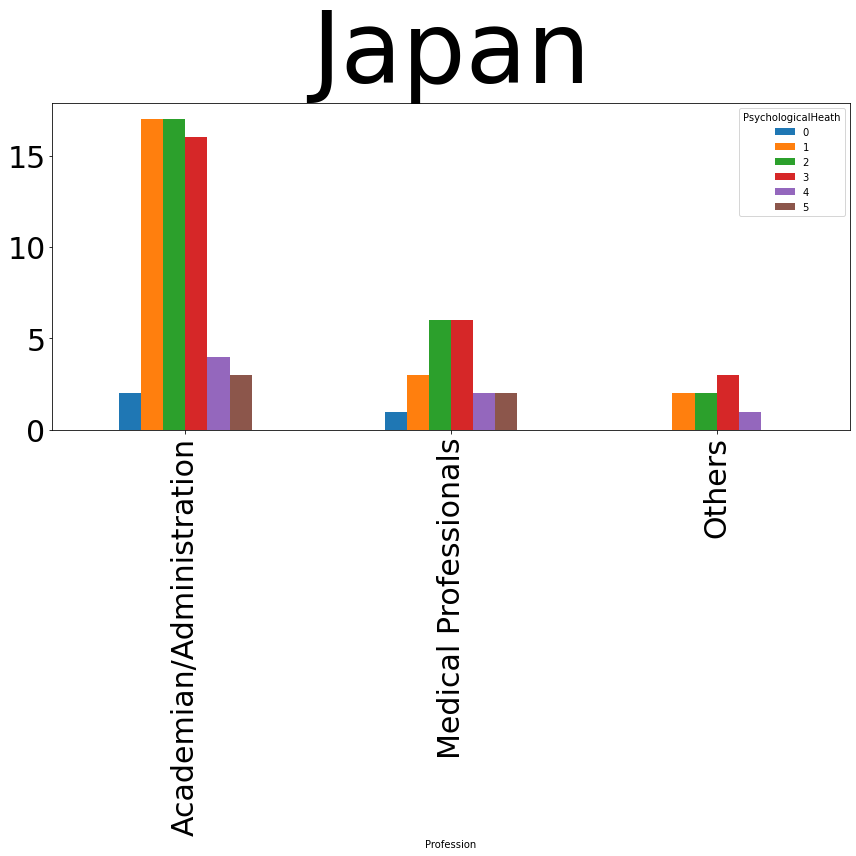

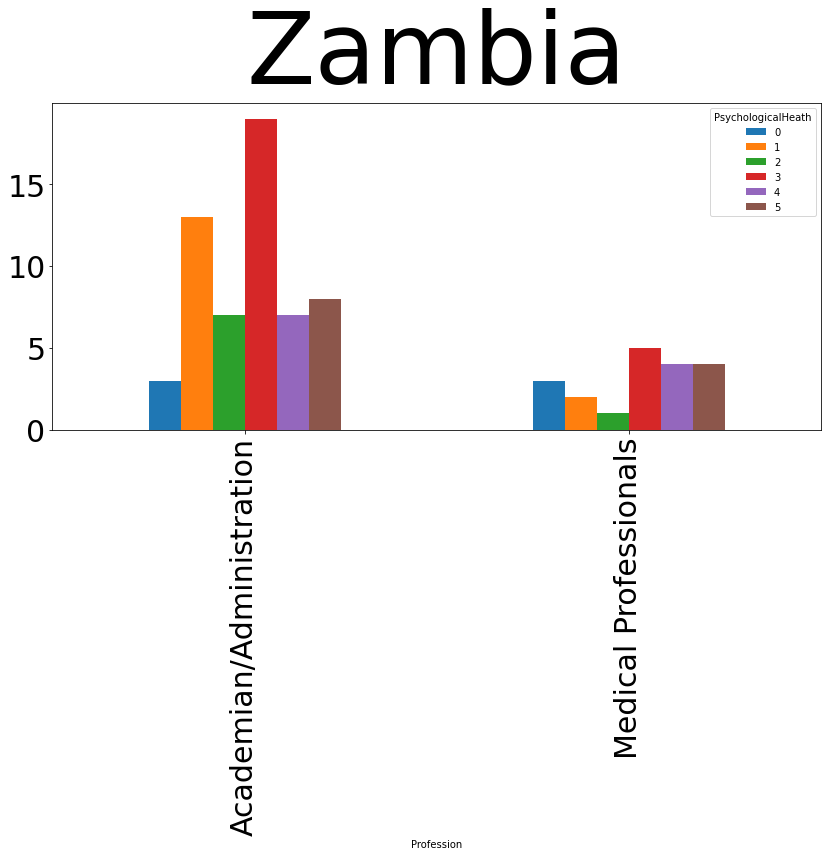

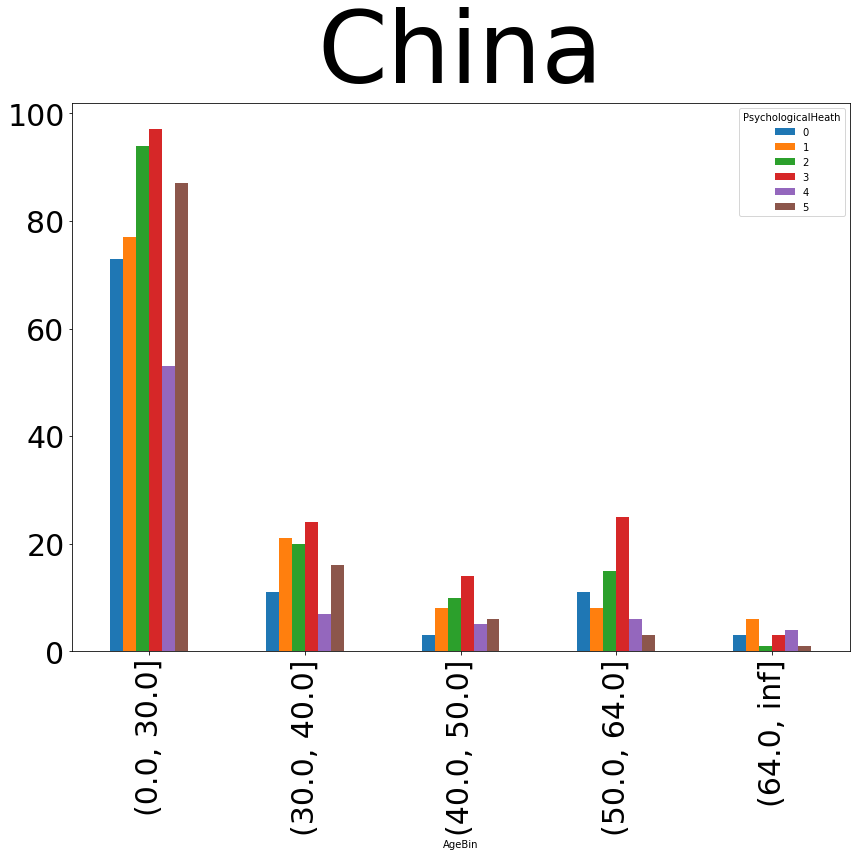

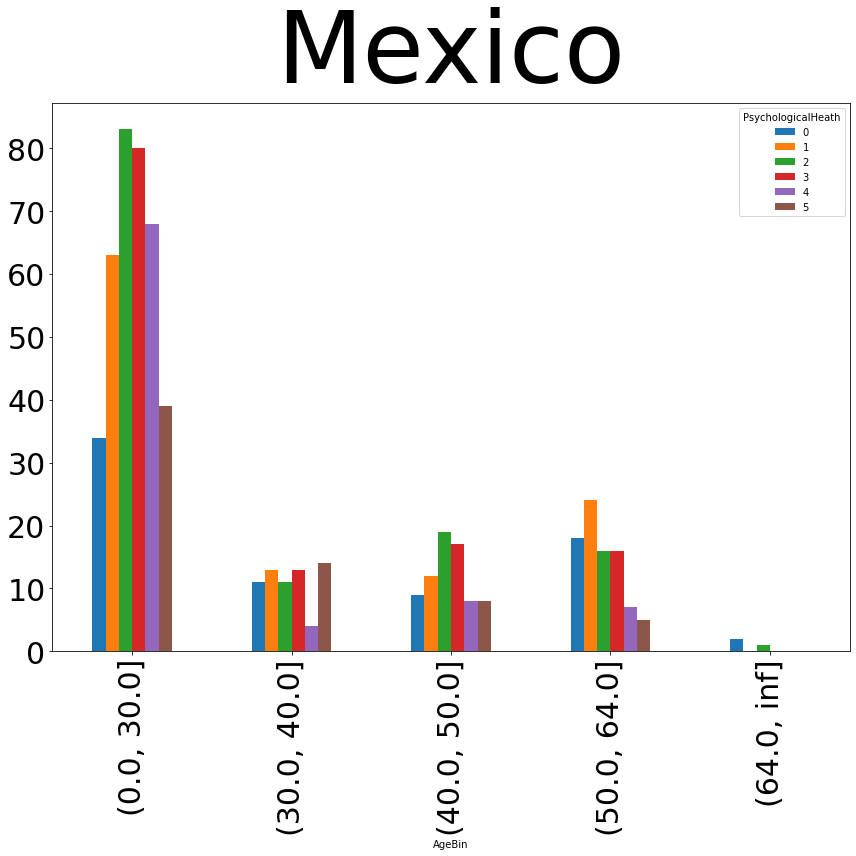

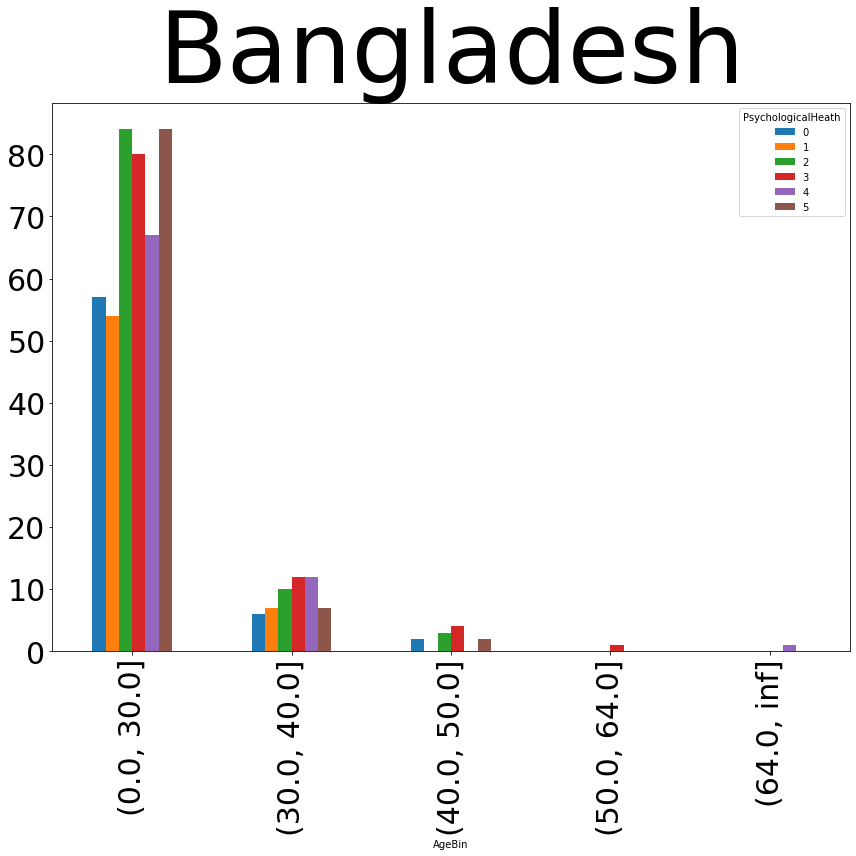

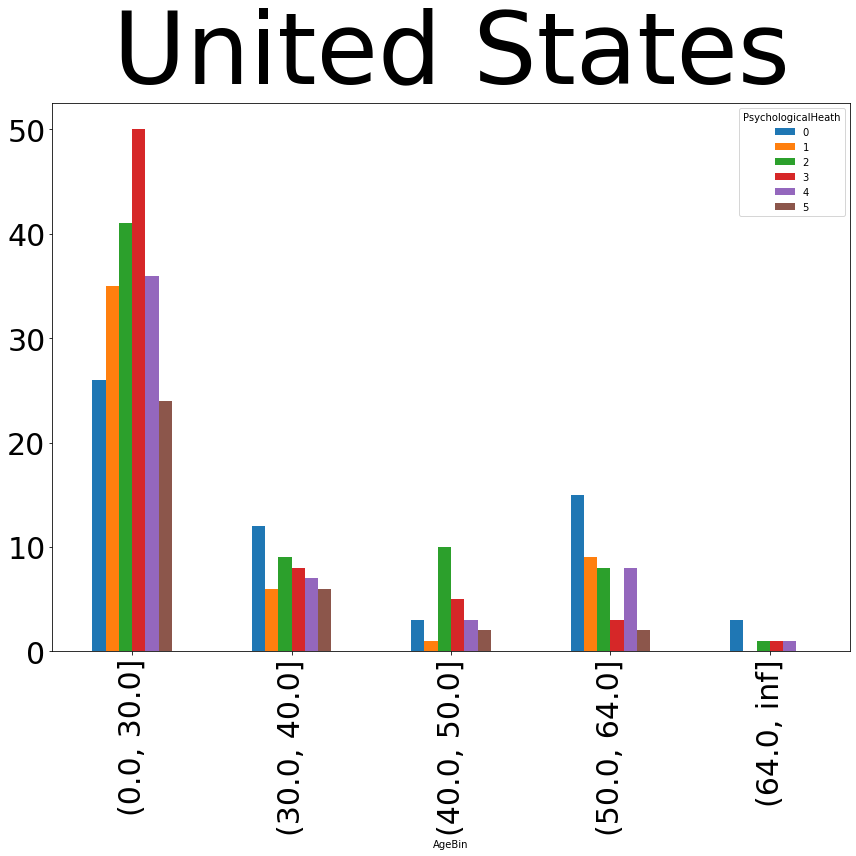

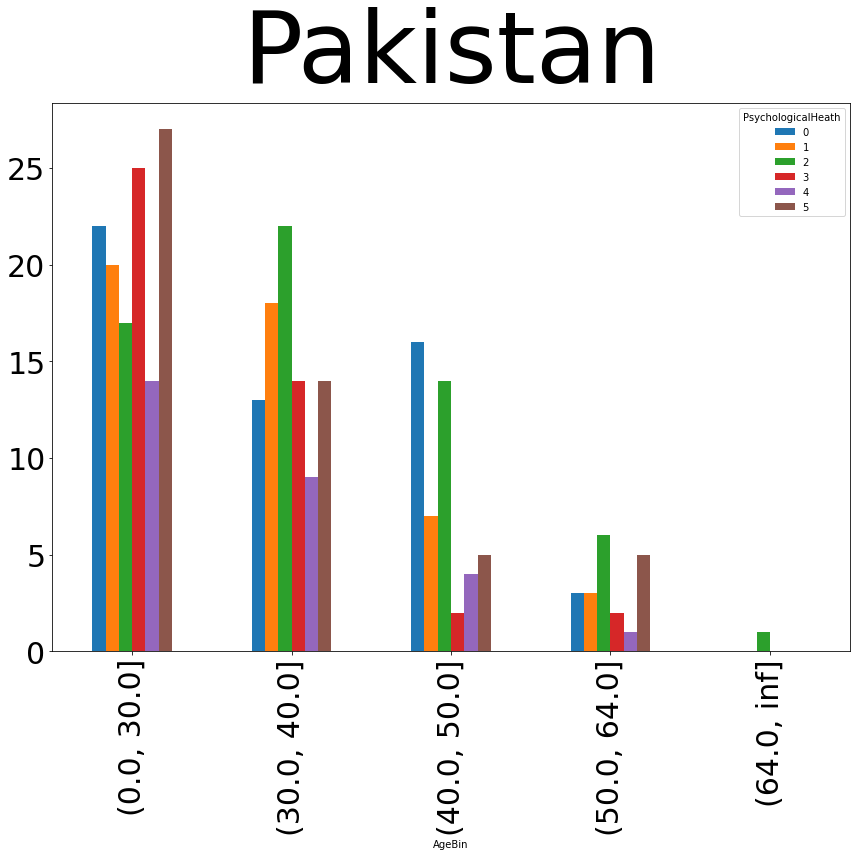

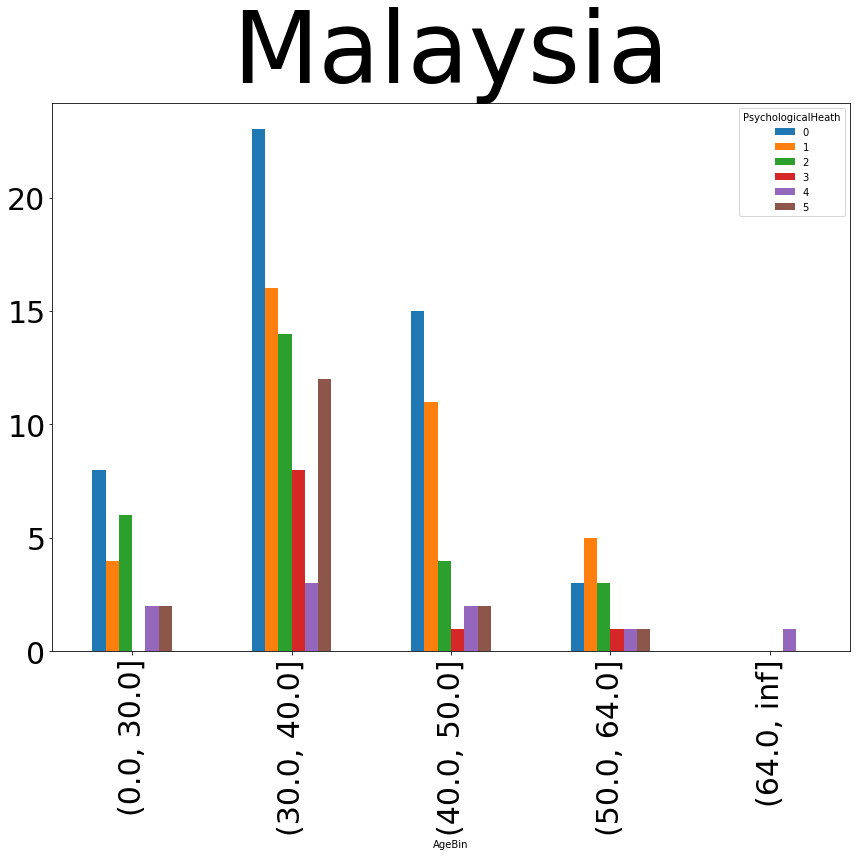

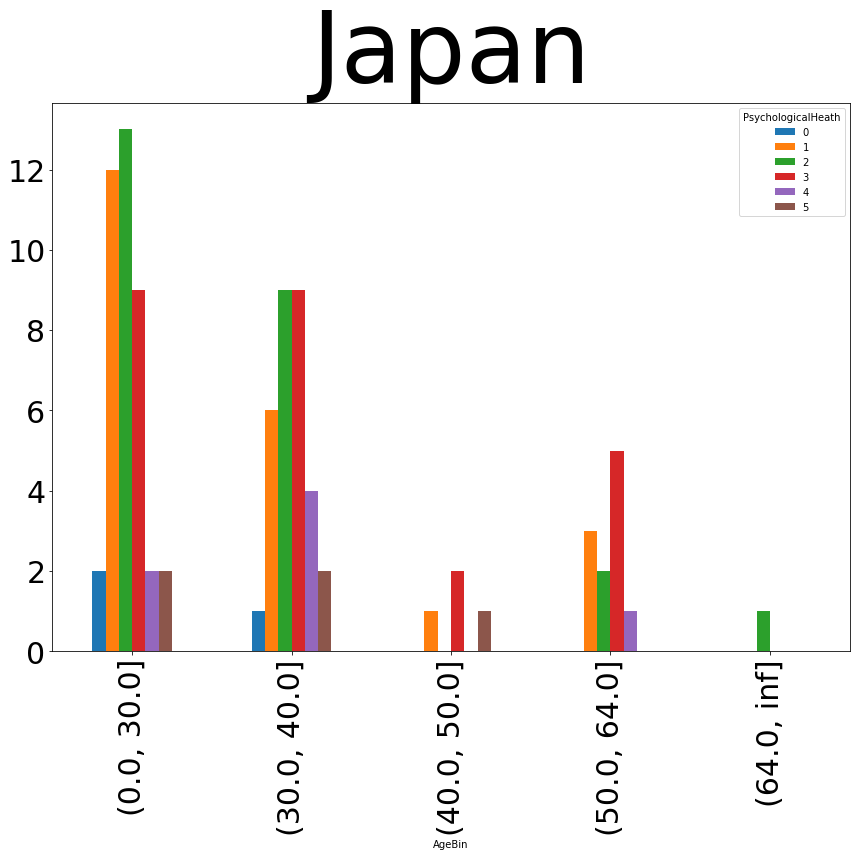

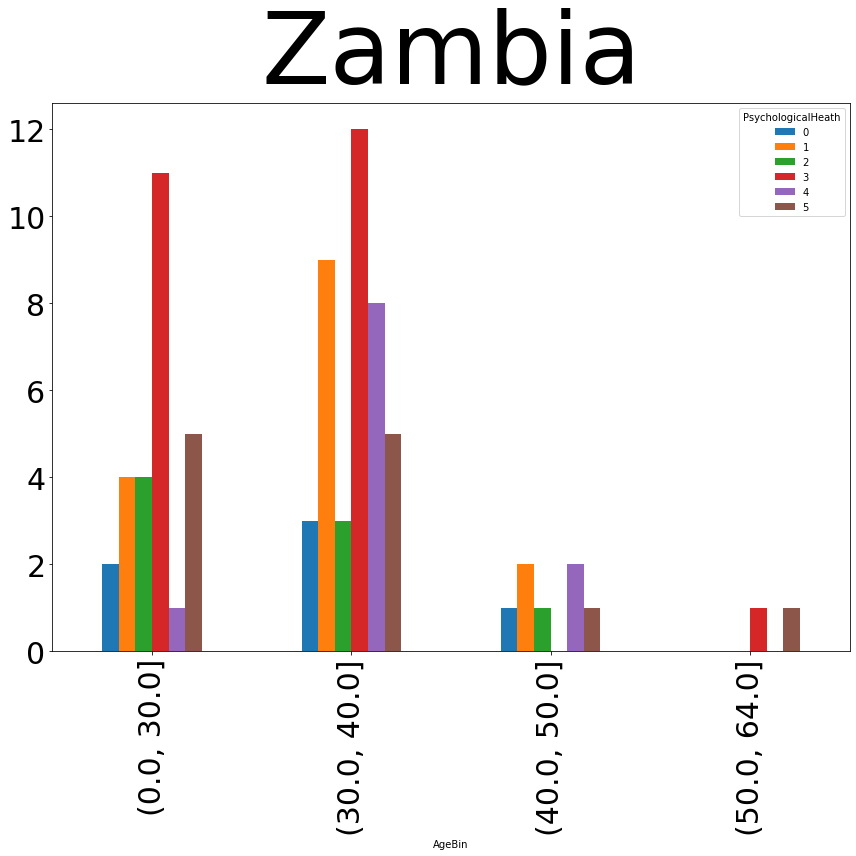

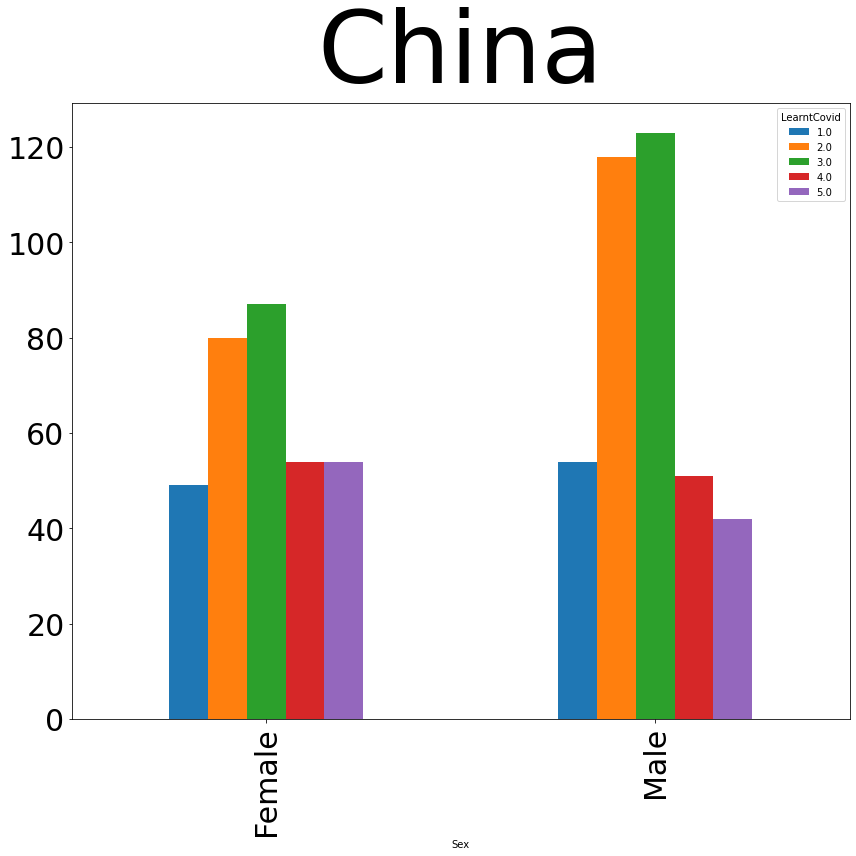

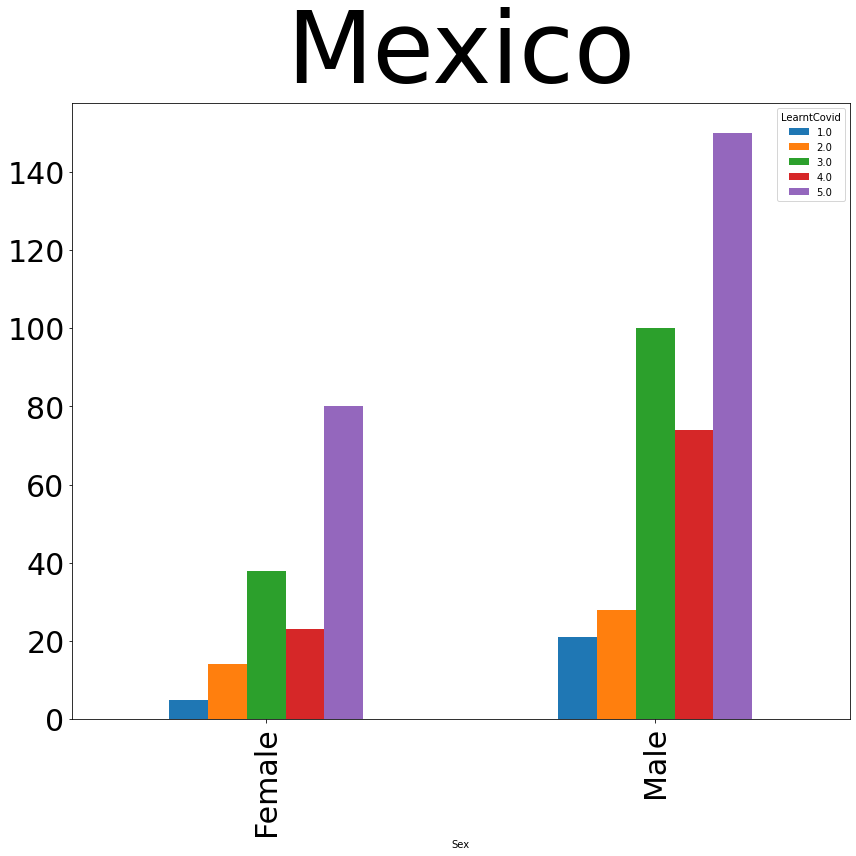

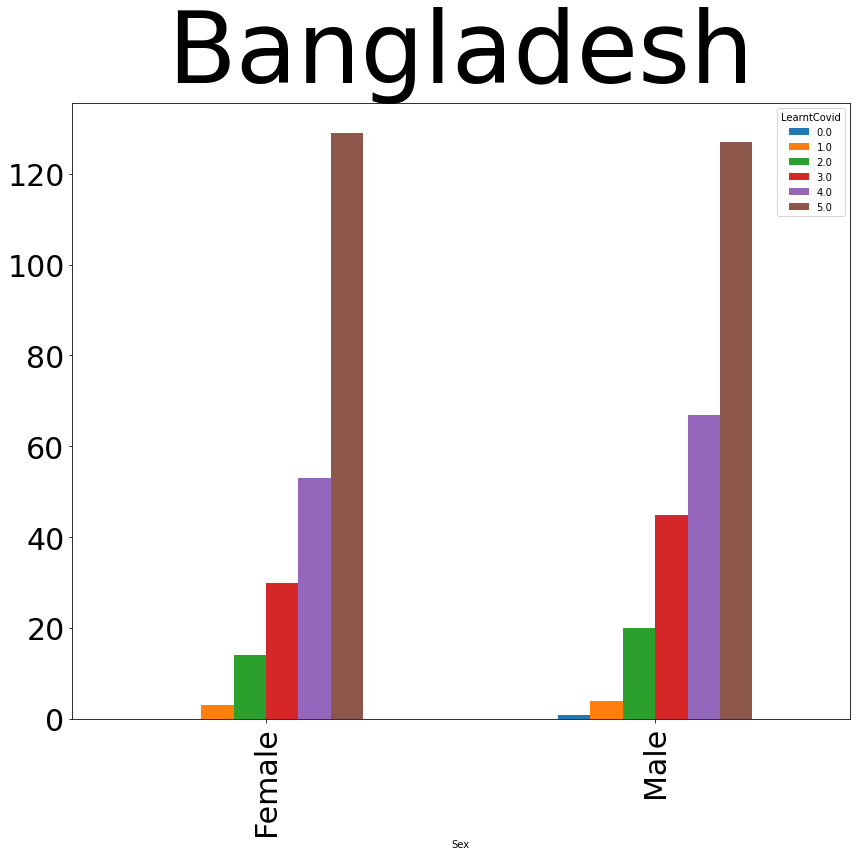

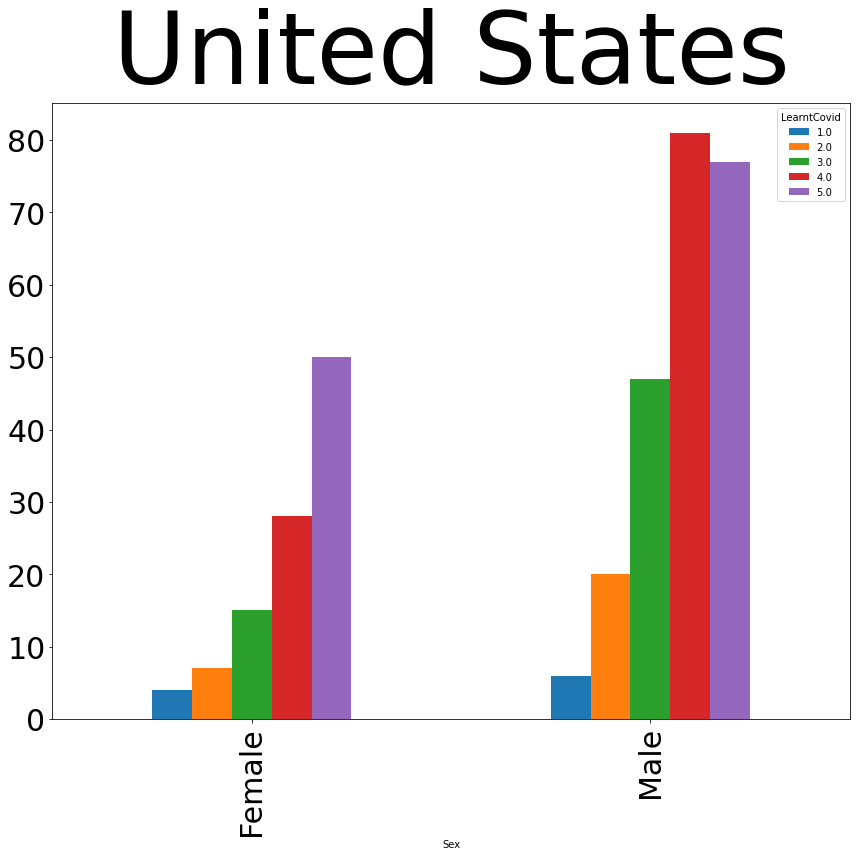

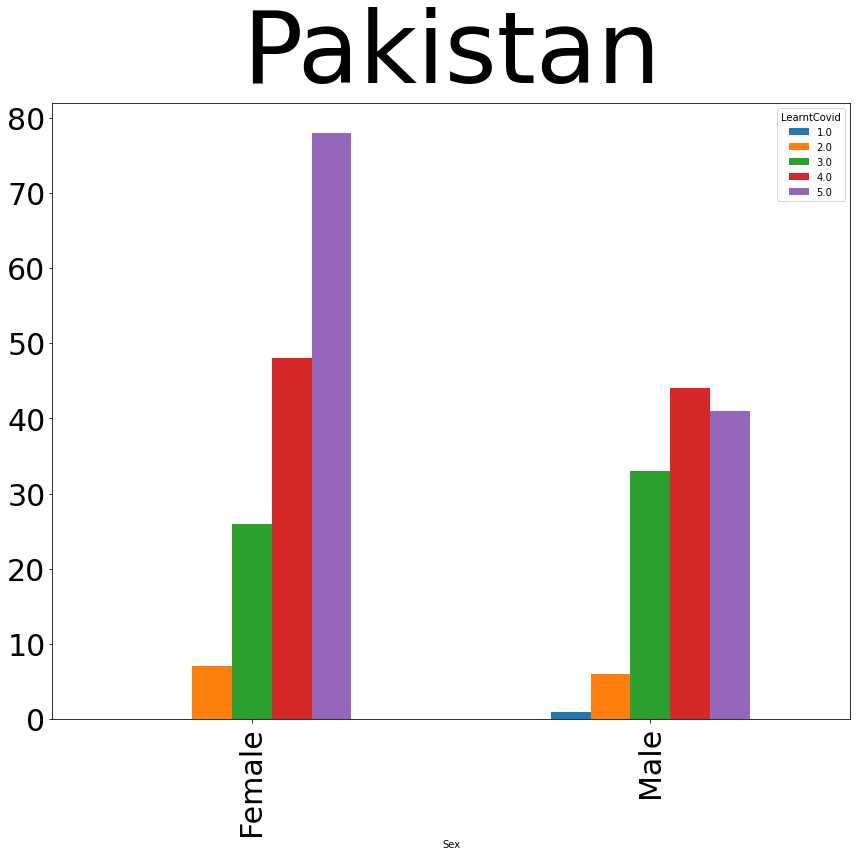

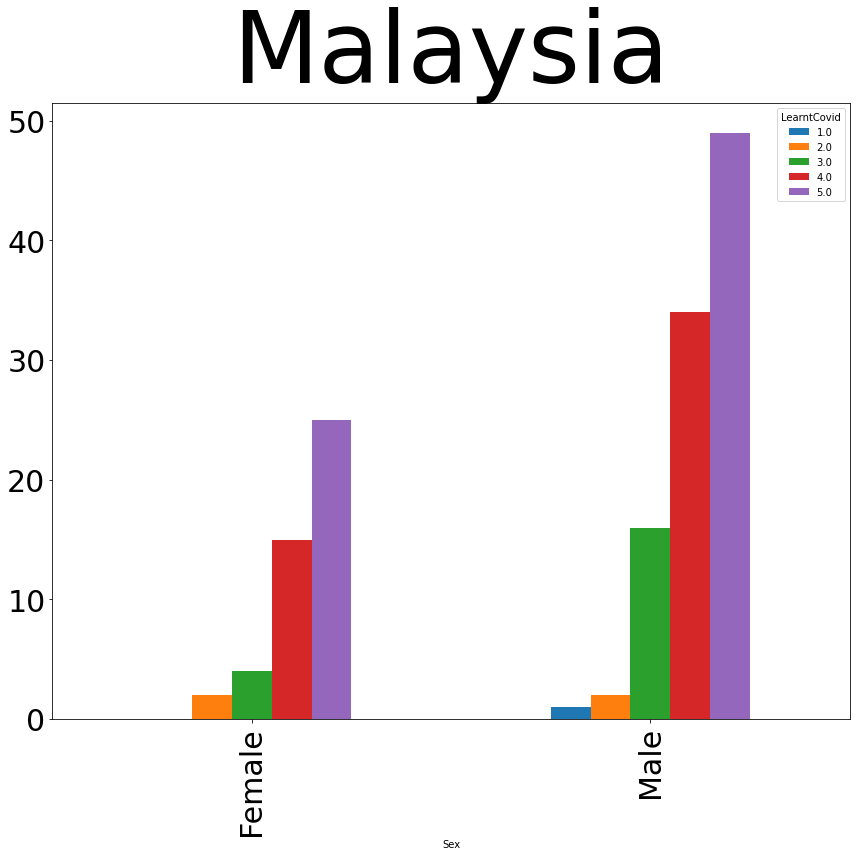

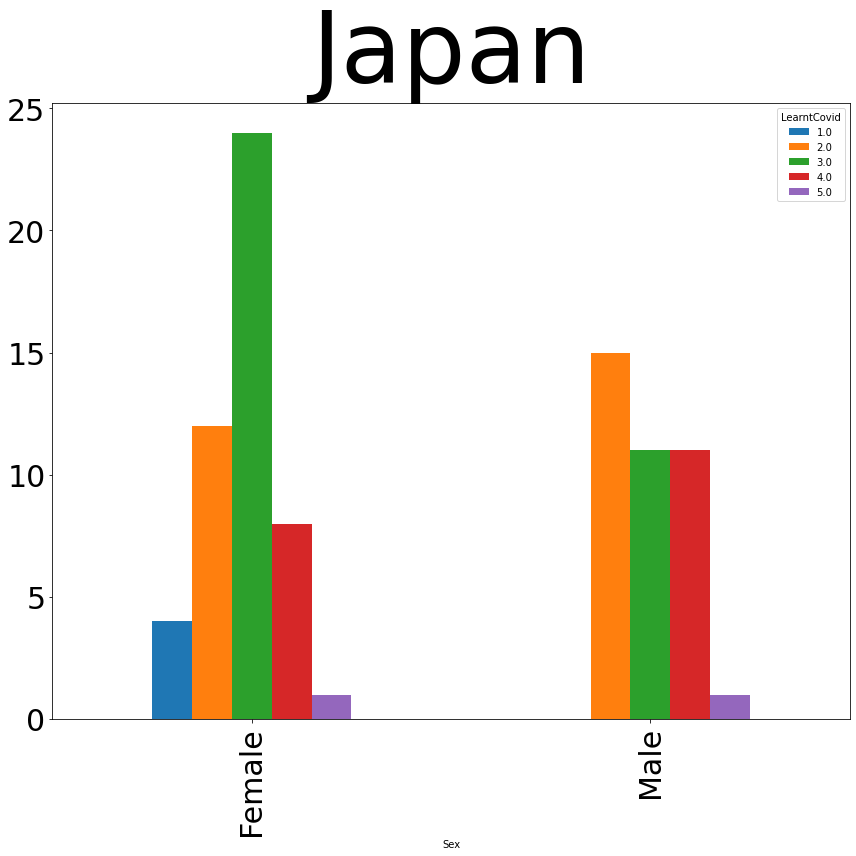

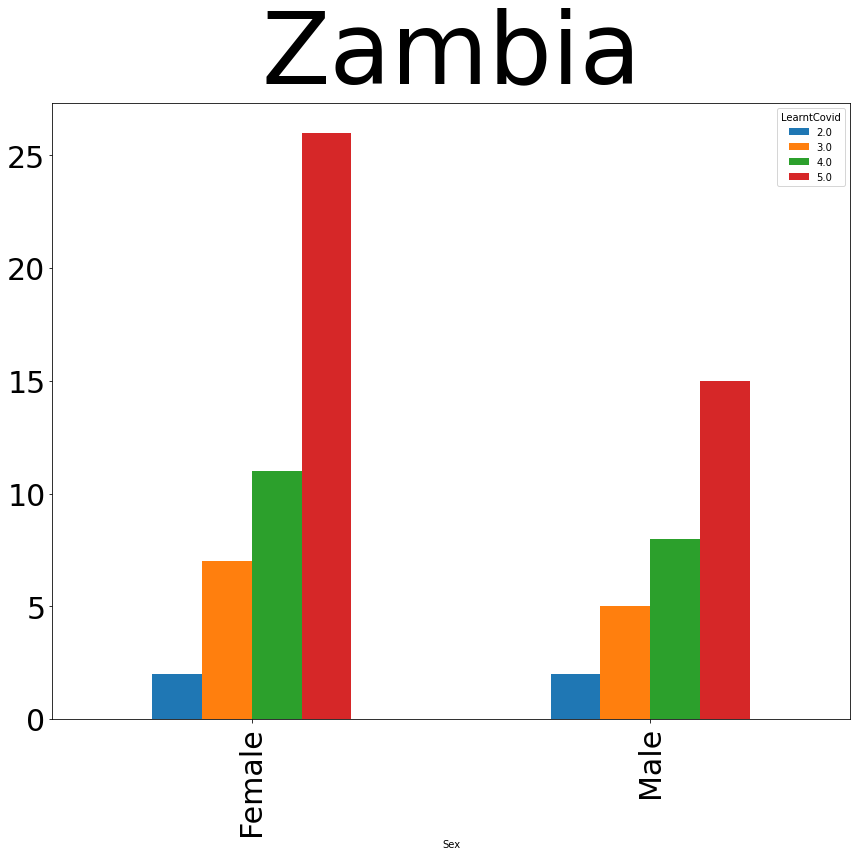

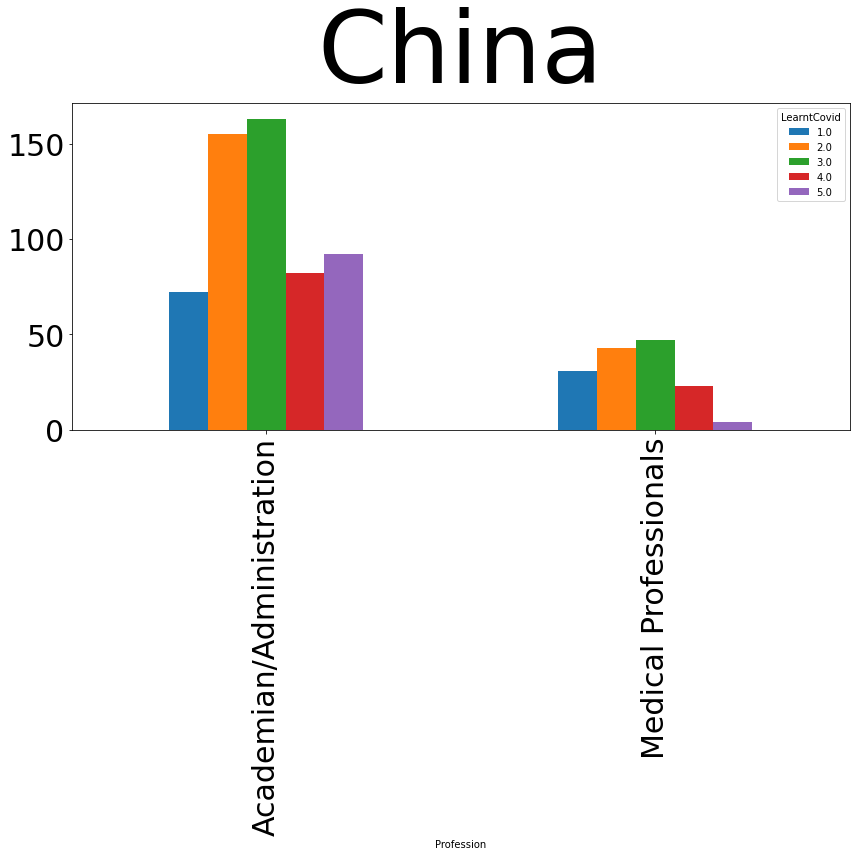

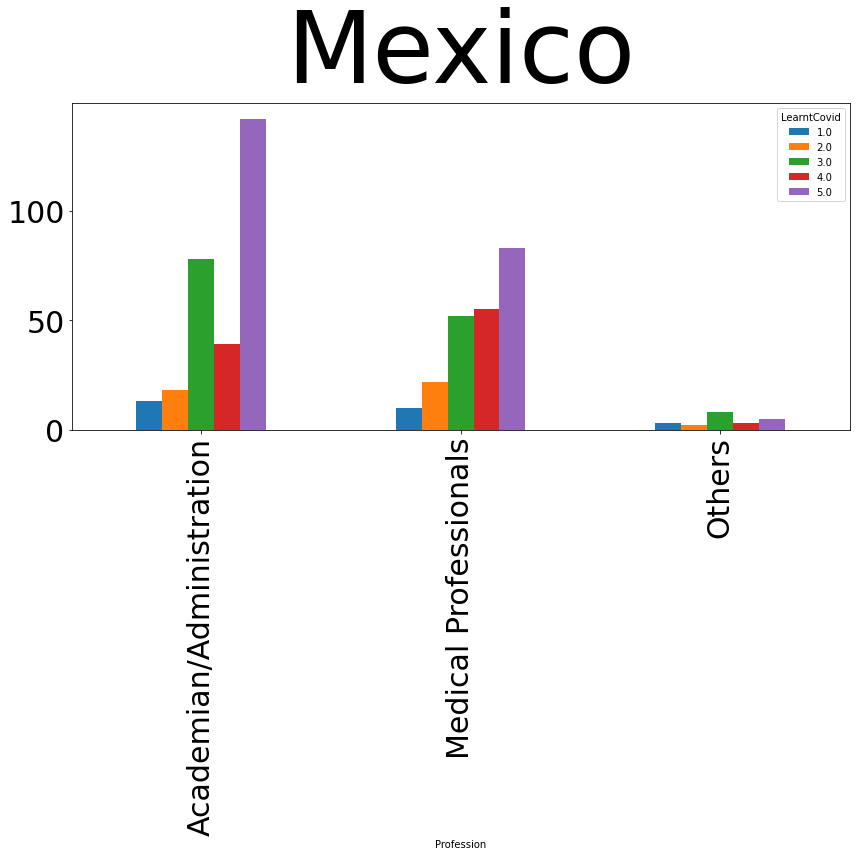

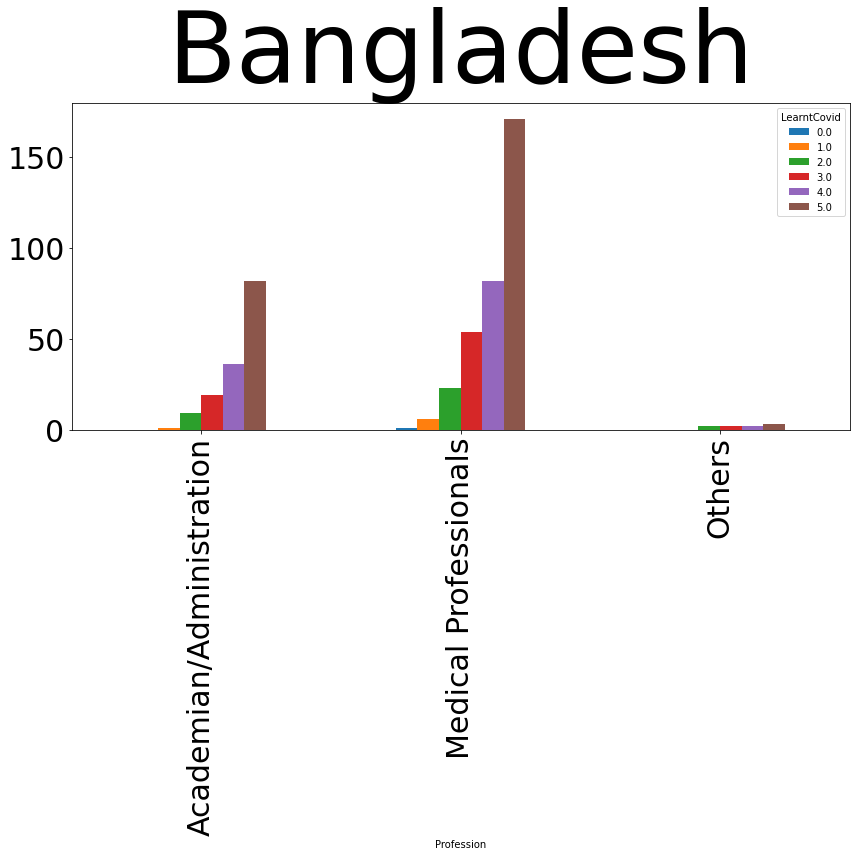

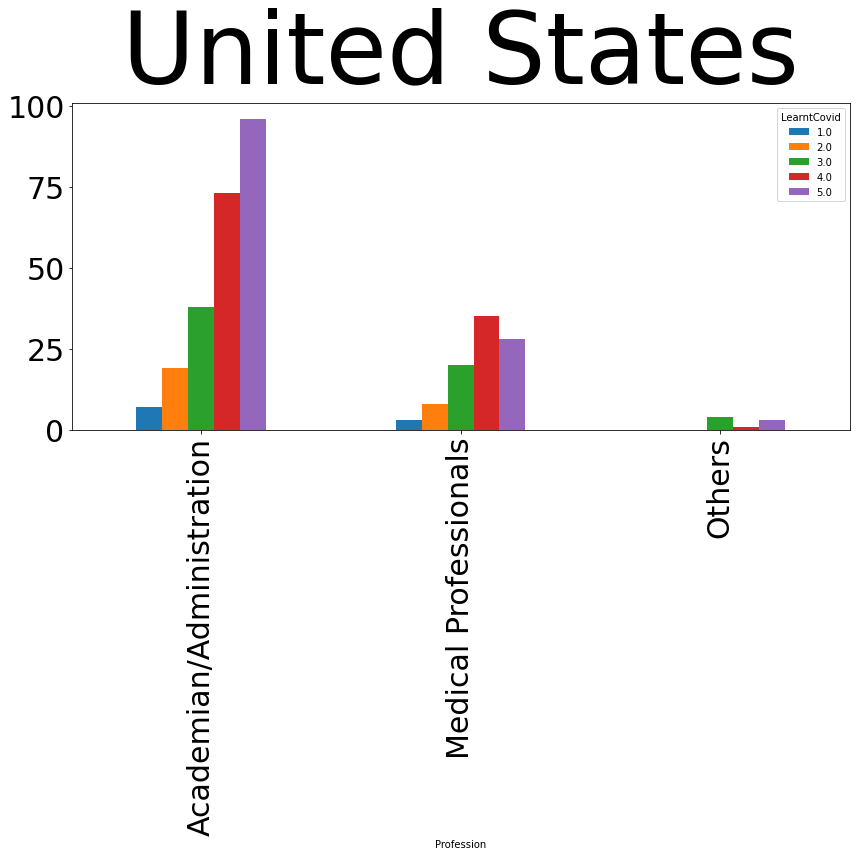

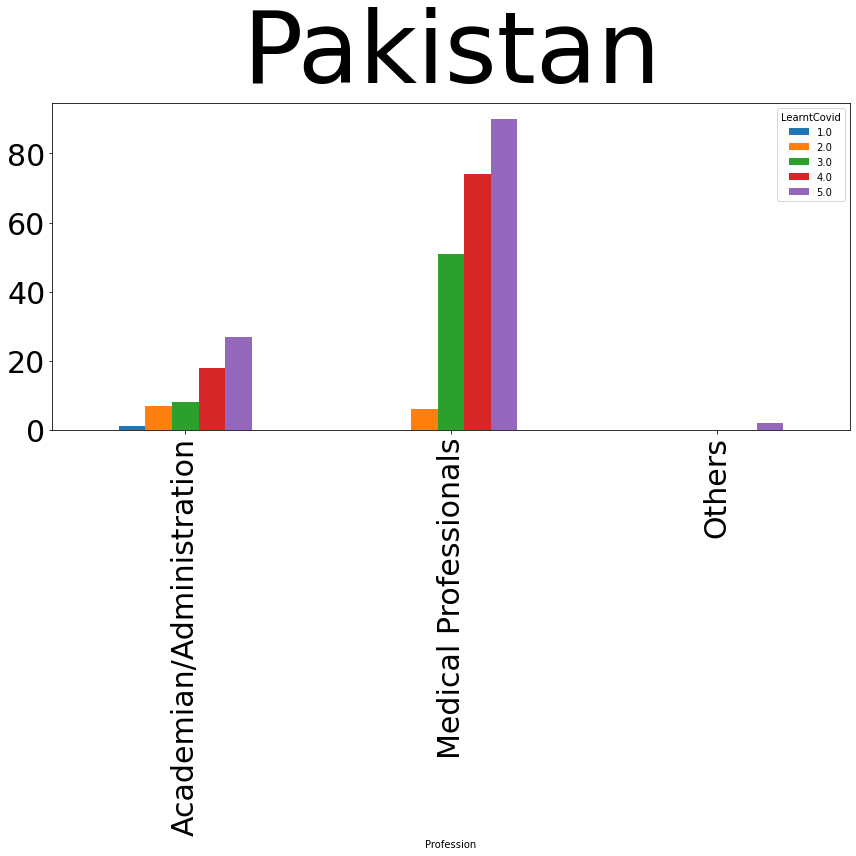

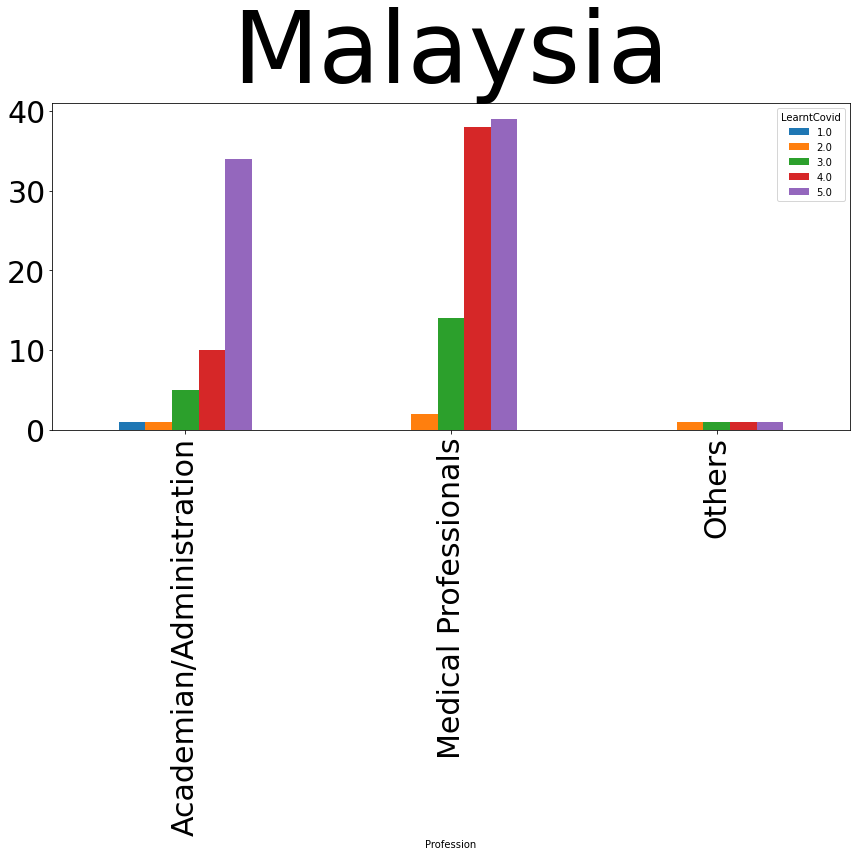

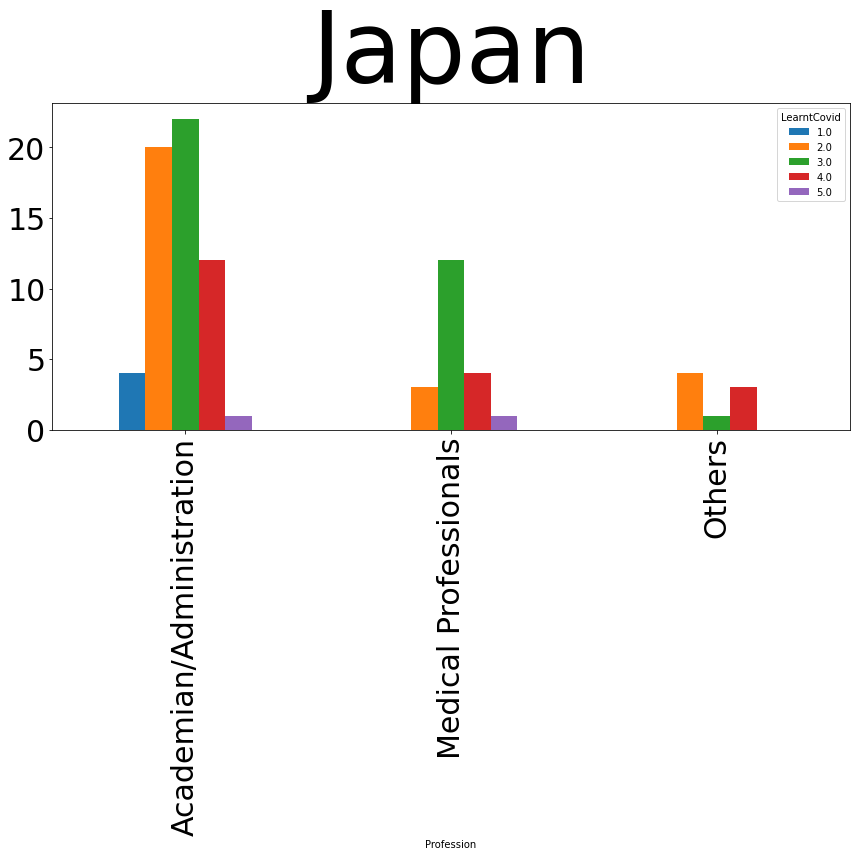

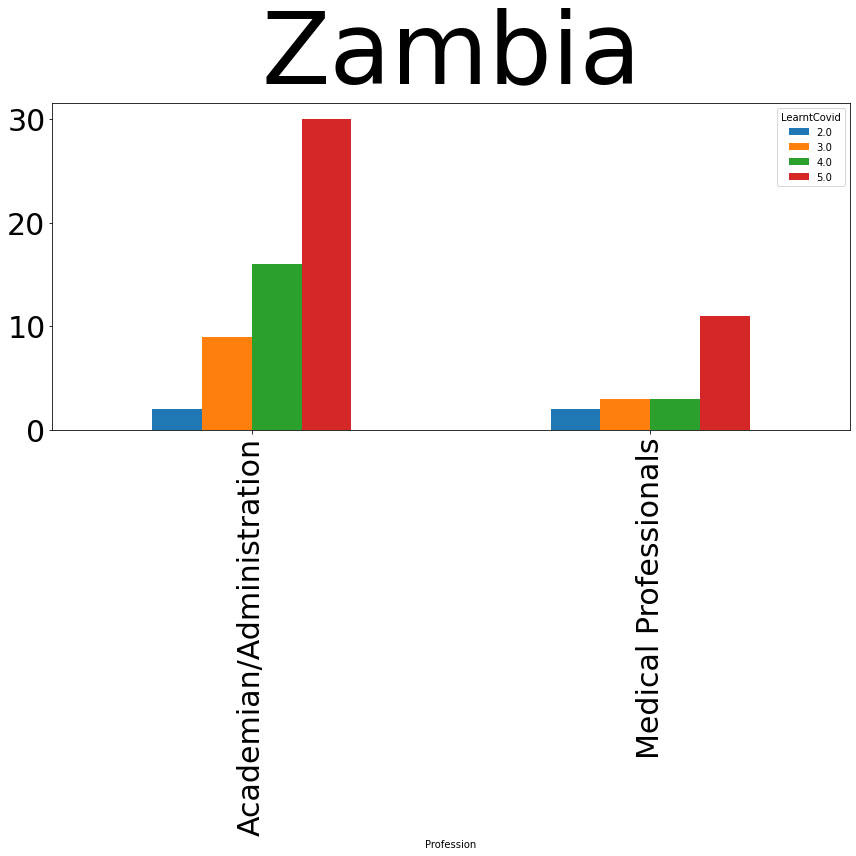

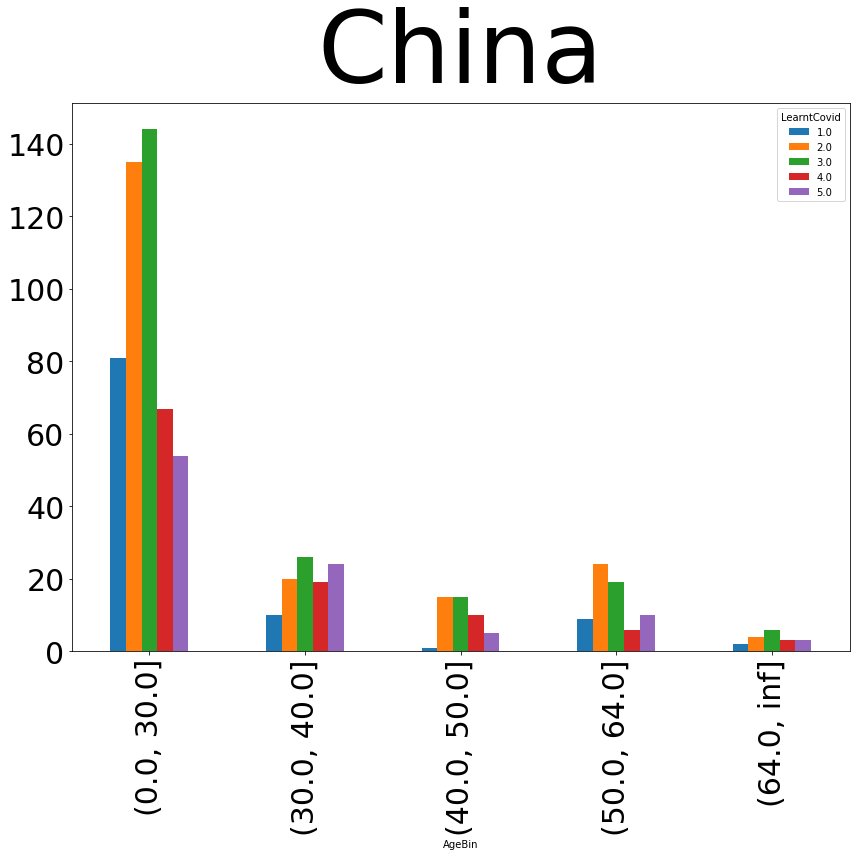

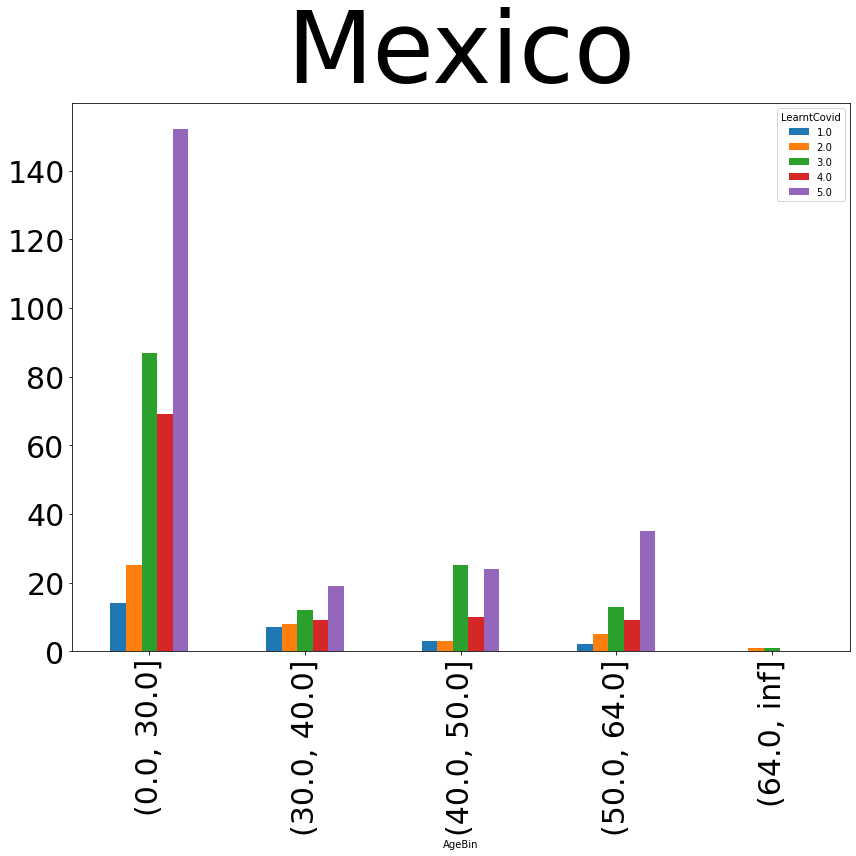

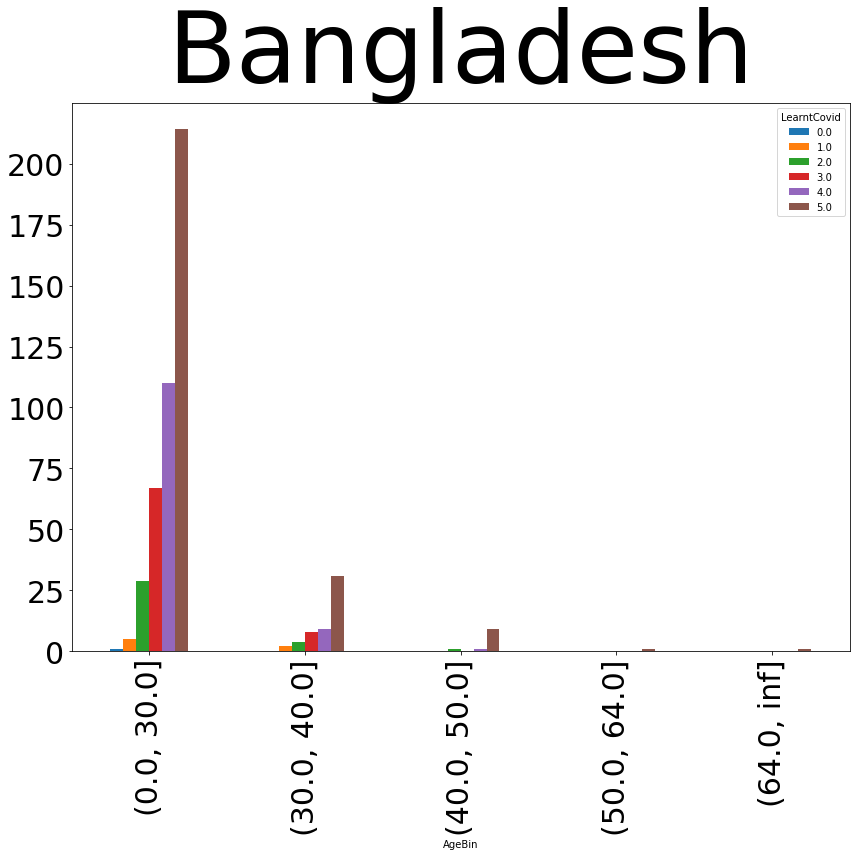

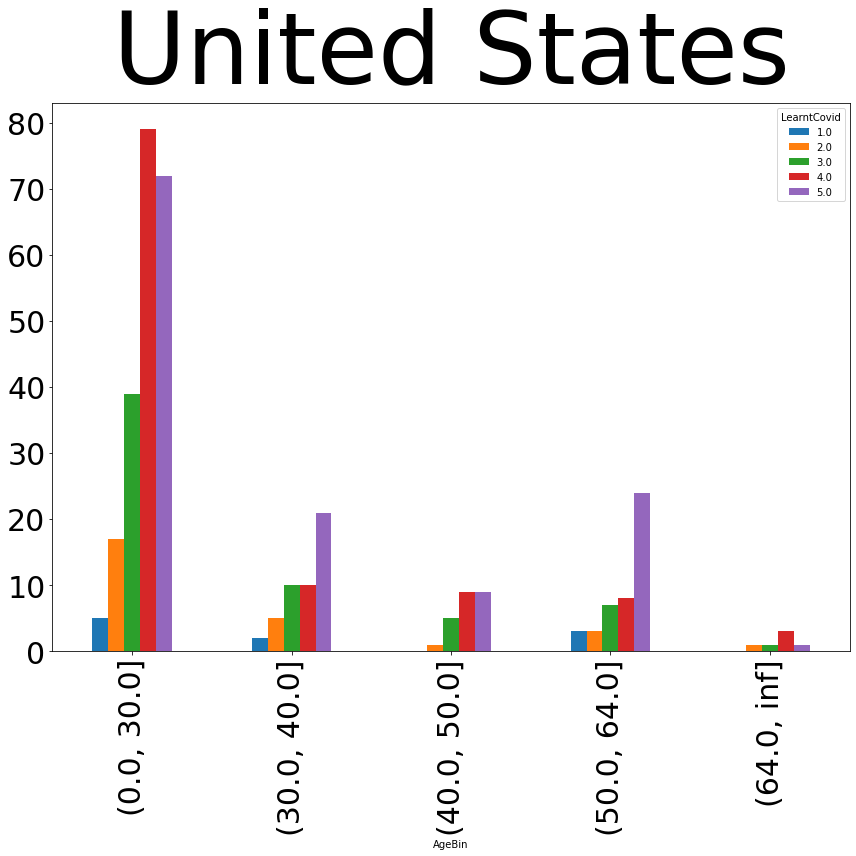

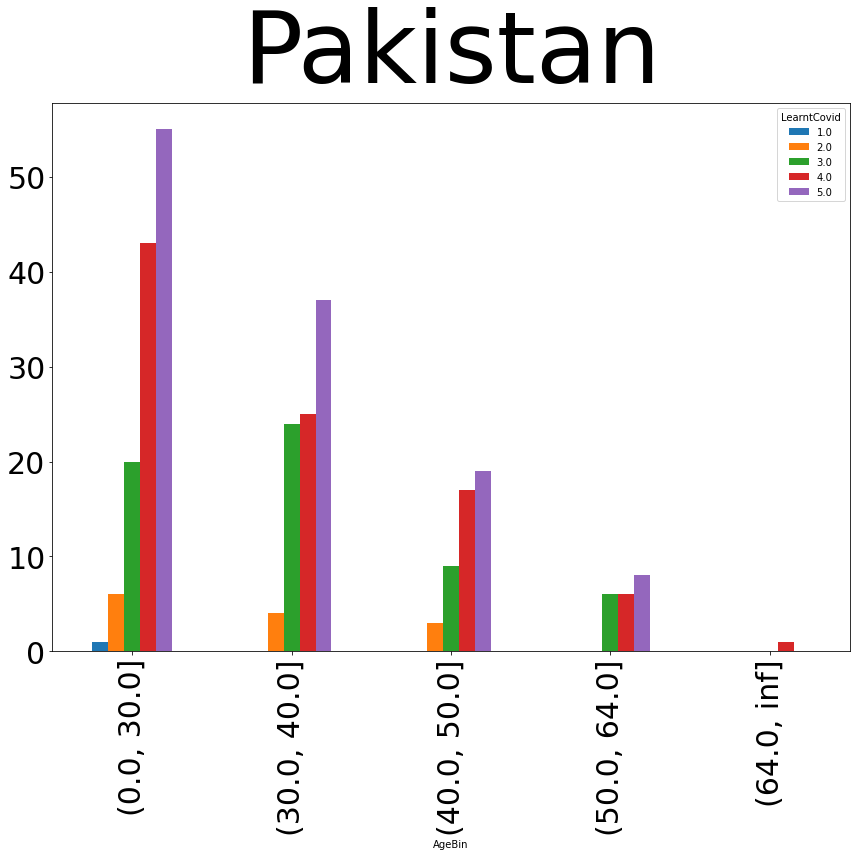

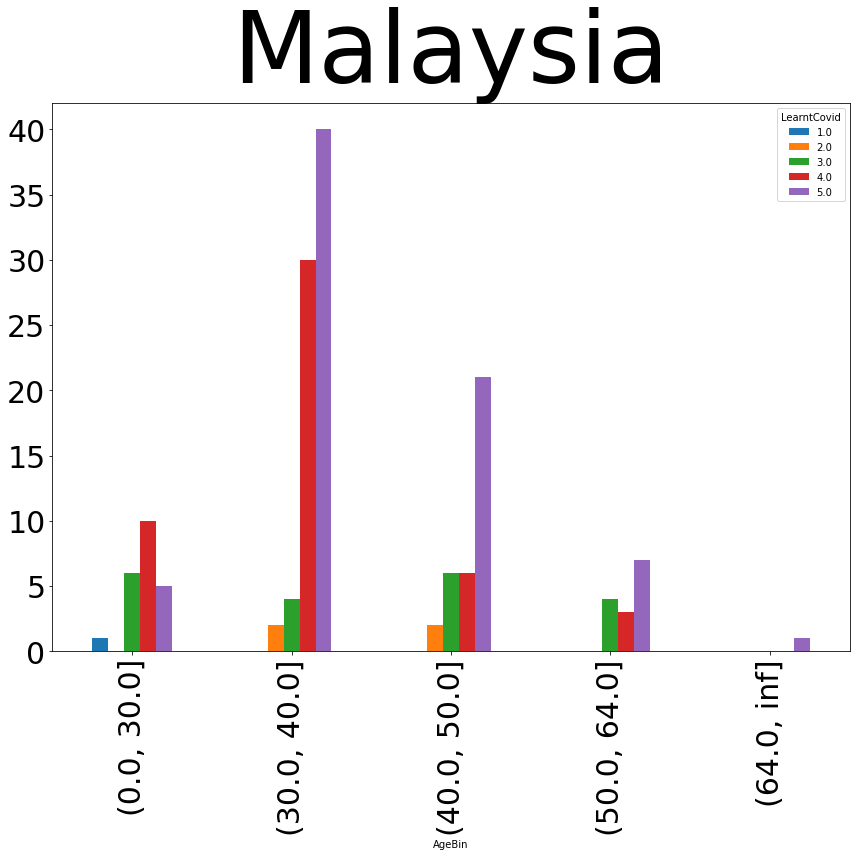

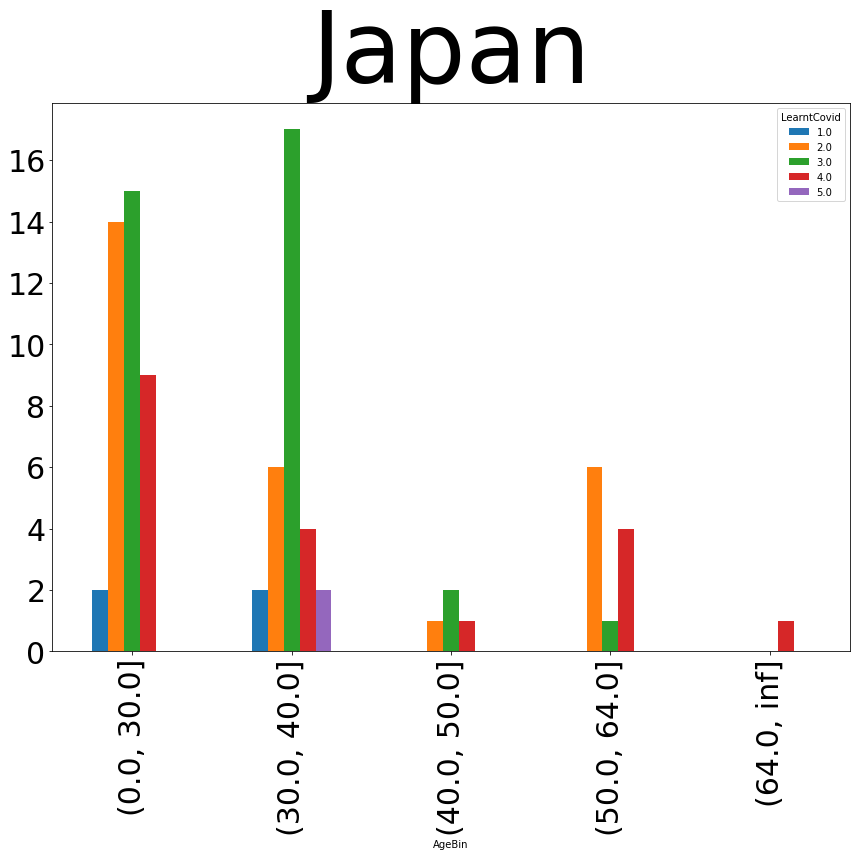

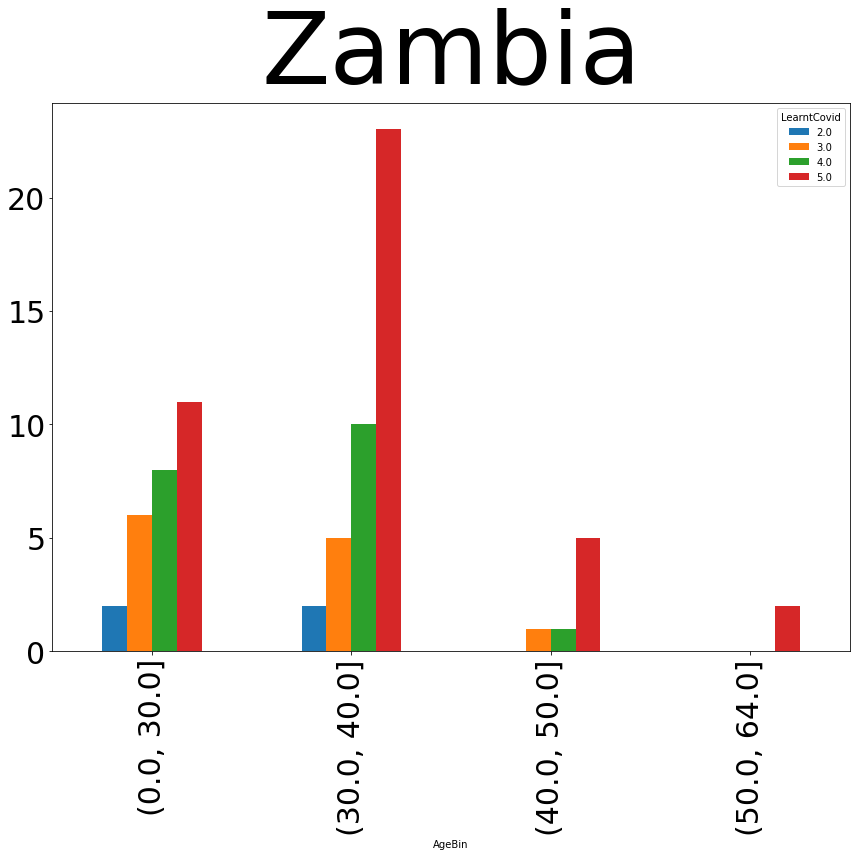

In [23]:
for c in criterion:
    for f in field:
        results = []
        for i, country in enumerate(countries):
            df_test = df[df['Country'] == country]
            if not (country == 'China' and c =='Access_Of_Information'):
                results.append(chi_squared_test(df_test,country,f,c))
        output = pd.DataFrame(results, columns = ['Country','Value', 'Critical'])
        output['Significant'] = output['Value'] > output['Critical']
        df_styled = output.style.background_gradient()
        dfi.export(df_styled,f"Graph/{c}/{f}/table.png")

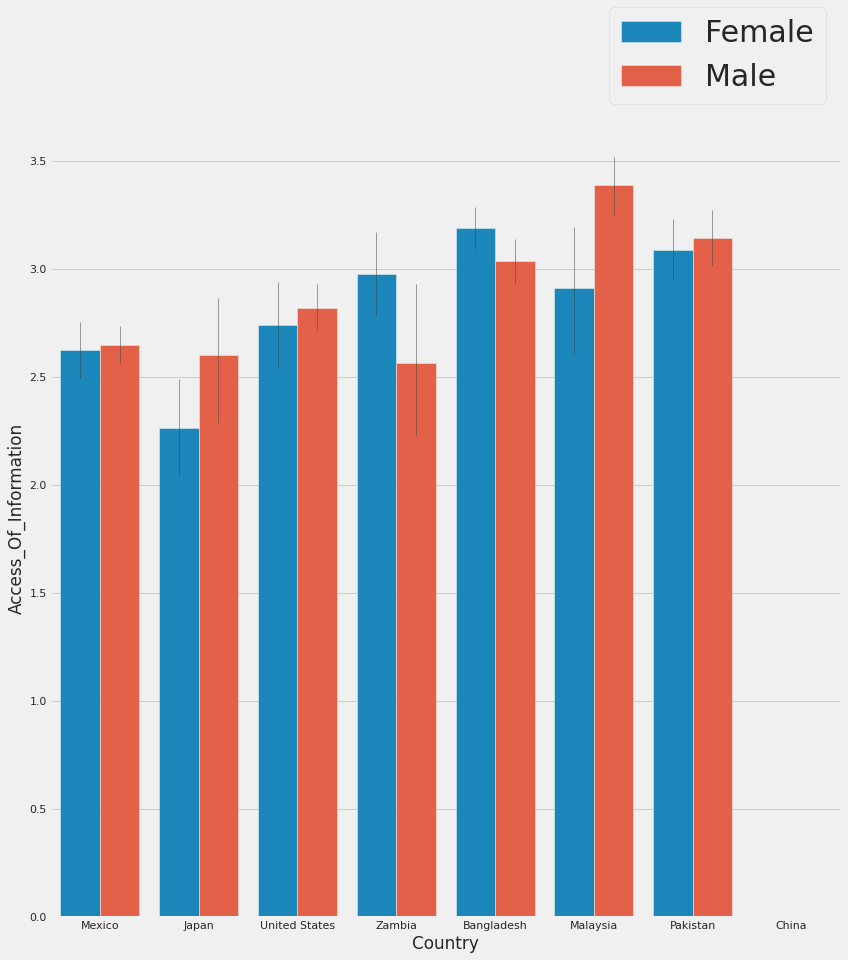

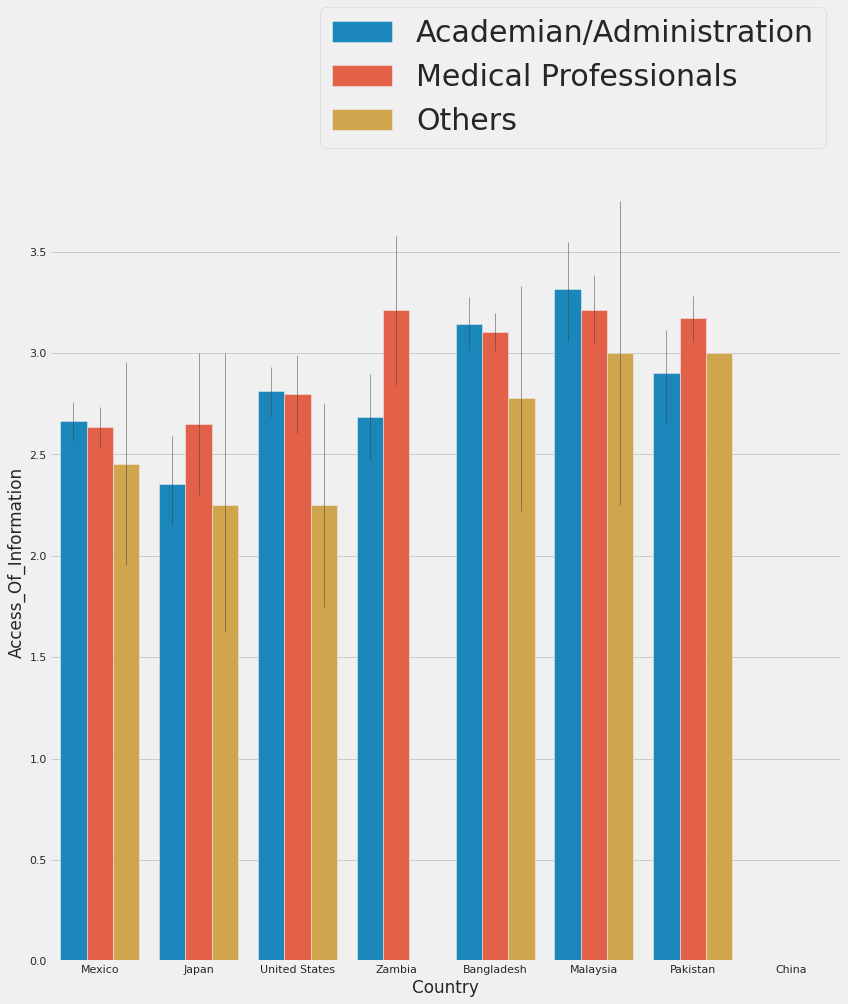

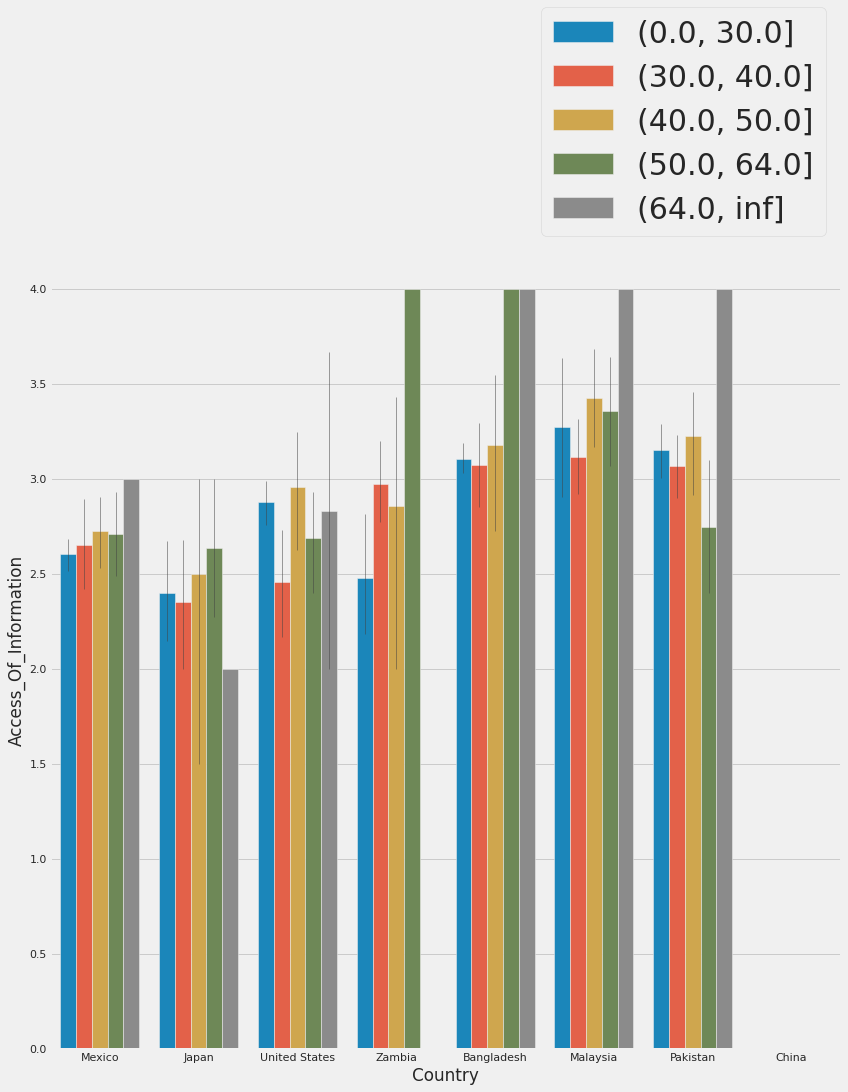

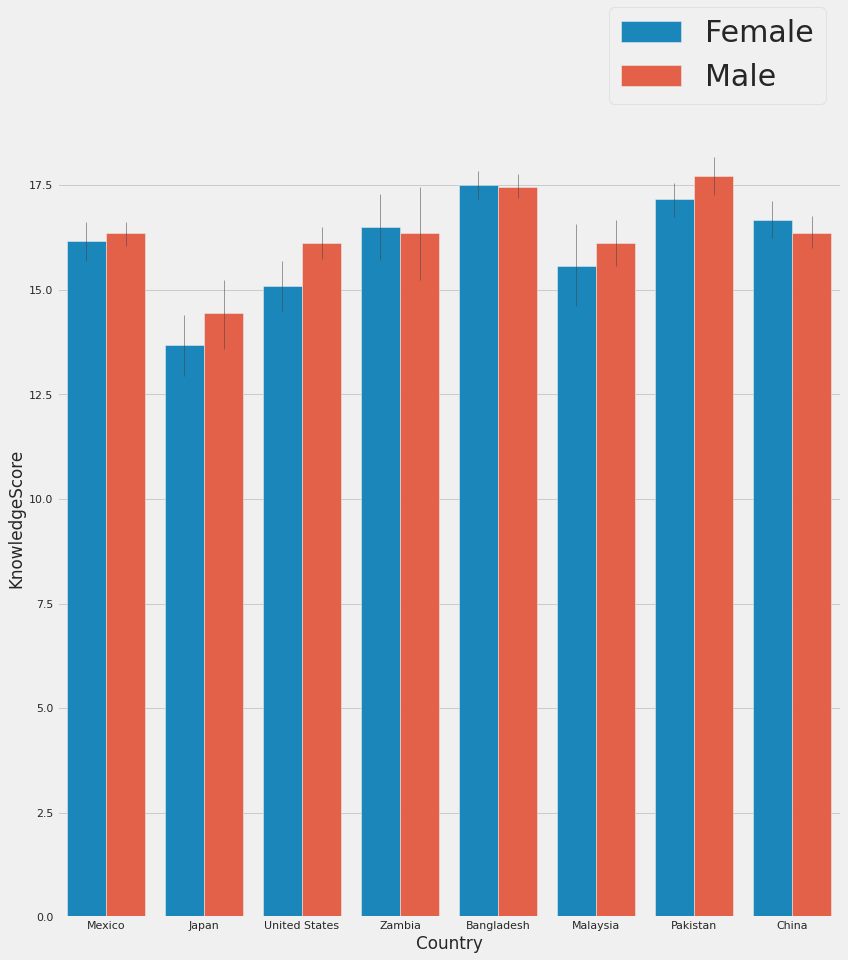

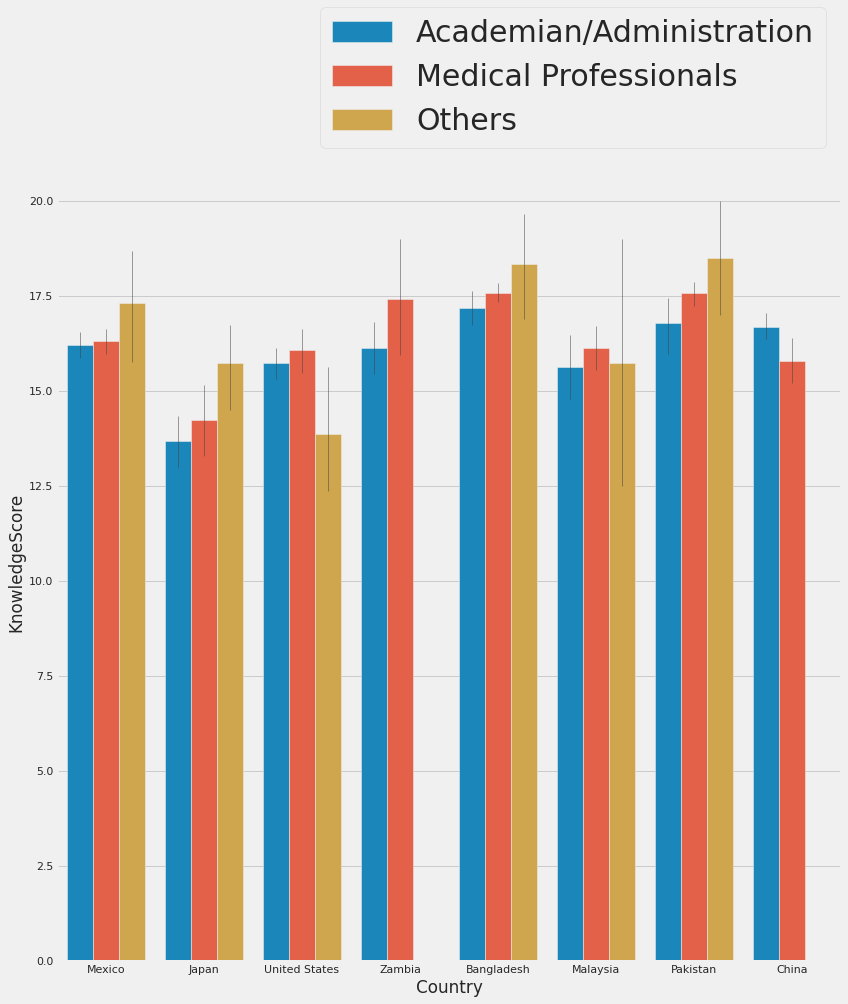

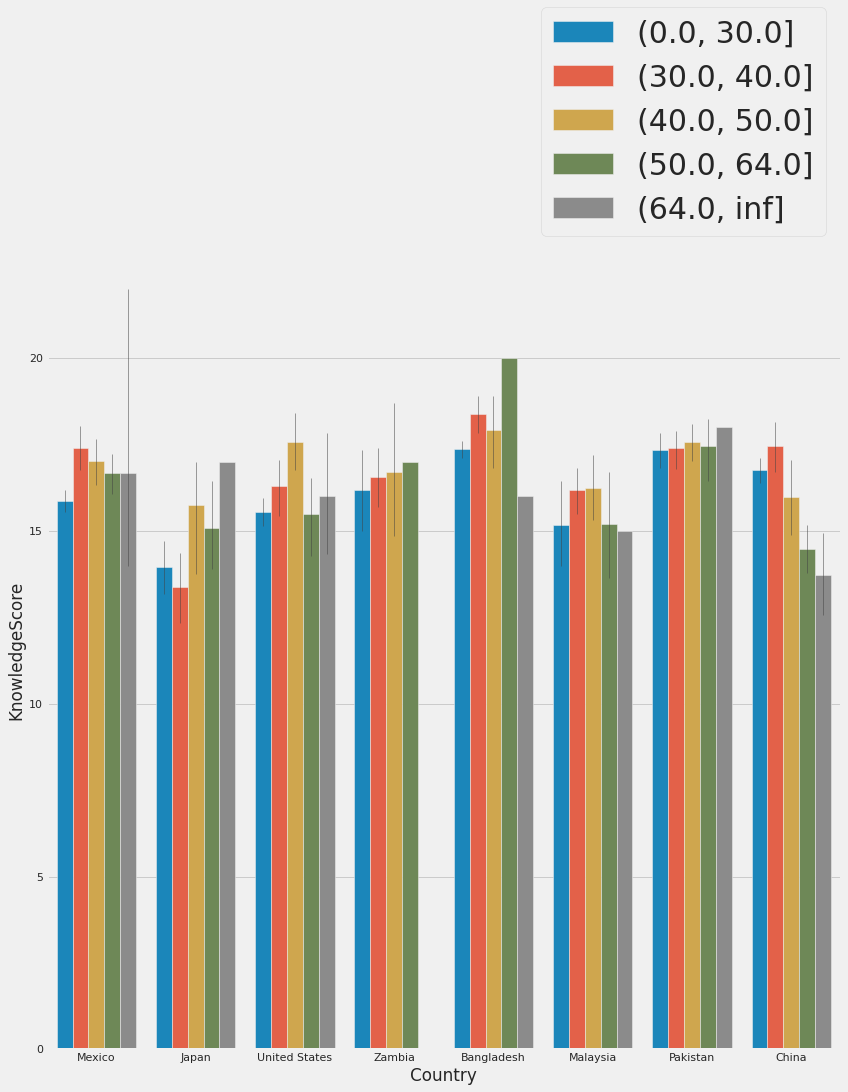

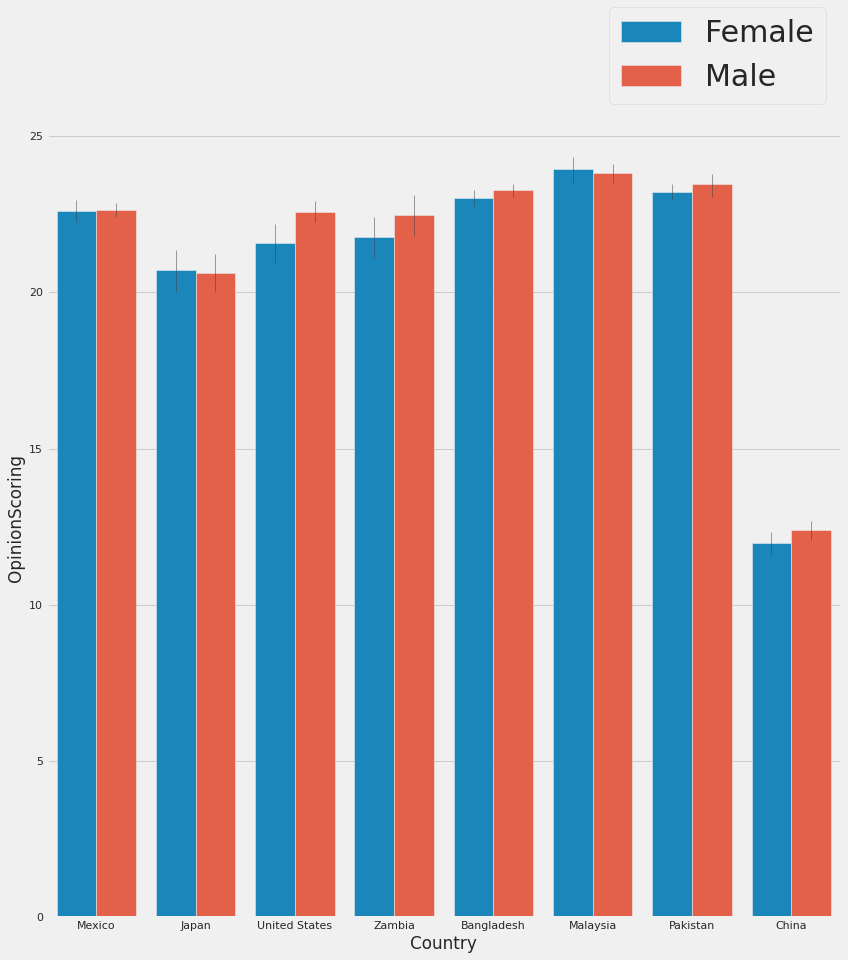

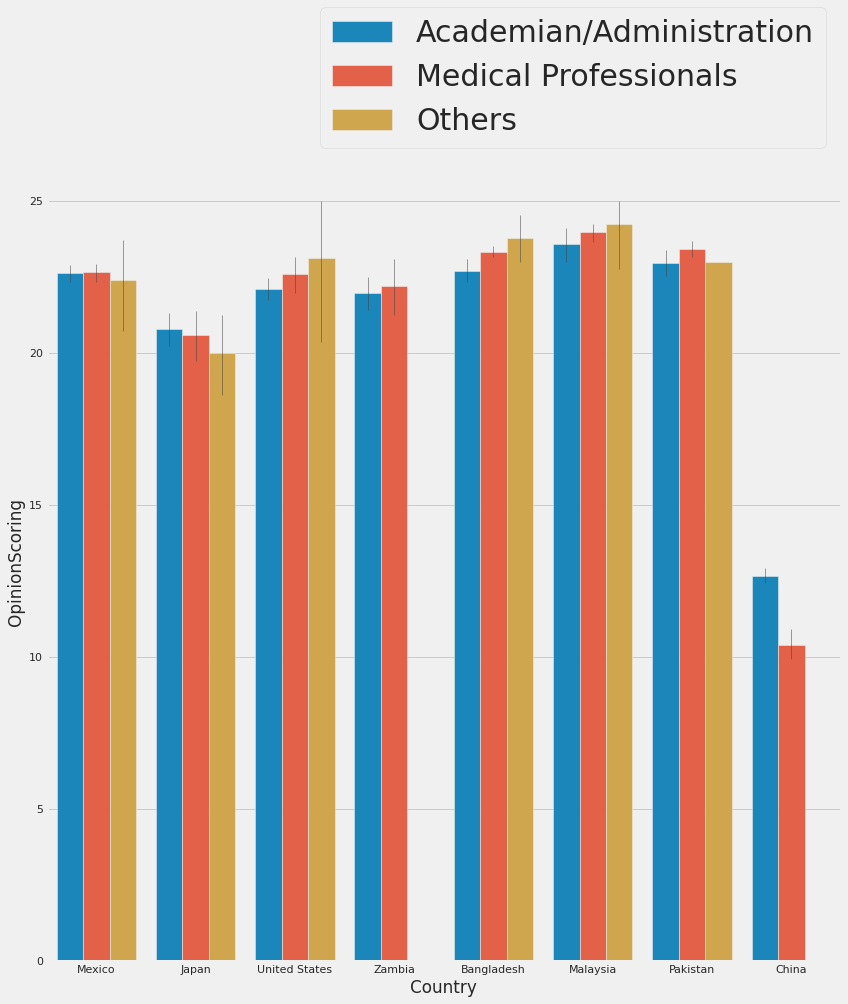

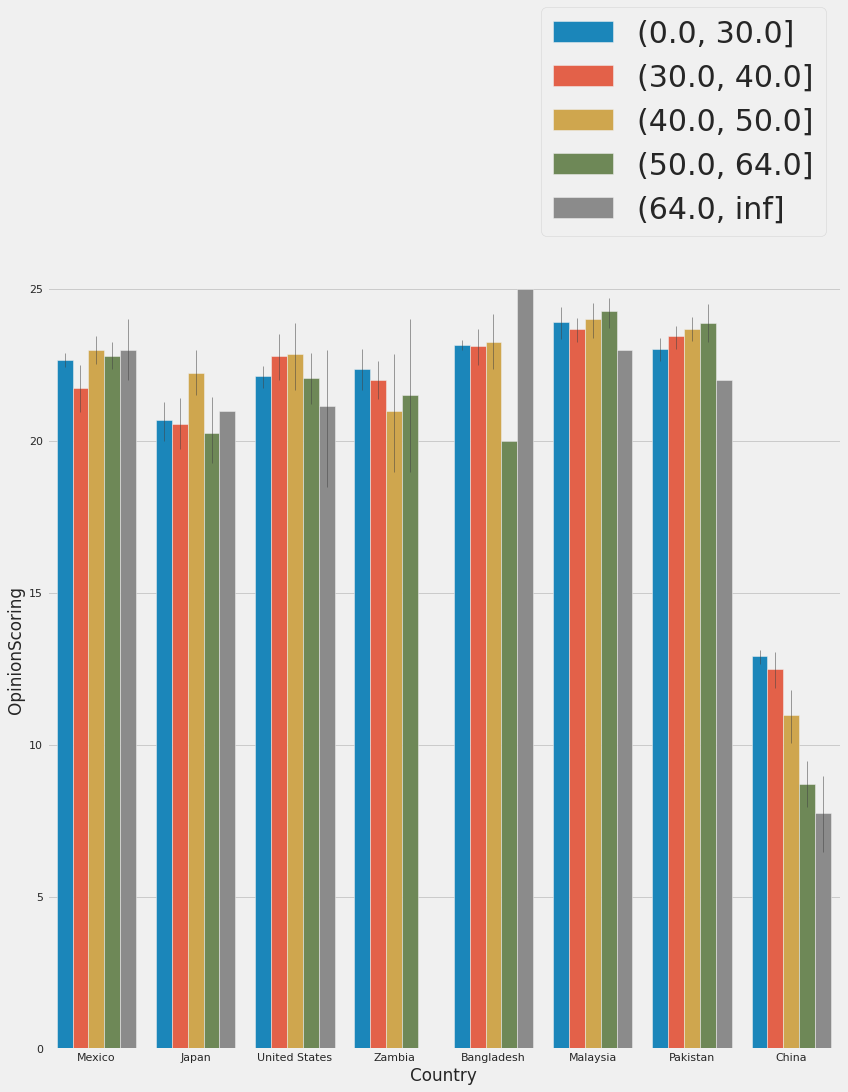

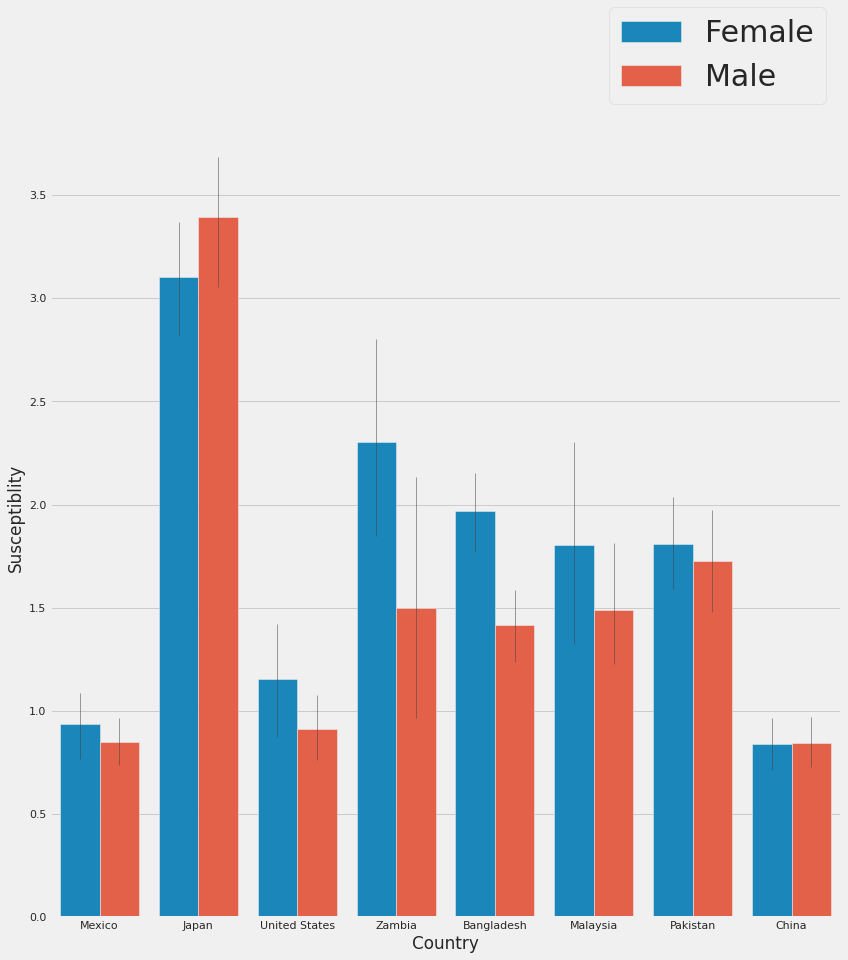

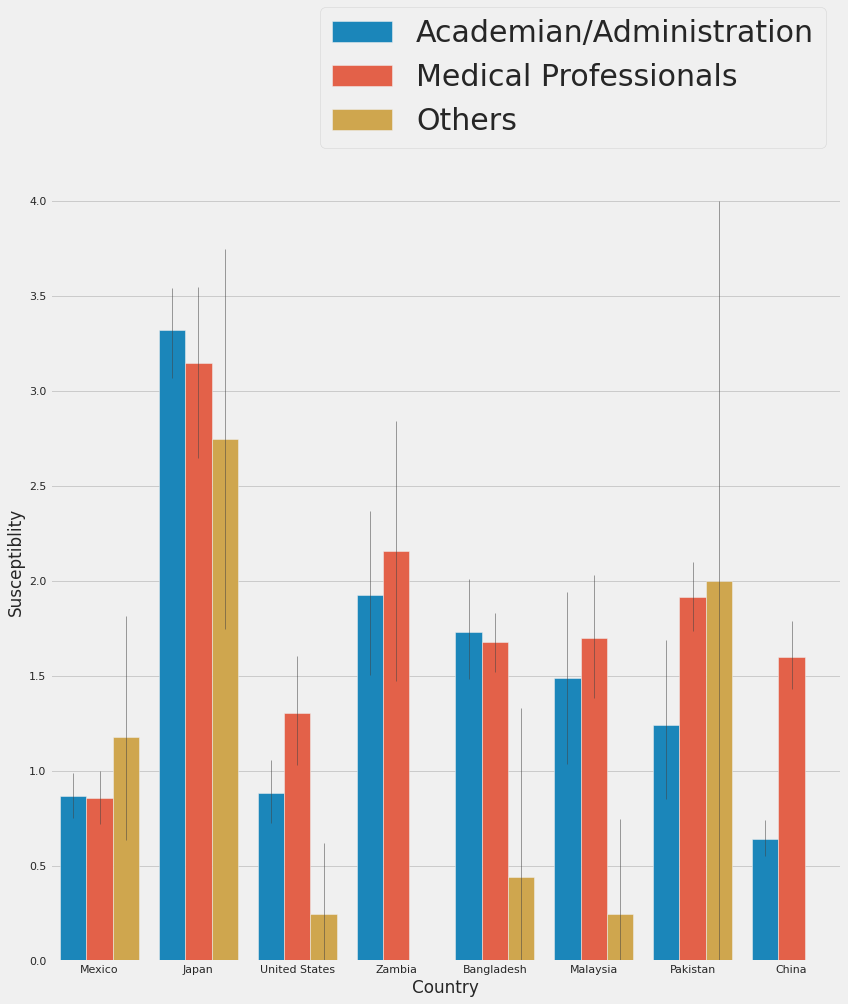

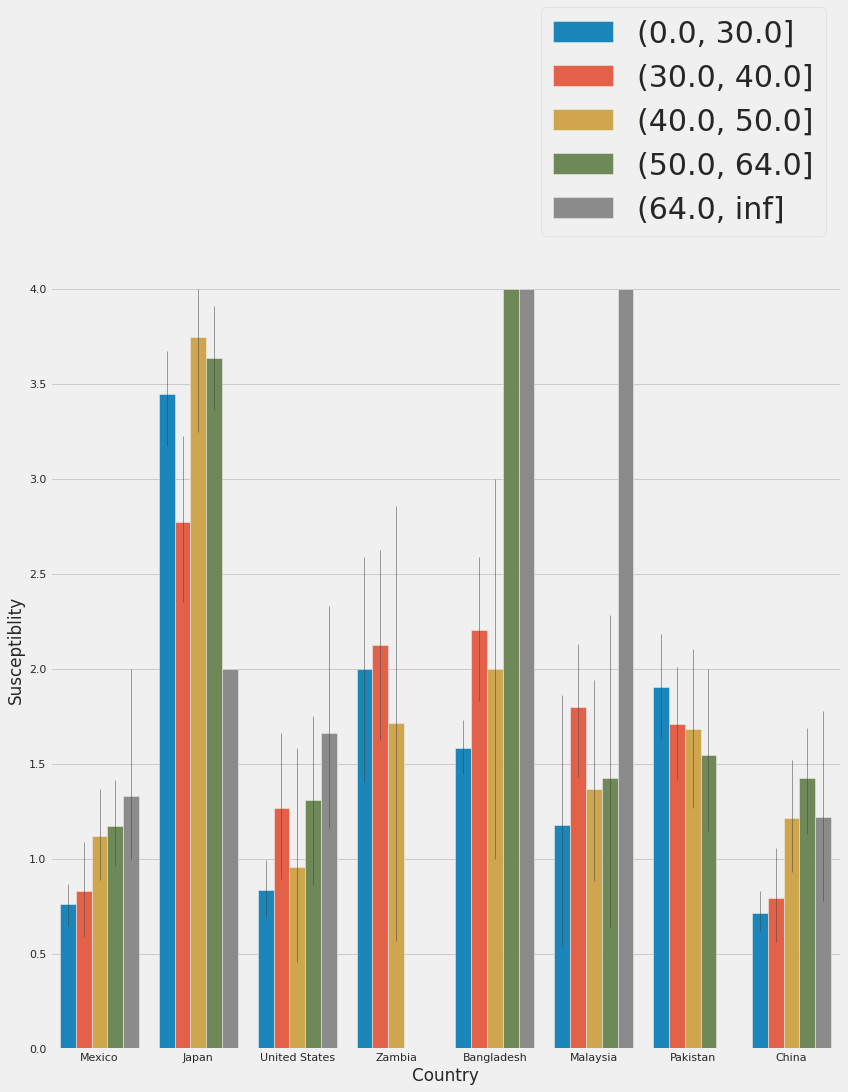

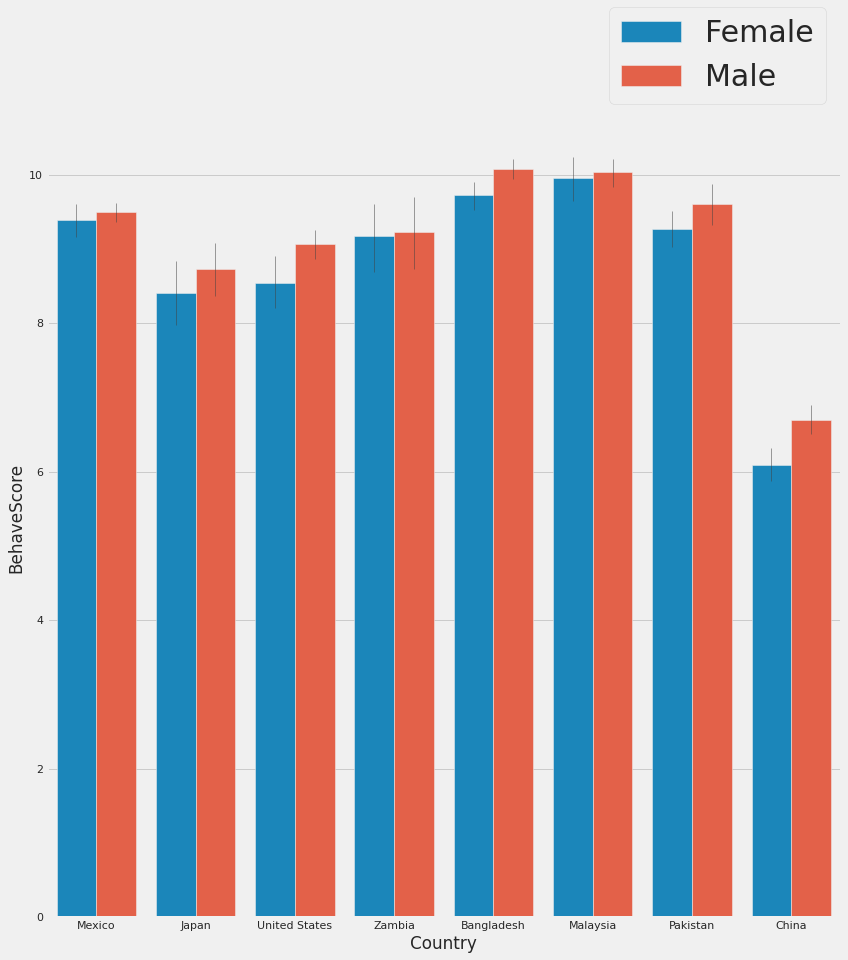

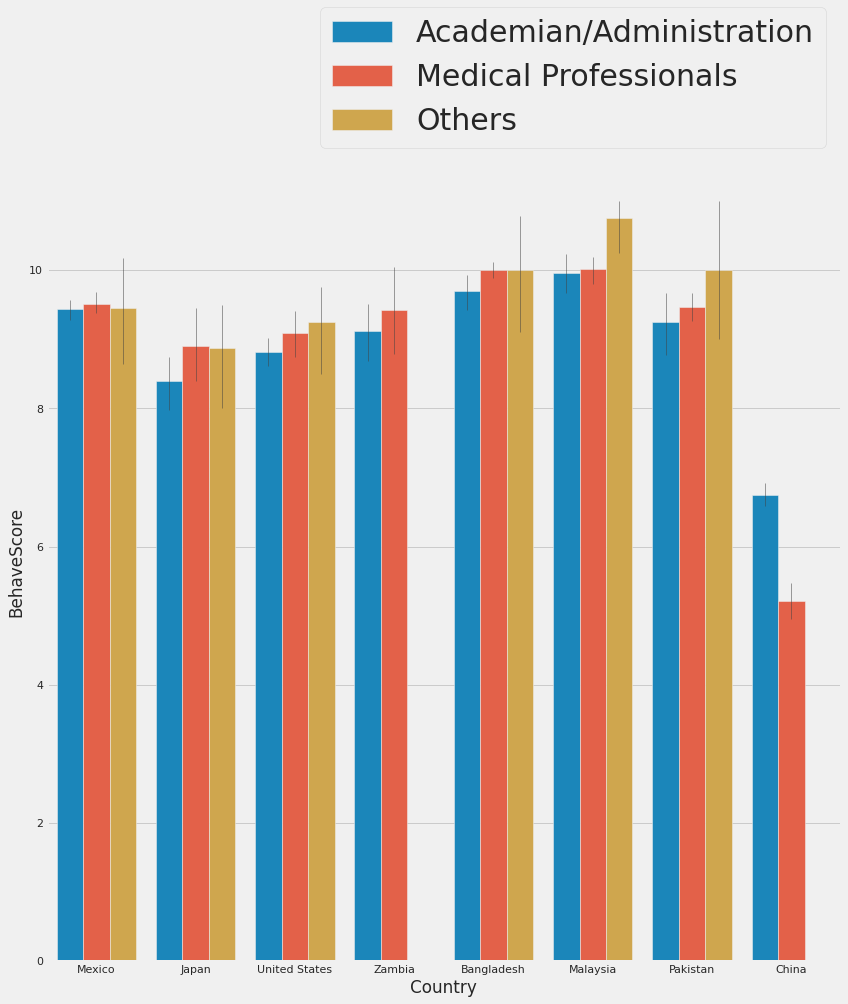

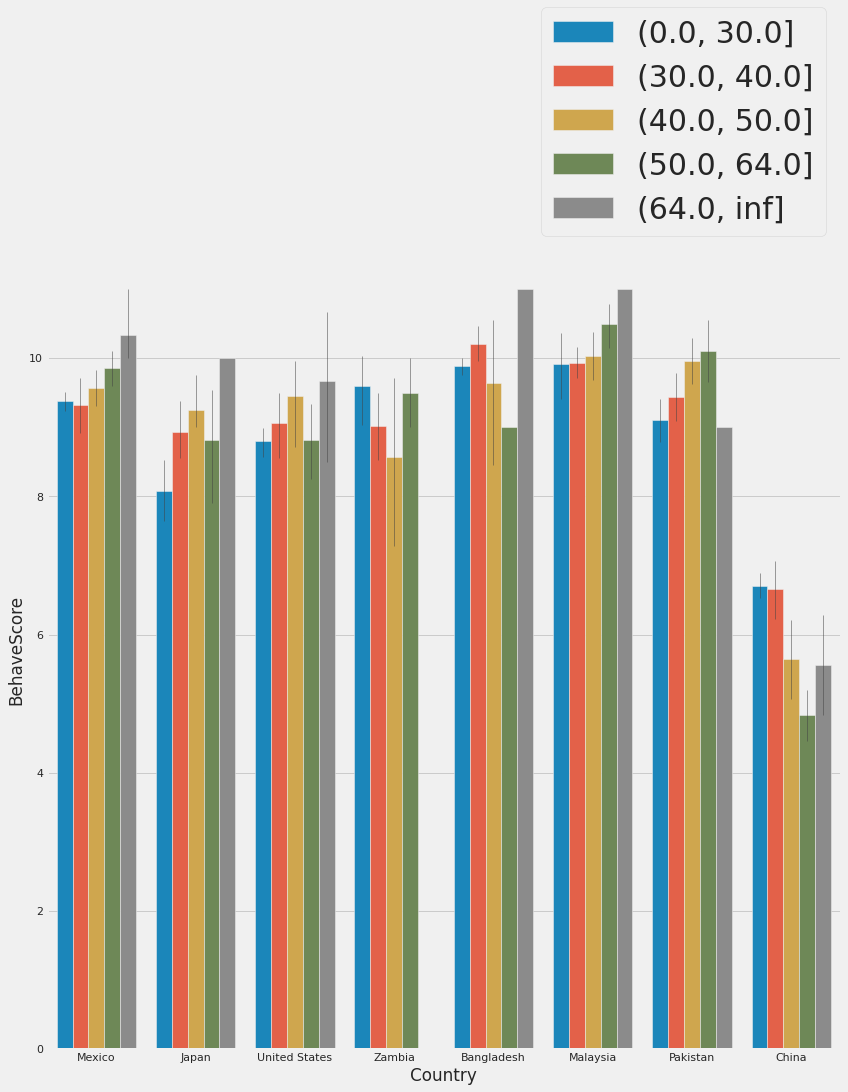

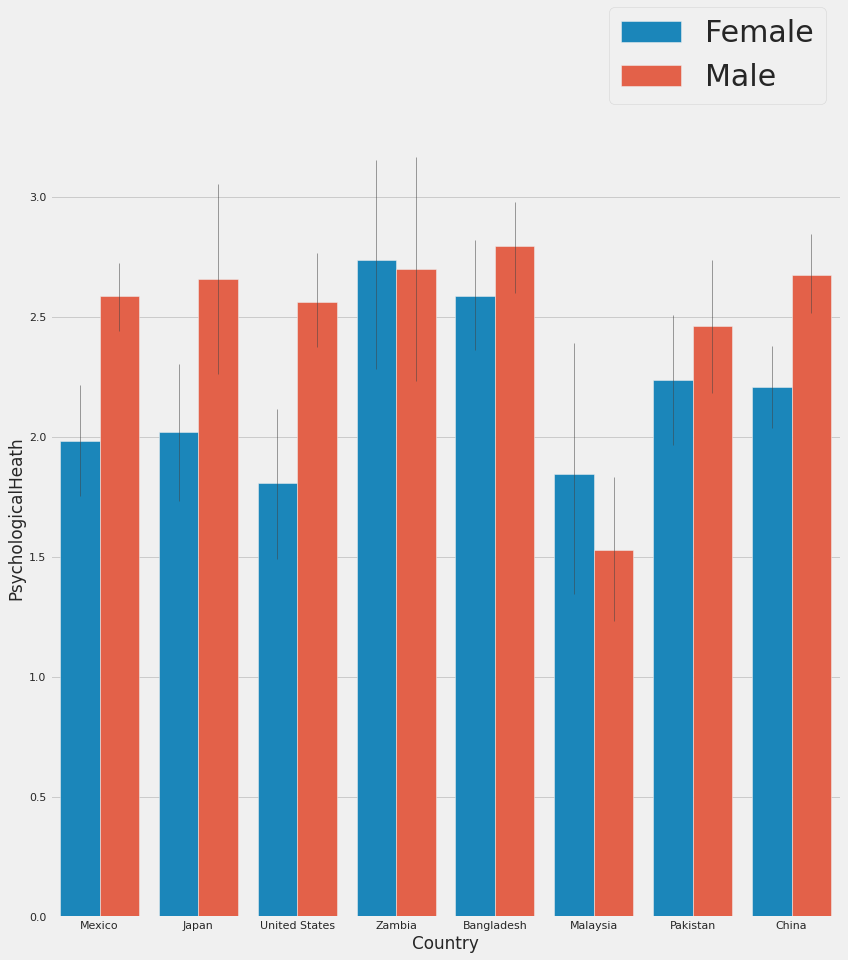

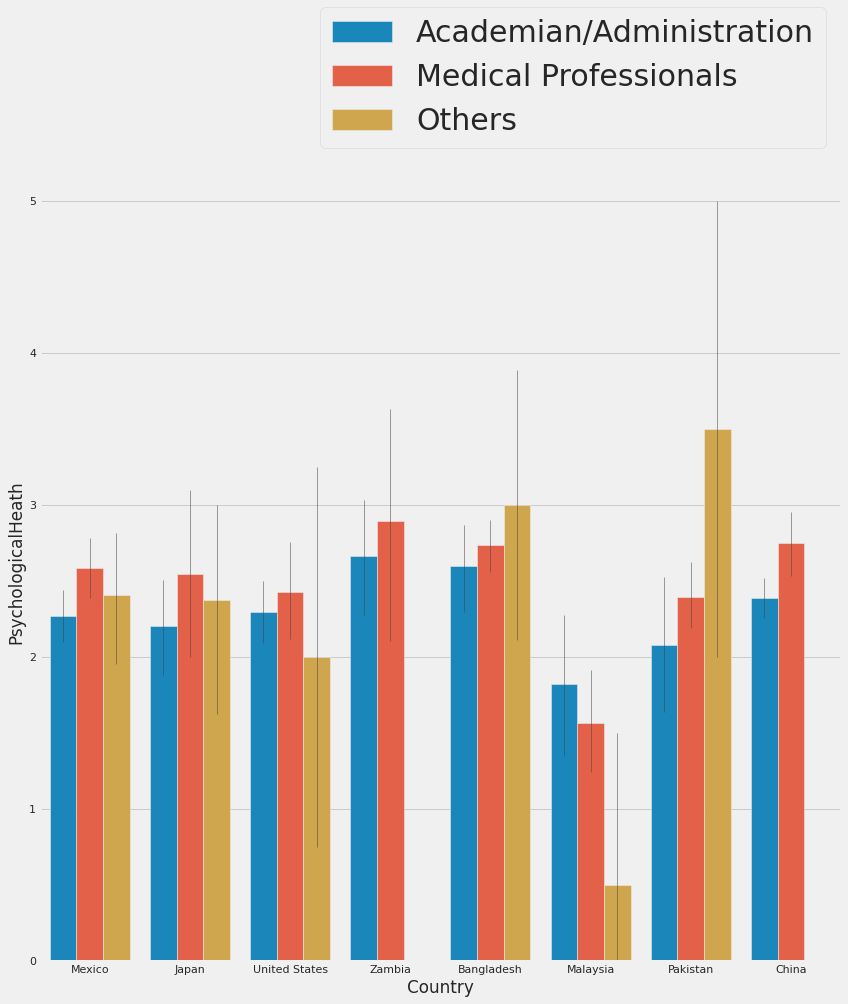

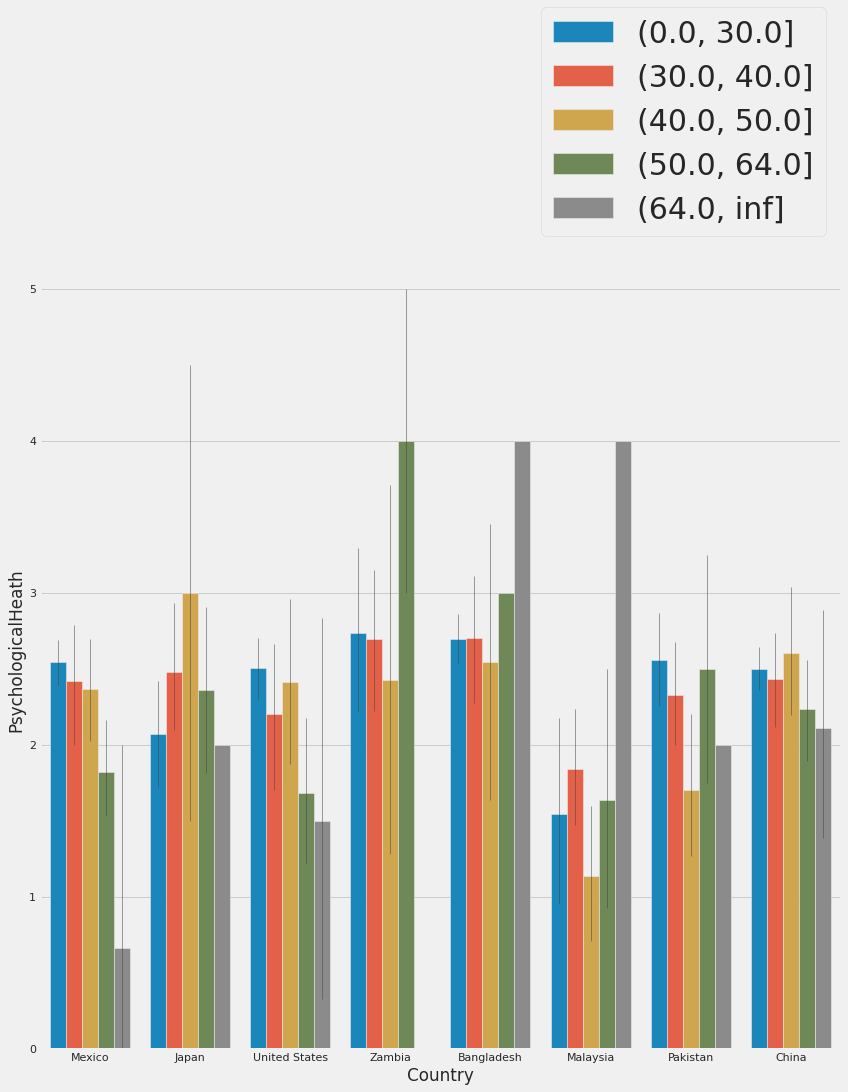

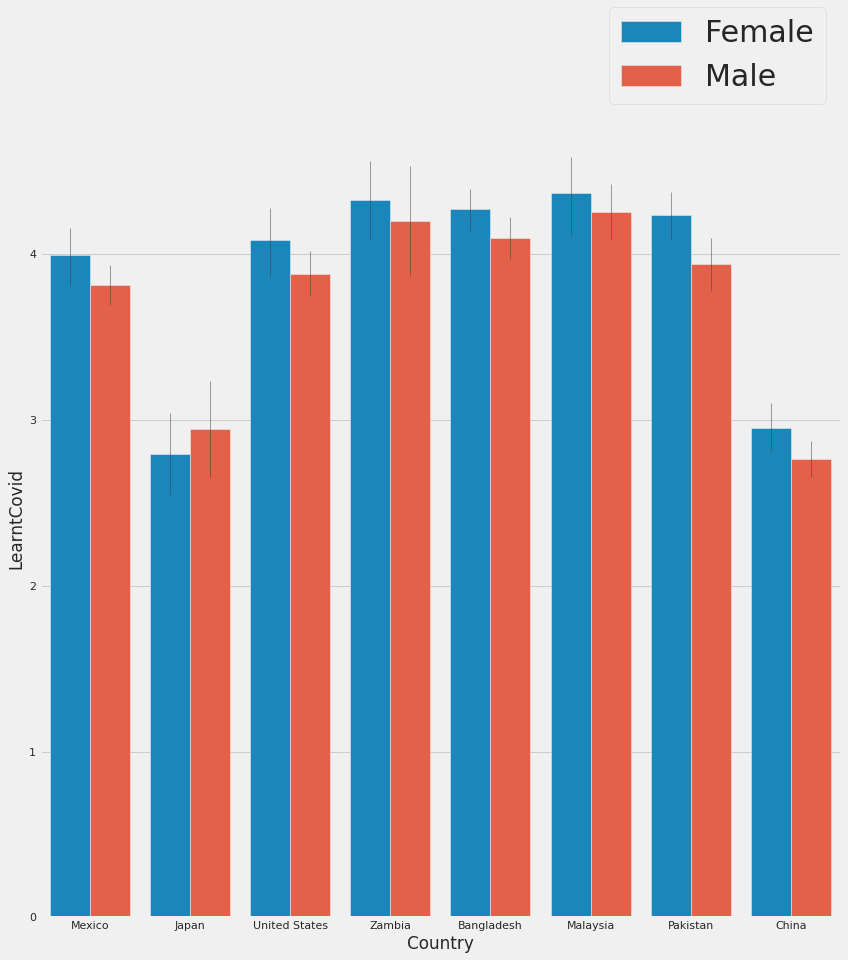

In [ ]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')
cleaned =df[df['Country'].isin(countries)]
for c in criterion:
    for f in field:
        ax = sns.barplot(x="Country", y=c,hue=f, data=cleaned,ci=95,errwidth=0.5)
        plt.tight_layout()      
        plt.legend(bbox_to_anchor=(1, 1), loc=4,fontsize=30) 
        plt.savefig(os.path.join('Graph',f'{c}_{f}.png'))
        plt.show()